# 설정 및 전처리

In [1]:
#창 크기 조절
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) 

/var/folders/k6/9x00m_3s16v50p13ww4d8r1m0000gn/T/ipykernel_20225/2951629532.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['font.family'] = 'AppleGothic' 

In [4]:
#df 불러오기
df = pd.read_csv('./dcpj.csv')
df

id  customer_id  course_id         type      state  \
0       1036206         16.0   203527.0        ORDER  CANCELLED   
1       1049292         46.0   204449.0        ORDER  CANCELLED   
2       1049294         46.0   204449.0      PAYMENT  COMPLETED   
3       1039780         47.0   203078.0      PAYMENT  COMPLETED   
4       1206486         47.0   203533.0        ORDER  CANCELLED   
...         ...          ...        ...          ...        ...   
105414  1367258     672307.0   207731.0      PAYMENT  COMPLETED   
105415  1367259     672308.0   207742.0      PAYMENT  COMPLETED   
105416  1011200          NaN        NaN  TRANSACTION  COMPLETED   
105417  1066932          NaN        NaN  TRANSACTION  COMPLETED   
105418  1299115          NaN        NaN  TRANSACTION  COMPLETED   

                                             course_title category_title  \
0       올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & ...          프로그래밍   
1                                      코딩+알고리즘 온라인 완주반 6기          프로그래밍   
2                                      코딩+알고리즘 온라인 완주반 6기          프로그래밍   
3                             올인원 패키지 : 딥러닝을 활용한 추천시스템 구현        데이터사이언스   
4                  연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스   
...                                                   ...            ...   
105414                   (B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처             교육   
105415                   (B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처             교육   
105416                                                NaN            NaN   
105417                                                NaN            NaN   
105418                                                NaN            NaN   

         format         completed_at  transaction_amount coupon_title  \
0           올인원  2021-04-28 15:55:26               99000          NaN   
1       온라인 완주반  2021-05-02 20:28:11              540000          NaN   
2       온라인 완주반  2021-05-02 20:28:11              540000          NaN   
3           올인원  2021-04-29 18:32:15              139500          NaN   
4           올인원  2021-07-09 16:05:17              104000          NaN   
...         ...                  ...                 ...          ...   
105414  B2B 온라인  2021-09-24 14:26:08              600000          NaN   
105415  B2B 온라인  2021-09-24 18:17:10              600000          NaN   
105416      NaN  2021-04-12 11:40:00                   0          NaN   
105417      NaN  2021-05-17 16:12:00                   0          NaN   
105418      NaN  2021-08-20 20:05:00                   0          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg  \
0                          NaN     99000.0          99000.0   KAKAO   
1                          NaN    540000.0         540000.0   KAKAO   
2                          NaN    540000.0         540000.0   KAKAO   
3                          NaN    139500.0         139500.0   KAKAO   
4                          NaN    104000.0         104000.0  INICIS   
...                        ...         ...              ...     ...   
105414                     NaN         NaN              NaN     NaN   
105415                     NaN         NaN              NaN     NaN   
105416                     NaN         NaN              NaN     NaN   
105417                     NaN         NaN              NaN     NaN   
105418                     NaN         NaN              NaN     NaN   

              method subcategory_title  marketing_start_at  
0                NaN          프론트엔드 개발  2021-04-07 0:00:00  
1                NaN               NaN  2021-03-29 0:00:00  
2               CARD               NaN  2021-03-29 0:00:00  
3              POINT          딥러닝/인공지능  2020-10-13 0:00:00  
4               CARD              머신러닝  2021-01-05 0:00:00  
...              ...               ...                 ...  
105414        ONSITE               NaN                 NaN  
105415        ONSITE               NaN                 NaN  
105416  B2B_CONT

In [5]:
cond1 = (df['type'] == 'PAYMENT') | (df['type'] == 'REFUND') 

In [6]:
df = df[cond1]

In [7]:
cond2 = df['state'] == 'COMPLETED'
df = df[cond2]
df.dropna(subset=['course_title']) #'course_title' 가 결측치인 행 제거
df['course_title'].info() #확인 완료

<class 'pandas.core.series.Series'>
Int64Index: 56724 entries, 2 to 105415
Series name: course_title
Non-Null Count  Dtype 
--------------  ----- 
56723 non-null  object
dtypes: object(1)
memory usage: 886.3+ KB


In [8]:
df.loc[[728, 26272, 27273 , 73215, 73418]  ,'category_title'] = '데이터사이언스' # '데이터 사이언스' 띄어진거 '데이터사이언스'로 바꾸기.

In [9]:
df[df['category_title'] == '데이터 사이언스'] # '데이터 사이언스' 없는 것 확인할 수 있다.

Empty DataFrame
Columns: [id, customer_id, course_id, type, state, course_title, category_title, format, completed_at, transaction_amount, coupon_title, coupon_discount_amount, sale_price, tax_free_amount, pg, method, subcategory_title, marketing_start_at]
Index: []

## 카테고리별 거래 건수 확인

In [10]:
df['category_title'].value_counts()

프로그래밍      19063
데이터사이언스     7357
업무 생산성      6968
디자인         6174
영상/3D       5519
마케팅         5077
부동산/금융      3012
투자/재테크      1597
크리에이티브       954
교육           932
비즈니스          24
지식콘텐츠         23
파이낸스          19
관리             1
Name: category_title, dtype: int64

In [11]:
df[df['id'] == 1078156] #제거 할 대상 확인

id  customer_id  course_id    type      state       course_title  \
10869  1078156      62566.0        NaN  REFUND  COMPLETED  프로모션 : 자유이용권 (3월)   

      category_title format         completed_at  transaction_amount  \
10869            NaN    온라인  2021-05-26 22:06:00             -199000   

      coupon_title  coupon_discount_amount  sale_price  tax_free_amount   pg  \
10869          NaN                     NaN    199000.0         199000.0  NaN   

         method subcategory_title marketing_start_at  
10869  TRANSFER               NaN                NaN

In [12]:
df.drop(index = 10869 , axis = 0) #제거함

id  customer_id  course_id     type      state  \
2       1049294         46.0   204449.0  PAYMENT  COMPLETED   
3       1039780         47.0   203078.0  PAYMENT  COMPLETED   
5       1206695         47.0   203533.0  PAYMENT  COMPLETED   
6        976946         79.0   200328.0  PAYMENT  COMPLETED   
7       1357458         96.0   207031.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
105408  1364925     670842.0   207654.0  PAYMENT  COMPLETED   
105410  1364991     670891.0   203935.0  PAYMENT  COMPLETED   
105413  1367252     672301.0   207714.0  PAYMENT  COMPLETED   
105414  1367258     672307.0   207731.0  PAYMENT  COMPLETED   
105415  1367259     672308.0   207742.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
2                                      코딩+알고리즘 온라인 완주반 6기          프로그래밍   
3                             올인원 패키지 : 딥러닝을 활용한 추천시스템 구현        데이터사이언스   
5                  연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스   
6                                      올인원 패키지 : 파이썬 웹 개발          프로그래밍   
7       편집하는여자의 영상편집 마스터클래스 - 제 2강 10가지 편집기법으로 프리미어 레벨...          영상/3D   
...                                                   ...            ...   
105408  (B2B) K-Digital Credit Java & SpringBoot로 시작하는...          프로그래밍   
105410                        초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발          프로그래밍   
105413               (B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처             교육   
105414                   (B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처             교육   
105415                   (B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처             교육   

         format         completed_at  transaction_amount  \
2       온라인 완주반  2021-05-02 20:28:11              540000   
3           올인원  2021-04-29 18:32:15              139500   
5           올인원  2021-07-09 16:14:40              104000   
6           올인원  2021-03-30 13:59:52                   0   
7           올인원  2021-09-21 17:51:18              289000   
...         ...                  ...                 ...   
105408      B2G  2021-09-25 12:24:09               40000   
105410      올인원  2021-09-25 14:01:26              159000   
105413  B2B 온라인  2021-09-23 17:33:18             2000000   
105414  B2B 온라인  2021-09-24 14:26:08              600000   
105415  B2B 온라인  2021-09-24 18:17:10              600000   

                   coupon_title  coupon_discount_amount  sale_price  \
2                           NaN                     NaN    540000.0   
3                           NaN                     NaN    139500.0   
5                           NaN                     NaN    104000.0   
6         수강생 50만명 돌파 기념 감사제 쿠폰                170000.0    124000.0   
7                           NaN                     NaN    289000.0   
...                         ...                     ...         ...   
105408                      NaN                     NaN     40000.0   
105410  [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    179000.0   
105413                      NaN                     NaN         NaN   
105414                      NaN                     NaN         NaN   
105415                      NaN                     NaN         NaN   

        tax_free_amount      pg     method subcategory_title  \
2              540000.0   KAKAO       CARD               NaN   
3              139500.0   KAKAO      POINT          딥러닝/인공지능   
5              104000.0   KAKAO      POINT              머신러닝   
6              124000.0     NaN  PROMOTION               NaN   
7              289000.0  INICIS       CARD             영상 편집   
...                 ...     ...        ...               ...   
105408          40000.0  INICIS       CARD               NaN   
105410         179000.0  INICIS       CARD            백엔드 개발   
105413              NaN     NaN     ONSITE               NaN   
105414              NaN     NaN     ONSITE               NaN   
105415              NaN     NaN     ONSITE               NaN   



In [13]:
df[(df['id'] == 1212937) | (df['id'] == 1223480)] # 카테고리를 데이터사이언티스트로 채워넣을 대상

id  customer_id  course_id     type      state  \
87342  1212937     591404.0        NaN  PAYMENT  COMPLETED   
89055  1223480     598011.0        NaN  PAYMENT  COMPLETED   

                                            course_title category_title  \
87342  프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...            NaN   
89055  프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...            NaN   

      format         completed_at  transaction_amount coupon_title  \
87342    올인원  2021-07-12 23:38:42              990000          NaN   
89055    올인원  2021-07-18 12:31:01              990000          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
87342                     NaN    990000.0         272800.0  INICIS   CARD   
89055                     NaN    990000.0         272800.0  INICIS   CARD   

      subcategory_title marketing_start_at  
87342               NaN                NaN  
89055               NaN                NaN

In [14]:
df.loc[df['id'] == 1212937, 'category_title'] = '데이터사이언스'
df.loc[df['id'] == 1223480, 'category_title'] = '데이터사이언스' # '데이터사이언티스트' 로 Nan category 채워넣었습니다.

In [15]:
df[(df['id'] == 1212937) | (df['id'] == 1223480)] # category_title이 데이터 사이언티스트로 바뀐 것 확인 가능.

id  customer_id  course_id     type      state  \
87342  1212937     591404.0        NaN  PAYMENT  COMPLETED   
89055  1223480     598011.0        NaN  PAYMENT  COMPLETED   

                                            course_title category_title  \
87342  프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...        데이터사이언스   
89055  프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...        데이터사이언스   

      format         completed_at  transaction_amount coupon_title  \
87342    올인원  2021-07-12 23:38:42              990000          NaN   
89055    올인원  2021-07-18 12:31:01              990000          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
87342                     NaN    990000.0         272800.0  INICIS   CARD   
89055                     NaN    990000.0         272800.0  INICIS   CARD   

      subcategory_title marketing_start_at  
87342               NaN                NaN  
89055               NaN                NaN

In [16]:
df.dropna(subset=['format']) #format 결측치 제거

id  customer_id  course_id     type      state  \
2       1049294         46.0   204449.0  PAYMENT  COMPLETED   
3       1039780         47.0   203078.0  PAYMENT  COMPLETED   
5       1206695         47.0   203533.0  PAYMENT  COMPLETED   
6        976946         79.0   200328.0  PAYMENT  COMPLETED   
7       1357458         96.0   207031.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
105408  1364925     670842.0   207654.0  PAYMENT  COMPLETED   
105410  1364991     670891.0   203935.0  PAYMENT  COMPLETED   
105413  1367252     672301.0   207714.0  PAYMENT  COMPLETED   
105414  1367258     672307.0   207731.0  PAYMENT  COMPLETED   
105415  1367259     672308.0   207742.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
2                                      코딩+알고리즘 온라인 완주반 6기          프로그래밍   
3                             올인원 패키지 : 딥러닝을 활용한 추천시스템 구현        데이터사이언스   
5                  연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스   
6                                      올인원 패키지 : 파이썬 웹 개발          프로그래밍   
7       편집하는여자의 영상편집 마스터클래스 - 제 2강 10가지 편집기법으로 프리미어 레벨...          영상/3D   
...                                                   ...            ...   
105408  (B2B) K-Digital Credit Java & SpringBoot로 시작하는...          프로그래밍   
105410                        초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발          프로그래밍   
105413               (B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처             교육   
105414                   (B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처             교육   
105415                   (B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처             교육   

         format         completed_at  transaction_amount  \
2       온라인 완주반  2021-05-02 20:28:11              540000   
3           올인원  2021-04-29 18:32:15              139500   
5           올인원  2021-07-09 16:14:40              104000   
6           올인원  2021-03-30 13:59:52                   0   
7           올인원  2021-09-21 17:51:18              289000   
...         ...                  ...                 ...   
105408      B2G  2021-09-25 12:24:09               40000   
105410      올인원  2021-09-25 14:01:26              159000   
105413  B2B 온라인  2021-09-23 17:33:18             2000000   
105414  B2B 온라인  2021-09-24 14:26:08              600000   
105415  B2B 온라인  2021-09-24 18:17:10              600000   

                   coupon_title  coupon_discount_amount  sale_price  \
2                           NaN                     NaN    540000.0   
3                           NaN                     NaN    139500.0   
5                           NaN                     NaN    104000.0   
6         수강생 50만명 돌파 기념 감사제 쿠폰                170000.0    124000.0   
7                           NaN                     NaN    289000.0   
...                         ...                     ...         ...   
105408                      NaN                     NaN     40000.0   
105410  [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    179000.0   
105413                      NaN                     NaN         NaN   
105414                      NaN                     NaN         NaN   
105415                      NaN                     NaN         NaN   

        tax_free_amount      pg     method subcategory_title  \
2              540000.0   KAKAO       CARD               NaN   
3              139500.0   KAKAO      POINT          딥러닝/인공지능   
5              104000.0   KAKAO      POINT              머신러닝   
6              124000.0     NaN  PROMOTION               NaN   
7              289000.0  INICIS       CARD             영상 편집   
...                 ...     ...        ...               ...   
105408          40000.0  INICIS       CARD               NaN   
105410         179000.0  INICIS       CARD            백엔드 개발   
105413              NaN     NaN     ONSITE               NaN   
105414              NaN     NaN     ONSITE               NaN   
105415              NaN     NaN     ONSITE               NaN   



In [17]:
df['format'].value_counts() #format에 NaN이 없는 것 확인할 수 있다.

올인원        46542
RED         3383
온라인 완주반     1671
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
온라인            1
관리             1
Name: format, dtype: int64

In [18]:
#'category_title' column 을 기준으로 정렬
sorted_df = df.sort_values('category_title')
sorted_df #정렬된 DataFrame으로 새로 할당

id  customer_id  course_id     type      state  \
50811   1067142     496508.0   205233.0  PAYMENT  COMPLETED   
105415  1367259     672308.0   207742.0  PAYMENT  COMPLETED   
92603   1243687     609691.0   206615.0  PAYMENT  COMPLETED   
92604   1243688     609692.0   206621.0  PAYMENT  COMPLETED   
92605   1243689     609693.0   206623.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
48644   1002662     492513.0   201582.0  PAYMENT  COMPLETED   
48711   1136117     492638.0   205715.0  PAYMENT  COMPLETED   
53571   1021570     503551.0   201582.0  PAYMENT  COMPLETED   
10869   1078156      62566.0        NaN   REFUND  COMPLETED   
73368   1117129     549990.0        NaN  PAYMENT  COMPLETED   

                                  course_title category_title   format  \
50811             (TEST) 오프라인 과세 상품 결제 테스트용 상품             관리       관리   
105415        (B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
92603     (B2B) 주식회사 드림널스 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
92604     (B2B) 주식회사 이르테크 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
92605   (B2B) 주식회사 아람에프앤비 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
...                                        ...            ...      ...   
48644                   올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍      올인원   
48711            네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트          프로그래밍       스쿨   
53571                   올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍      올인원   
10869                        프로모션 : 자유이용권 (3월)            NaN      온라인   
73368                                      NaN            NaN      NaN   

               completed_at  transaction_amount              coupon_title  \
50811   2021-05-12 17:31:06              150000                       NaN   
105415  2021-09-24 18:17:10              600000                       NaN   
92603   2021-07-21 17:04:33              600000                       NaN   
92604   2021-07-22 11:04:28             2000000                       NaN   
92605   2021-07-22 12:13:56              600000                       NaN   
...                     ...                 ...                       ...   
48644   2021-04-10 17:06:52              107500  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
48711   2021-06-11 18:08:38                   0                       NaN   
53571   2021-04-21 20:16:06              107500  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
10869   2021-05-26 22:06:00             -199000                       NaN   
73368   2021-06-02 16:48:37            10500000                       NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg  \
50811                      NaN    150000.0         100000.0   NAVER   
105415                     NaN         NaN              NaN     NaN   
92603                      NaN         NaN              NaN     NaN   
92604                      NaN         NaN              NaN     NaN   
92605                      NaN         NaN              NaN     NaN   
...                        ...         ...              ...     ...   
48644                  20000.0    127500.0         127500.0  INICIS   
48711                      NaN         1.0              1.0     NaN   
53571                  20000.0    127500.0         127500.0  INICIS   
10869                      NaN    199000.0         199000.0     NaN   
73368                      NaN         NaN              NaN     NaN   

           method subcategory_title  marketing_start_at  
50811       TRANS               NaN                 NaN  
105415     ONSITE               NaN                 NaN  
92603      ONSITE               NaN                 NaN  
92604      ONSITE               NaN                 NaN  
92605      ONSITE               NaN                 NaN  
...           ...               ...                 ...  
48644        CARD           개발자 커리어  2019-09-30 0:00:00  
48711   PROMOTION               NaN  2021-02-08 0:00:00  
53571       VBANK           개발자 커리어  2019-09-30 0:00:00  
10869    

관리카테고리는 시범용 거래라서 제거합니다.

In [19]:
#관리 카테고리 제거
sorted_df = sorted_df.drop(index=[50811], axis=0)

In [20]:
sorted_df = sorted_df.drop(index=[10869], axis=0) #Nan 2개 제거
sorted_df = sorted_df.drop(index=[73368], axis=0) #Nan 2개 제거

In [21]:
trimmed_df = sorted_df
trimmed_df.astype({'transaction_amount' : 'float64'}) #transaction_amount 자료형을 float로 변환

id  customer_id  course_id     type      state  \
105415  1367259     672308.0   207742.0  PAYMENT  COMPLETED   
92603   1243687     609691.0   206615.0  PAYMENT  COMPLETED   
92604   1243688     609692.0   206621.0  PAYMENT  COMPLETED   
92605   1243689     609693.0   206623.0  PAYMENT  COMPLETED   
92606   1243690     609694.0   206625.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
48647   1001804     492515.0   200328.0  PAYMENT  COMPLETED   
48645   1030716     492513.0   201435.0  PAYMENT  COMPLETED   
48644   1002662     492513.0   201582.0  PAYMENT  COMPLETED   
48711   1136117     492638.0   205715.0  PAYMENT  COMPLETED   
53571   1021570     503551.0   201582.0  PAYMENT  COMPLETED   

                                  course_title category_title   format  \
105415        (B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
92603     (B2B) 주식회사 드림널스 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
92604     (B2B) 주식회사 이르테크 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
92605   (B2B) 주식회사 아람에프앤비 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
92606        (B2B) 아이네블루메 온라인 구독 올 플랜 - 비대면바우처             교육  B2B 온라인   
...                                        ...            ...      ...   
48647                       올인원 패키지 : 파이썬 웹 개발          프로그래밍      올인원   
48645                올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍      올인원   
48644                   올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍      올인원   
48711            네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트          프로그래밍       스쿨   
53571                   올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍      올인원   

               completed_at  transaction_amount              coupon_title  \
105415  2021-09-24 18:17:10            600000.0                       NaN   
92603   2021-07-21 17:04:33            600000.0                       NaN   
92604   2021-07-22 11:04:28           2000000.0                       NaN   
92605   2021-07-22 12:13:56            600000.0                       NaN   
92606   2021-07-22 14:40:56           2000000.0                       NaN   
...                     ...                 ...                       ...   
48647   2021-04-09 22:47:00            126000.0                       NaN   
48645   2021-04-26 14:54:37              5000.0         4월 1+1 페이백 이벤트 쿠폰   
48644   2021-04-10 17:06:52            107500.0  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
48711   2021-06-11 18:08:38                 0.0                       NaN   
53571   2021-04-21 20:16:06            107500.0  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   

        coupon_discount_amount  sale_price  tax_free_amount      pg  \
105415                     NaN         NaN              NaN     NaN   
92603                      NaN         NaN              NaN     NaN   
92604                      NaN         NaN              NaN     NaN   
92605                      NaN         NaN              NaN     NaN   
92606                      NaN         NaN              NaN     NaN   
...                        ...         ...              ...     ...   
48647                      NaN    126000.0         126000.0  INICIS   
48645                 107500.0    112500.0         112500.0  INICIS   
48644                  20000.0    127500.0         127500.0  INICIS   
48711                      NaN         1.0              1.0     NaN   
53571                  20000.0    127500.0         127500.0  INICIS   

           method subcategory_title  marketing_start_at  
105415     ONSITE               NaN                 NaN  
92603      ONSITE               NaN                 NaN  
92604      ONSITE               NaN                 NaN  
92605      ONSITE               NaN                 NaN  
92606      ONSITE               NaN                 NaN  
...           ...               ...                 ...  
48647        CARD               NaN                 NaN  
48645        CARD           개발자 커리어                 NaN  
48644        CARD           개발자 커리어  2019-09-30 0:00:00  
48711   P

# 카테고리별 transaction_amount 분석

카테고리별 평균값을 구했습니다.

In [22]:
transaction_mean = {
    "transaction_amount" : [np.mean]
}

trimmed_df.groupby('category_title').agg(transaction_mean)

transaction_amount
                             mean
category_title                   
교육                   1.244984e+06
데이터사이언스              2.069414e+05
디자인                  1.074179e+05
마케팅                  1.446929e+05
부동산/금융               1.579165e+05
비즈니스                 2.245777e+05
업무 생산성               8.539458e+04
영상/3D                9.869654e+04
지식콘텐츠                2.160870e+05
크리에이티브               3.155721e+05
투자/재테크               1.738926e+05
파이낸스                 2.684211e+05
프로그래밍                8.977961e+04

Text(0, 0.5, 'transaction_amount_mean')

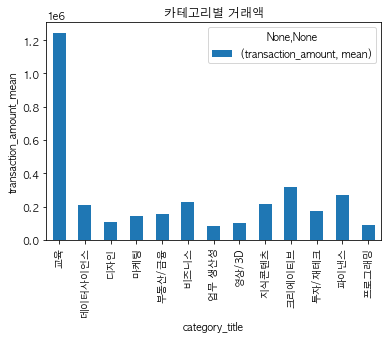

In [23]:
trimmed_ta_df = trimmed_df.groupby('category_title').agg(transaction_mean)
trimmed_ta_df.plot(kind = 'bar' ) #시각화
plt.title("카테고리별 거래액")
plt.xlabel("category_title")
plt.ylabel("transaction_amount_mean")

카테고리별 평균 거래액 비교

In [24]:
trimmed_ta_df['transaction_amount'].sort_values
#교육이 transaction amount 가장 높다. B2B 교육이 매출이 많다.

<bound method DataFrame.sort_values of                         mean
category_title              
교육              1.244984e+06
데이터사이언스         2.069414e+05
디자인             1.074179e+05
마케팅             1.446929e+05
부동산/금융          1.579165e+05
비즈니스            2.245777e+05
업무 생산성          8.539458e+04
영상/3D           9.869654e+04
지식콘텐츠           2.160870e+05
크리에이티브          3.155721e+05
투자/재테크          1.738926e+05
파이낸스            2.684211e+05
프로그래밍           8.977961e+04>

# 환불율 구하는 클래스 선언

In [25]:
class refund_data:
    def __init__(self , category):
        category_condition = trimmed_df['category_title'] == category
        self.category_df = trimmed_df[category_condition]
        category_df = self.category_df #생성자
        
    def sub_category(self, sub_title): #변수에 서브 카테고리 타이틀
        category_df = self.category_df
        sub_mask = category_df['subcategory_title'] == sub_title
        return category_df[sub_mask] #서브카테고리만 슬라이싱해서 리턴
    
    def refund(self,sub_title):
        sub_df = self.sub_category(sub_title)
        refund_check_cond = sub_df['type'] == 'REFUND' #REFUND 찾는 조건식
        return sub_df[refund_check_cond] #서브 카테고리에서 타입이 REFUND인 자료 모두 리턴 , 환불전체 건수를 알 수 있다.
    
    def refund_amount_print(self,sub_title): #환불건수 프린트하는 메소드
        refund_sub_df = self.refund(sub_title)
        print(len(refund_sub_df)) 
    
    def refund_plus(self,sub_title):
        sub_df = self.sub_category(sub_title) #서브카테고리 전체 자료
        refund_sub_df = self.refund(sub_title) #타입이 REFUND인 자료
        id_check_cond_refund = sub_df['customer_id'].isin(list(refund_sub_df['customer_id'])) #환불한 id에 속하는지 확인하는 조건, 이번기 구매도 같이 한 건수를 찾기 위함
        return sub_df[id_check_cond_refund].sort_values(by=["customer_id"], ascending=[True]) #환불을 한 번이라도 한 자료를 구했음 (이번기 환불만 or 이번기 구매+환불) #id로 정렬해서 묶었음.
    
    def refund_plus_amount_print(self, sub_title): #환불을 한 번이라도 한 건수프린트하는 메소드
        sub_df_sorted = self.refund_plus(sub_title)
        print(len(sub_df_sorted))

    def pair_refund(self, sub_title): #PAYMENT , REFUND 짝이 맞는 자료를 구하는 메소드
        sub_df_sorted = self.refund_plus(sub_title)
        return sub_df_sorted[sub_df_sorted['type'] == 'PAYMENT']

    def pair_refund_print(self, sub_title): #PAYMENT , REFUND 짝이 맞는 건수를 출력하는 메소드
        sub_df_sorted = self.refund_plus(sub_title)
        print(len(sub_df_sorted[sub_df_sorted['type'] == 'PAYMENT'])) 

    def refund_ratio(self, sub_title): #환불율을 구하는 메소드
        sub_df = self.sub_category(sub_title)
        refund_sub_df = self.refund(sub_title)
        refund_plus_df = self.refund_plus(sub_title)
        refund_pair_df = self.pair_refund(sub_title)
        only_refund = len(refund_plus_df) - 2*len(refund_pair_df) #오직 이번기간에 환불한 건수를 구했다. #한 번이라도 환불한 건수 - payment,refund 쌍을 뺌
        refund_ratio = round((len(refund_sub_df) - only_refund) / (len(sub_df) - only_refund) *100 , 2)
        #환불율을 구하면 >> 분모에는 (전체 데이터 분석 거래수 - 이번기에 구매 안 하고 환부란 한 거래 건수) ,분자에는 (전체 환불 거래수 - 이번기에 구매 안 하고 환부란 한 거래 건수)
        return refund_ratio

# 데이터사이언스 category 분석

## category 데이터사이언스의 sub_category 분석

In [26]:
condition_data_science = trimmed_df['category_title'] == '데이터사이언스'
trimmed_df[condition_data_science]['subcategory_title'].unique() #서브카테고리 value들 살펴봄

array([nan, '데이터분석', '데이터엔지니어링', '머신러닝', '딥러닝/인공지능'], dtype=object)

Nan 값들은 그냥 '데이터사이언스'로 변경하겠습니다.

In [27]:
datascience_df = trimmed_df[condition_data_science]
null_delete_condition_data = datascience_df['subcategory_title'].isna() #Nan값 확인하는 조건
datascience_df.loc[null_delete_condition_data , 'subcategory_title'] = '데이터사이언스' 

Nan값을 가지는 index, subcategory_title의 값(Nan)을 모두 데이터사이언스로 변환

In [28]:
datascience_df.groupby('subcategory_title').agg(transaction_mean) #서브카테고리별 거래액 구했다. 데이터 사이언스(기존의 Nan)의 거래액이 높다.

transaction_amount
                                mean
subcategory_title                   
데이터분석                   97393.500449
데이터사이언스                625471.972404
데이터엔지니어링               259096.842105
딥러닝/인공지능               117342.054187
머신러닝                    97111.165487

Text(0, 0.5, 'transaction_amount_mean')

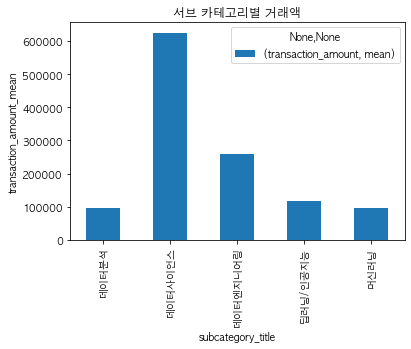

In [29]:
mean_ta_datascience_df = datascience_df.groupby('subcategory_title').agg(transaction_mean)
mean_ta_datascience_df.plot(kind = 'bar' ) #시각화
plt.title("서브 카테고리별 거래액")
plt.xlabel("subcategory_title")
plt.ylabel("transaction_amount_mean") #기존에 Nan값이었던 데이터 사이언스의 거래액이 가장 높음.

기존의 Nan값인 '데이터사이언스' 서브카테고리의 거래액이 평균적으로 가장 많습니다.

## 데이터사이언스의 subcategory 중  '데이터사이언스'(기존의 Nan)분석

In [30]:
not_refund_cond = datascience_df['transaction_amount'] > 0
what_cond = datascience_df['transaction_amount'] == 5

조건을 만들었습니다.

거래액이 양수인 조건

거래액이 5인 자료를 확인하는 조건

In [31]:
datascience_df[not_refund_cond]

id  customer_id  course_id     type      state  \
53851   1123781     504426.0   205414.0  PAYMENT  COMPLETED   
53954   1027316     504733.0   203531.0  PAYMENT  COMPLETED   
86576   1210357     588323.0   205877.0  PAYMENT  COMPLETED   
18019   1006223     118216.0   202589.0  PAYMENT  COMPLETED   
67048   1105530     535272.0   200681.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
1020    1005253       6082.0   203531.0  PAYMENT  COMPLETED   
104922  1355808     666917.0   206331.0  PAYMENT  COMPLETED   
83107   1364067     576749.0   206179.0  PAYMENT  COMPLETED   
73075   1340746     549072.0   206185.0  PAYMENT  COMPLETED   
73390   1266808     550046.0        NaN  PAYMENT  COMPLETED   

                                      course_title category_title   format  \
53851                 매주)SQL 100제 + 자격증 완성 온라인 완주반        데이터사이언스  온라인 완주반   
53954                  초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스      올인원   
86576   올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스      올인원   
18019                                 합격 패스 : ADsP        데이터사이언스      올인원   
67048                    올인원 패키지 : 머신러닝과 데이터분석 A-Z        데이터사이언스      올인원   
...                                            ...            ...      ...   
1020                   초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스      올인원   
104922                 초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스      올인원   
83107           The RED : Hadoop & Spark 아키텍처 딥다이브        데이터사이언스      RED   
73075           초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z        데이터사이언스      올인원   
73390                   [한정판매] 자연어 A-Z 끝장 패키지(~8월)        데이터사이언스      올인원   

               completed_at  transaction_amount               coupon_title  \
53851   2021-06-06 23:18:23              270000  모든 완주반 無조건 5만원 할인 (~6/13)   
53954   2021-04-25 10:09:43               72000   [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰   
86576   2021-07-11 19:47:29              279000                        NaN   
18019   2021-04-12 10:21:53               59000                        NaN   
67048   2021-05-29 13:46:03              107000   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
...                     ...                 ...                        ...   
1020    2021-04-11 22:25:12               82000                        NaN   
104922   2021-09-20 5:31:22              191000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
83107   2021-09-24 16:46:21              289000                        NaN   
73075   2021-09-10 21:06:24              174000             8월 1+1 프로모션 쿠폰   
73390   2021-08-05 15:57:07              477500                        NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
53851                  50000.0    320000.0         320000.0   KAKAO   CARD   
53954                  10000.0     82000.0          82000.0  INICIS   CARD   
86576                      NaN    279000.0         279000.0  INICIS   CARD   
18019                      NaN     59000.0          59000.0  INICIS   CARD   
67048                  20000.0    127000.0         127000.0   KAKAO  POINT   
...                        ...         ...              ...     ...    ...   
1020                       NaN     82000.0          82000.0  INICIS   CARD   
104922                 20000.0    211000.0         211000.0  INICIS   CARD   
83107                      NaN    289000.0         289000.0  INICIS   CARD   
73075                  35000.0    209000.0         209000.0   NAVER   CARD   
73390                      NaN    477500.0         477500.0   KAKAO  POINT   

       subcategory_title  marketing_start_at  
53851            데이터사이언스  2021-05-21 0:00:00  
53954              데이터분석  2021-02-10 0:00:00  
86576           데이터엔지니어링  2021-07-05 0:00:00  
18019            데이터사이언스  2020-06-19 0:00:00  
67048               머신러닝  2019-05-17 0:00:00  
...                  ...                 ...  
1020               데이터분석  2021-02-10 0:00:00  
104922          딥러닝/인공지능  2021-07-26 0:00:00  
83107           데이터엔지니

거래액이 양수인 자료만 모았습니다. (환불X , 할인해서 무료X) 

In [32]:
datascience_df[not_refund_cond]['format'].unique() 

array(['온라인 완주반', '올인원', 'B2B', 'RED', '이벤트', '스쿨', 'B2B 온라인', '캠프'],
      dtype=object)

서브카테고리가 데이터사이언스인 자료들 (기존에 Nan)인 자료들에서 거래액이 양수인 자료들을 format별로 살펴봅니다. 

subcategory가 Nan이면 온라인 완주반, 올인원, B2B, 이벤트, 스쿨 등 패키지나 이벤트성 상품으로 구성되어있습니다.

In [33]:
transaction_static_values = {
    "transaction_amount" : [np.mean , max , min ,np.std]
}

datascience_df[not_refund_cond].groupby('format').agg(transaction_static_values)

transaction_amount                                
                      mean       max     min           std
format                                                    
B2B           1.903887e+07  81040000  205000  1.981853e+07
B2B 온라인       4.393852e+06  32314524  120000  8.261257e+06
RED           2.544877e+05    419000  197000  6.912082e+04
스쿨            1.849202e+05    671420   13835  1.218087e+05
온라인 완주반       4.129859e+05    694000   24000  1.642284e+05
올인원           1.444651e+05   1800000       5  1.192024e+05
이벤트           6.256250e+04     66000   55000  5.265849e+03
캠프            1.388000e+06   1800000  830000  2.507019e+05

### format이 올인원인 자료의 최소 거래액이  5로 이상치 발견

In [34]:
what_cond = datascience_df['transaction_amount'] == 5
datascience_df[what_cond] 

id  customer_id  course_id     type      state  \
23321  1057508     163282.0        NaN  PAYMENT  COMPLETED   

                                    course_title category_title format  \
23321  프로모션 : 기초부터 시작하는 데이터분석 무제한 99패스 (5월 프리패스)        데이터사이언스    올인원   

              completed_at  transaction_amount coupon_title  \
23321  2021-05-07 14:20:29                   5          NaN   

       coupon_discount_amount  sale_price  tax_free_amount   pg    method  \
23321                     NaN    299000.0         299000.0  NaN  TRANSFER   

      subcategory_title marketing_start_at  
23321           데이터사이언스                NaN

거래액이 5인자료를 찾아봤는데 5월 프리패스로 사실상 무료나 다름 없습니다.

https://fastcampus.co.kr/event_online_freepassdata_2105

In [35]:
real_refund_cond = datascience_df['transaction_amount'] > 5

In [36]:
datascience_df[real_refund_cond].groupby('format').agg(transaction_static_values)

transaction_amount                                
                      mean       max     min           std
format                                                    
B2B           1.903887e+07  81040000  205000  1.981853e+07
B2B 온라인       4.393852e+06  32314524  120000  8.261257e+06
RED           2.544877e+05    419000  197000  6.912082e+04
스쿨            1.849202e+05    671420   13835  1.218087e+05
온라인 완주반       4.129859e+05    694000   24000  1.642284e+05
올인원           1.444901e+05   1800000     500  1.191975e+05
이벤트           6.256250e+04     66000   55000  5.265849e+03
캠프            1.388000e+06   1800000  830000  2.507019e+05

### 올인원 format의 값들을 분석
format이 올인원인 자료의 거래액이 1000인 항목 발견. 따라서 거래액이 비정상적으로 낮은 이상치가 여러개 더 있을것이라 예상

In [37]:
one_all_in_cond = datascience_df[not_refund_cond]['format'] == '올인원' #올인원 찾는 조건
datascience_df[not_refund_cond][one_all_in_cond]['transaction_amount'].unique() #값들 관찰

array([  72000,  279000,   59000,  107000,  122000,  218500,   92000,
         37000,  184775,  119000,  477500,  184000,  166000,  111500,
         53000,  124000,  220000,  194500,   83000,  136000,   49000,
        199000,  116000,   83500,  123000,   82000,  166500,  198000,
        131000,  178000,  154000,  143500,  101500,   73000,   89000,
        299000,   14500,  474000,  198500,   39000,  188000,  186500,
         39500,  165500,  161000,  249000,  125000,  119500,  103500,
        218000,   41500,  330000,  153000,  172500,   56050,  134000,
        129000,   85000,  109000,   73500,   99000,  205000,  189000,
        143000,  106000,   93500,  157500,  141500,  105000,  175000,
        114000,  164000,  123500,  209000,  481000,  462500,    5000,
        152000,  142400,  311500,  156000,  144000,   95000,   63700,
        104000,  141000,   80500,  158400,   89500,  100000,  196500,
         46500,   63000,  168000,  121500,  173500,   84000,  124600,
        120000,  149

### 비정상적으로 거래액이 낮은 자료 확인
1500,1000,5000,5 등 만원 이하를 이상치로 간주합니다.

In [38]:
sub_ds_all_in_df = datascience_df[not_refund_cond][one_all_in_cond] ##올인원만 새로 데이터 프레임으로 변수에 할당
weird_cond = sub_ds_all_in_df['transaction_amount'] < 10000  ### 비정상적으로 거래액이 낮은 항목 찾는 조건
sub_ds_all_in_df[weird_cond]

id  customer_id  course_id     type      state  \
18320  1032216     120542.0   202674.0  PAYMENT  COMPLETED   
17596  1046080     114753.0   202357.0  PAYMENT  COMPLETED   
65431  1124835     531112.0   203013.0  PAYMENT  COMPLETED   
17227  1134731     111060.0   203004.0  PAYMENT  COMPLETED   
17222  1044492     111060.0   204035.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
5175   1331099      28631.0   206185.0  PAYMENT  COMPLETED   
5025   1127036      27897.0   203533.0  PAYMENT  COMPLETED   
272    1044913       1779.0   203531.0  PAYMENT  COMPLETED   
4716   1031602      26410.0   203078.0  PAYMENT  COMPLETED   
1002   1272286       6053.0   205548.0  PAYMENT  COMPLETED   

                                 course_title category_title format  \
18320                올인원 패키지 : 수학적으로 접근하는 딥러닝        데이터사이언스    올인원   
17596             올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    올인원   
65431  글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)        데이터사이언스    올인원   
17227             REC.ON : Autonomous Vehicle        데이터사이언스    올인원   
17222            바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식        데이터사이언스    올인원   
...                                       ...            ...    ...   
5175       초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
5025   연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
272               초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    올인원   
4716              올인원 패키지 : 딥러닝을 활용한 추천시스템 구현        데이터사이언스    올인원   
1002                초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   

              completed_at  transaction_amount         coupon_title  \
18320  2021-04-26 23:52:17                5000    4월 1+1 페이백 이벤트 쿠폰   
17596  2021-04-30 23:19:27                8500    4월 1+1 페이백 이벤트 쿠폰   
65431  2021-06-07 11:47:47                2000       5월 페이백 프로모션 쿠폰   
17227  2021-06-11 13:00:49                1000       5월 페이백 프로모션 쿠폰   
17222  2021-04-30 19:32:54                9000    4월 1+1 페이백 이벤트 쿠폰   
...                    ...                 ...                  ...   
5175   2021-09-06 14:47:31                8000       8월 1+1 프로모션 쿠폰   
5025    2021-06-08 7:43:02                3000       5월 페이백 프로모션 쿠폰   
272    2021-04-30 20:55:28                3000    4월 1+1 페이백 이벤트 쿠폰   
4716   2021-04-26 20:35:24                5500    4월 1+1 페이백 이벤트 쿠폰   
1002    2021-08-09 1:16:00                3700  7월 100% 페이백 프로모션 쿠폰   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
18320                152000.0    157000.0         157000.0  INICIS   CARD   
17596                113000.0    121500.0         121500.0  INICIS   CARD   
65431                143000.0    145000.0         145000.0   KAKAO  POINT   
17227                128000.0    129000.0         129000.0   KAKAO  POINT   
17222                110000.0    119000.0         119000.0  INICIS   CARD   
...                       ...         ...              ...     ...    ...   
5175                 201000.0    209000.0         209000.0  INICIS   CARD   
5025                  81000.0     84000.0          84000.0  INICIS   CARD   
272                   79000.0     82000.0          82000.0   KAKAO  POINT   
4716                 134000.0    139500.0         139500.0  INICIS   CARD   
1002                 125300.0    129000.0         129000.0   NAVER   CARD   

      subcategory_title   marketing_start_at  
18320          딥러닝/인공지능   2020-06-02 0:00:00  
17596             데이터분석   2020-03-13 0:00:00  
65431             데이터분석  2020-08-14 18:00:00  
17227          딥러닝/인공지능   2020-08-25 0:00:00  
17222          딥러닝/인공지능   2021-04-07 0:00:00  
...                 ...                  ...  
5175               머신러닝   2021-08-23 0:00:00  
5025               머신러닝   2021-01-05 0:00:00  
272               데이터분석   2021-02-10 0:00:00  
4716           딥러닝/인공지능   2020-10-13 0:00:00  
1002              데이터분석   2021-06-17 0:00:00  

[111 rows x 18 columns]

비정상적으로 거래액이 낮은 이상치 확인

사실상 쿠폰으로 소비자 부담액은 거의 무료입니다.

### 진짜 유의미한 거래액만 모아서 통계치 찾기

In [39]:
meaningful_cond = datascience_df['transaction_amount'] > 10000 #거래액 10000보다 큰 유의미한 거래액 조건
datascience_df[meaningful_cond].groupby('format').agg(transaction_static_values) #통계값 찾기

transaction_amount                                
                      mean       max     min           std
format                                                    
B2B           1.903887e+07  81040000  205000  1.981853e+07
B2B 온라인       4.393852e+06  32314524  120000  8.261257e+06
RED           2.544877e+05    419000  197000  6.912082e+04
스쿨            1.849202e+05    671420   13835  1.218087e+05
온라인 완주반       4.129859e+05    694000   24000  1.642284e+05
올인원           1.474952e+05   1800000   10500  1.186864e+05
이벤트           6.256250e+04     66000   55000  5.265849e+03
캠프            1.388000e+06   1800000  830000  2.507019e+05

 B2B 매출이 많은 것을 확인할 수 있다.

In [40]:
transaction_mean = {
    "transaction_amount" : [np.mean]
} #거래액 평균만 구하는 조건

datascience_df[meaningful_cond].groupby('format').agg(transaction_mean)  #평균 거래액 분포구하기

transaction_amount
                      mean
format                    
B2B           1.903887e+07
B2B 온라인       4.393852e+06
RED           2.544877e+05
스쿨            1.849202e+05
온라인 완주반       4.129859e+05
올인원           1.474952e+05
이벤트           6.256250e+04
캠프            1.388000e+06

평균 거래액 분포를 구했습니다.

B2B의 거래액이 평균적으로 높습니다.

Text(0, 0.5, 'transaction_amount_mean')

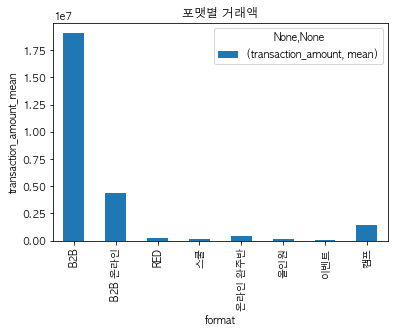

In [41]:
mean_ta_sub_ds_df = datascience_df[meaningful_cond].groupby('format').agg(transaction_mean) #이름 새로 짓고 할당했습니다. 평균_거래액_서브카테고리_데이터사이언스_DataFrame
mean_ta_sub_ds_df.plot(kind = 'bar' ) #시각화
plt.title("포맷별 거래액")
plt.xlabel("format")
plt.ylabel("transaction_amount_mean") 

평균값으로 거래액 분포를 시각화

### B2B 거래액이 많은 이유 추론
가설: B2B 거래에서는 쿠폰을 지급하지 않아서 할인이 거의 없다.

In [42]:
format_B2B_cond = (datascience_df['format'] =='B2B')|(datascience_df['format'] == 'B2B 온라인') #B2B 인 항목을 선택하기 위한 조건
datascience_df[format_B2B_cond]

id  customer_id  course_id     type      state  \
67075   1084684     535365.0   203999.0  PAYMENT  COMPLETED   
90079   1352203     600764.0   206339.0  PAYMENT  COMPLETED   
90078   1229341     600764.0   205676.0  PAYMENT  COMPLETED   
90077   1229339     600763.0   204257.0  PAYMENT  COMPLETED   
90135   1229628     600889.0   205311.0  PAYMENT  COMPLETED   
67076   1131986     535366.0   205398.0  PAYMENT  COMPLETED   
86066   1197916     586000.0   206121.0  PAYMENT  COMPLETED   
66388   1080935     533302.0   205054.0  PAYMENT  COMPLETED   
66366   1319228     533237.0   206749.0  PAYMENT  COMPLETED   
60495   1057505     521468.0   205151.0  PAYMENT  COMPLETED   
88116   1310392     594238.0   205461.0  PAYMENT  COMPLETED   
88293   1347315     594969.0   204213.0  PAYMENT  COMPLETED   
60092   1055667     520379.0   202769.0  PAYMENT  COMPLETED   
60093   1055668     520380.0   205057.0  PAYMENT  COMPLETED   
88292   1217799     594969.0   204212.0  PAYMENT  COMPLETED   
87736   1213835     592898.0   205981.0  PAYMENT  COMPLETED   
61876   1062566     524163.0   204193.0  PAYMENT  COMPLETED   
86790   1273684     589392.0   204188.0  PAYMENT  COMPLETED   
100206  1304725     642885.0   206226.0  PAYMENT  COMPLETED   
57793   1044206     514899.0   204249.0  PAYMENT  COMPLETED   
93909   1253326     615898.0   206756.0  PAYMENT  COMPLETED   
30750   1118375     385216.0   203947.0  PAYMENT  COMPLETED   
48557    984573     492332.0   204586.0  PAYMENT  COMPLETED   
97096   1280376     630176.0   206606.0  PAYMENT  COMPLETED   
72267   1111251     547305.0   204249.0  PAYMENT  COMPLETED   
72266   1111250     547305.0   204256.0  PAYMENT  COMPLETED   
104019  1344408     661249.0   204280.0  PAYMENT  COMPLETED   
79519   1155555     567639.0   205389.0  PAYMENT  COMPLETED   
79452   1155233     567457.0   205223.0  PAYMENT  COMPLETED   
79454   1229637     567457.0   205224.0  PAYMENT  COMPLETED   
75699   1131987     557182.0   202769.0  PAYMENT  COMPLETED   
79349   1318092     567161.0   206854.0  PAYMENT  COMPLETED   
79348   1154775     567160.0   204305.0  PAYMENT  COMPLETED   
72899   1114604     548381.0   203947.0  PAYMENT  COMPLETED   
77736   1145404     562762.0   205372.0  PAYMENT  COMPLETED   
78429   1149899     565038.0   205057.0  PAYMENT  COMPLETED   
80289   1159461     569895.0   205920.0  PAYMENT  COMPLETED   
85768   1218487     584835.0   205329.0  PAYMENT  COMPLETED   
85767   1195640     584835.0   205329.0  PAYMENT  COMPLETED   
85769   1266668     584835.0   206226.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
67075                                  (B2B) 이마트 데이터 아카데미        데이터사이언스   
90079                            (B2B) 이마트 데이터 아카데미 (7차수)        데이터사이언스   
90078                            (B2B) 이마트 데이터 아카데미 (3차수)        데이터사이언스   
90077   (B2B) 두산경영연구원 2021 현업 프로젝트를 위한 데이터 분석 및 해석 과정 2차수        데이터사이언스   
90135               (B2B) 현대오토에버 온라인 싱글 플랜 - 직장인파이썬분석 포팅건        데이터사이언스   
67076                       (B2B) LG유플러스 오라클 설치 Q&A 클래스 2        데이터사이언스   
86066                          (B2B) 한국전력공사 온라인 구독 패키지 플랜        데이터사이언스   
66388                          (B2B) 신한은행 온라인 구독 싱글 플랜 2차        데이터사이언스   
66366                          (B2B) 신한은행 온라인 구독 싱글 플랜 3차        데이터사이언스   
60495                           (B2B) 한국전력공사 온라인 구독 싱글 플랜        데이터사이언스   
88116                        (B2B) 명지대학교 디지털 트랜스포메이션 기초교육        데이터사이언스   
88293       (B2B) 한라인재개발원 2021 Work Smart 프로그램 - 데이터 사이언스        데이터사이언스   
60092                 (B2B) 현대엔지니어링 데이터 사이언스 Package PLAN        데이터사이언스   
60093                           (B2B) SK네트웍스 온라인 구독 싱글 플랜        데이터사이언스   
88292   (B2B) 한라인재개발원 2021 Work Smart 프로그램 - 데이터 자동화 및...        데이터사이언스   
87736                      (B2B) 국민대학교 경영대학원 온라인 구독 싱글 플랜        데이터사이언스   
61876            (B2B) LG전자 2021 Data Scientist 중급 과정 1차수        데이터사이언스   
86790                   (B2B) LG전자 2021 빅데이터 직무전환자 과정 2차수    

B2B인 자료들을 확인해본 결과 쿠폰이 없는것을 확인할 수 있습니다.

가설검증완료

In [43]:
datascience_df[format_B2B_cond]['coupon_title'].isnull() 

67075     True
90079     True
90078     True
90077     True
90135     True
67076     True
86066     True
66388     True
66366     True
60495     True
88116     True
88293     True
60092     True
60093     True
88292     True
87736     True
61876     True
86790     True
100206    True
57793     True
93909     True
30750     True
48557     True
97096     True
72267     True
72266     True
104019    True
79519     True
79452     True
79454     True
75699     True
79349     True
79348     True
72899     True
77736     True
78429     True
80289     True
85768     True
85767     True
85769     True
Name: coupon_title, dtype: bool

B2B인 자료들은 모두 쿠폰타이틀이 Nan입니다. 따라서 전부 쿠폰이 없다는 것을 확인할 수 있습니다.

## B2B제외한  나머지 format 분석

### format 스쿨 분석

In [44]:
format_school_cond = (datascience_df['format'] =='스쿨')
datascience_df[format_school_cond]

id  customer_id  course_id     type      state  \
11453  1115547      66516.0   203870.0  PAYMENT  COMPLETED   
11454  1195526      66516.0   203870.0  PAYMENT  COMPLETED   
11455  1262521      66516.0   203870.0  PAYMENT  COMPLETED   
11456  1323524      66516.0   203870.0  PAYMENT  COMPLETED   
19805  1195513     132091.0   203870.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
8264   1232625      45295.0   203870.0  PAYMENT  COMPLETED   
8263   1195517      45295.0   203870.0  PAYMENT  COMPLETED   
8262   1115556      45295.0   203870.0  PAYMENT  COMPLETED   
8261   1056022      45295.0   203870.0  PAYMENT  COMPLETED   
8266   1323514      45295.0   203870.0  PAYMENT  COMPLETED   

               course_title category_title format         completed_at  \
11453  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-05-31 15:38:38   
11454  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-06-29 0:00:00   
11455  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-07-29 15:17:38   
11456  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-08-27 15:17:38   
19805  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-06-14 0:00:00   
...                     ...            ...    ...                  ...   
8264   데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-07-14 0:00:00   
8263   데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-06-14 0:00:00   
8262   데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-05-31 15:38:38   
8261   데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-05-03 7:12:02   
8266   데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-08-27 15:17:38   

       transaction_amount coupon_title  coupon_discount_amount  sale_price  \
11453              351550          NaN                     NaN         NaN   
11454              216526          NaN                     NaN         NaN   
11455              307608          NaN                     NaN         NaN   
11456              131832          NaN                     NaN         NaN   
19805              175240          NaN                     NaN         NaN   
...                   ...          ...                     ...         ...   
8264               166017          NaN                     NaN         NaN   
8263               175240          NaN                     NaN         NaN   
8262               246086          NaN                     NaN         NaN   
8261               469993          NaN                     NaN         NaN   
8266                92282          NaN                     NaN         NaN   

       tax_free_amount   pg  method subcategory_title  marketing_start_at  
11453              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
11454              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
11455              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
11456              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
19805              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
...                ...  ...     ...               ...                 ...  
8264               NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
8263               NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
8262               NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
8261               NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
8266               NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  

[79 rows x 18 columns]

In [45]:
datascience_df[format_school_cond].sort_values(by=["transaction_amount"], ascending=[True]) #transaction_amount 기준으로 오름차순 정렬했습니다. 

id  customer_id  course_id     type      state  \
28641  1323535     284097.0   203870.0  PAYMENT  COMPLETED   
15557  1323537      98171.0   203870.0  PAYMENT  COMPLETED   
34499  1323543     426618.0   203870.0  PAYMENT  COMPLETED   
19809  1323532     132091.0   203870.0  PAYMENT  COMPLETED   
29924  1323538     376898.0   203870.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
32026  1056015     399577.0   203870.0  PAYMENT  COMPLETED   
33903  1056026     419116.0   203870.0  PAYMENT  COMPLETED   
28636  1056019     284097.0   203870.0  PAYMENT  COMPLETED   
8261   1056022      45295.0   203870.0  PAYMENT  COMPLETED   
33035  1056020     409454.0   203870.0  PAYMENT  COMPLETED   

               course_title category_title format         completed_at  \
28641  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-08-27 15:17:38   
15557  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-08-27 15:17:38   
34499  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-08-27 15:17:38   
19809  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-08-27 15:17:38   
29924  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨  2021-08-27 15:17:38   
...                     ...            ...    ...                  ...   
32026  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-05-03 7:06:20   
33903  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-05-03 7:12:02   
28636  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-05-03 7:12:02   
8261   데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-05-03 7:12:02   
33035  데이터 사이언스 취업완성 스쿨 17기        데이터사이언스     스쿨   2021-05-03 7:12:02   

       transaction_amount coupon_title  coupon_discount_amount  sale_price  \
28641               13835          NaN                     NaN         NaN   
15557               13835          NaN                     NaN         NaN   
34499               13835          NaN                     NaN         NaN   
19809               13835          NaN                     NaN         NaN   
29924               13835          NaN                     NaN         NaN   
...                   ...          ...                     ...         ...   
32026              469989          NaN                     NaN         NaN   
33903              469989          NaN                     NaN         NaN   
28636              469993          NaN                     NaN         NaN   
8261               469993          NaN                     NaN         NaN   
33035              671420          NaN                     NaN         NaN   

       tax_free_amount   pg  method subcategory_title  marketing_start_at  
28641              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
15557              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
34499              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
19809              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
29924              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
...                ...  ...     ...               ...                 ...  
32026              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
33903              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
28636              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
8261               NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  
33035              NaN  NaN  ONSITE           데이터사이언스  2020-12-23 0:00:00  

[79 rows x 18 columns]

거래액을 기준으로 오름차순한 결과 '데이터 사이언스 스쿨 17기'즉 format 스쿨의 거래액이 모두 양수임을 확인할 수 있습니다.

In [46]:
ds_check_cond = datascience_df[format_school_cond]['state'] == 'REFUND' #환불확인용 조건
datascience_df[format_school_cond][ds_check_cond]

Empty DataFrame
Columns: [id, customer_id, course_id, type, state, course_title, category_title, format, completed_at, transaction_amount, coupon_title, coupon_discount_amount, sale_price, tax_free_amount, pg, method, subcategory_title, marketing_start_at]
Index: []

정말로 환불이 하나도 없는 것을 확인할 수 있습니다.

### format 온라인완주반 분석

In [47]:
format_online_complete_cond = (datascience_df['format'] =='온라인 완주반')
datascience_df[format_online_complete_cond].sort_values(by=["transaction_amount"], ascending=[True]) #transaction_amount 기준으로 오름차순 정렬했습니다.

id  customer_id  course_id     type      state  \
67653  1093840     537197.0   203952.0   REFUND  COMPLETED   
29766  1066311     374133.0   203952.0   REFUND  COMPLETED   
60361  1057098     521096.0   203952.0   REFUND  COMPLETED   
18021  1055605     118216.0   203952.0   REFUND  COMPLETED   
5450    996544      30261.0   203952.0   REFUND  COMPLETED   
...        ...          ...        ...      ...        ...   
67652  1088492     537197.0   203952.0  PAYMENT  COMPLETED   
10850  1083533      62421.0   203952.0  PAYMENT  COMPLETED   
25358  1096548     181241.0   203952.0  PAYMENT  COMPLETED   
29608  1101810     372435.0   203952.0  PAYMENT  COMPLETED   
25359  1097644     181241.0   203952.0  PAYMENT  COMPLETED   

              course_title category_title   format         completed_at  \
67653  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-05-24 10:42:54   
29766  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-05-12 10:18:34   
60361  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-05-07 11:48:27   
18021  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-05-06 15:32:34   
5450   매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-04-07 16:18:14   
...                    ...            ...      ...                  ...   
67652  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-05-21 21:49:59   
10850  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-05-20 10:52:24   
25358  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반   2021-05-25 0:24:59   
29608  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-05-27 16:12:26   
25359  매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반  2021-05-25 16:45:53   

       transaction_amount coupon_title  coupon_discount_amount  sale_price  \
67653             -691500          NaN                     NaN    691500.0   
29766             -681500          NaN                     NaN    681500.0   
60361             -681500          NaN                     NaN    681500.0   
18021             -676500          NaN                     NaN    676500.0   
5450              -659000          NaN                     NaN    659000.0   
...                   ...          ...                     ...         ...   
67652              691500          NaN                     NaN    691500.0   
10850              691500          NaN                     NaN    691500.0   
25358              694000          NaN                     NaN    694000.0   
29608              694000          NaN                     NaN    694000.0   
25359              694000          NaN                     NaN    694000.0   

       tax_free_amount      pg method subcategory_title  marketing_start_at  
67653         691500.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
29766         681500.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
60361         681500.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
18021         676500.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
5450          659000.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
...                ...     ...    ...               ...                 ...  
67652         691500.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
10850         691500.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
25358         694000.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
29608         694000.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  
25359         694000.0  INICIS   CARD           데이터사이언스  2021-01-04 0:00:00  

[374 rows x 18 columns]

오름차순으로 정렬했습니다.

#### 데이터 사이언스 카테고리의 온라인완주반의 환급율 분석.

In [48]:
sorted_format_online_complete_sub_ds_df = datascience_df[format_online_complete_cond].sort_values(by=["transaction_amount"], ascending=[True]) #새로 이름 붙여줍니다.
refund_cond = sorted_format_online_complete_sub_ds_df['transaction_amount'] < 0 #거래량이 음수인 조건
sorted_format_online_complete_sub_ds_df[refund_cond] #전부다 REFUND인것 확인가능

id  customer_id  course_id    type      state  \
67653  1093840     537197.0   203952.0  REFUND  COMPLETED   
29766  1066311     374133.0   203952.0  REFUND  COMPLETED   
60361  1057098     521096.0   203952.0  REFUND  COMPLETED   
18021  1055605     118216.0   203952.0  REFUND  COMPLETED   
5450    996544      30261.0   203952.0  REFUND  COMPLETED   
74336  1124724     552904.0   203952.0  REFUND  COMPLETED   
69009  1096903     540395.0   203952.0  REFUND  COMPLETED   
10613  1145670      60320.0   203952.0  REFUND  COMPLETED   
33682  1054967     416384.0   203952.0  REFUND  COMPLETED   
77419  1144738     561991.0   203952.0  REFUND  COMPLETED   
50336  1008291     495383.0   203952.0  REFUND  COMPLETED   
47563   998886     490426.0   203952.0  REFUND  COMPLETED   
43830   984694     482681.0   203952.0  REFUND  COMPLETED   
51444  1013023     498337.0   203952.0  REFUND  COMPLETED   
46238   994336     487273.0   203952.0  REFUND  COMPLETED   
33390   996298     413459.0   203952.0  REFUND  COMPLETED   
10851  1127735      62421.0   203952.0  REFUND  COMPLETED   
77919  1228994     563388.0   203952.0  REFUND  COMPLETED   
32925  1050773     408373.0   204622.0  REFUND  COMPLETED   
31139   994230     389482.0   204622.0  REFUND  COMPLETED   
13250  1064338      79515.0   204622.0  REFUND  COMPLETED   
60833  1070277     522325.0   204622.0  REFUND  COMPLETED   
39193  1017906     463980.0   203952.0  REFUND  COMPLETED   
53341  1071208     502889.0   204622.0  REFUND  COMPLETED   
74226  1203745     552599.0   203952.0  REFUND  COMPLETED   
76458  1174177     559779.0   203952.0  REFUND  COMPLETED   
5992   1012875      32831.0   204622.0  REFUND  COMPLETED   
44239   992769     483414.0   204264.0  REFUND  COMPLETED   
38151   998607     458491.0   204264.0  REFUND  COMPLETED   
12530   987150      73727.0   204264.0  REFUND  COMPLETED   
35042  1109723     430410.0   205059.0  REFUND  COMPLETED   
29753   972422     373915.0   204264.0  REFUND  COMPLETED   
11115  1066298      64646.0   204622.0  REFUND  COMPLETED   
23054  1033044     161352.0   204622.0  REFUND  COMPLETED   
46922  1101783     488865.0   204622.0  REFUND  COMPLETED   
12025  1141035      70695.0   205414.0  REFUND  COMPLETED   
27472  1124684     275493.0   205414.0  REFUND  COMPLETED   
54403  1064443     506026.0   203952.0  REFUND  COMPLETED   
54325  1143017     505732.0   205414.0  REFUND  COMPLETED   
61510  1110177     523470.0   205414.0  REFUND  COMPLETED   
48523  1010234     492244.0   204264.0  REFUND  COMPLETED   
44136  1011972     483118.0   204264.0  REFUND  COMPLETED   
46241   994779     487273.0   204264.0  REFUND  COMPLETED   
30298  1017535     380447.0   204264.0  REFUND  COMPLETED   
74209  1124502     552542.0   205158.0  REFUND  COMPLETED   
74262  1124585     552745.0   205158.0  REFUND  COMPLETED   
10281   999096      57617.0   204167.0  REFUND  COMPLETED   
15875  1146609      99540.0   205158.0  REFUND  COMPLETED   
11119  1098811      64646.0   205158.0  REFUND  COMPLETED   
70250  1118028     543337.0   205158.0  REFUND  COMPLETED   
62832  1146725     525899.0   205158.0  REFUND  COMPLETED   
64167  1077551     528986.0   205158.0  REFUND  COMPLETED   
76581  1186409     560008.0   205158.0  REFUND  COMPLETED   
44159  1025051     483212.0   204264.0  REFUND  COMPLETED   
50298  1101415     495277.0   203952.0  REFUND  COMPLETED   
55407  1200230     508473.0   205414.0  REFUND  COMPLETED   

                       course_title category_title   format  \
67653           매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반   
29766           매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반   
60361           매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반   
18021           매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반   
5450            매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반   
74336           매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반   
69009           매주)데이터 사이언스 온라인 완주반        데이터사이언스  온라인 완주반   
10613           매주)데이터 사이언스 온라

환급한 자료들만 출력했습니다. (Transaction_amount가 음수인 자료)

In [49]:
len(sorted_format_online_complete_sub_ds_df[refund_cond]) 

56

환급한 자료의 개수를 세어보니 56개입니다.

In [50]:
데이터사이언스완주반환급율 = round(len(sorted_format_online_complete_sub_ds_df[refund_cond])/len(sorted_format_online_complete_sub_ds_df) * 100 , 2) #소수점 2자리까지 구했습니다
print('데이터사이언스 완주반 환급율은 {0}%입니다.'.format(데이터사이언스완주반환급율))

데이터사이언스 완주반 환급율은 14.97%입니다.


#### 결론(insight): 완주반 환급율이 낮아서 좋은 마케팅이라고 판단할 수 있습니다.

### format 올인원 분석

In [51]:
format_all_in_one_cond = (datascience_df['format'] =='올인원')
datascience_df[format_all_in_one_cond].sort_values(by=["transaction_amount"], ascending=[True]) #transaction_amount 기준으로 오름차순 정렬했습니다.

id  customer_id  course_id     type      state  \
22989  1361162     160616.0        NaN   REFUND  COMPLETED   
6625   1361378      36427.0        NaN   REFUND  COMPLETED   
23678  1360462     166684.0        NaN   REFUND  COMPLETED   
67330  1094512     536229.0        NaN   REFUND  COMPLETED   
36058  1220115     440893.0        NaN   REFUND  COMPLETED   
...        ...          ...        ...      ...        ...   
89591  1357848     599472.0        NaN  PAYMENT  COMPLETED   
25259  1359676     178770.0        NaN  PAYMENT  COMPLETED   
7813   1359762      43265.0        NaN  PAYMENT  COMPLETED   
4177   1356092      23638.0        NaN  PAYMENT  COMPLETED   
93493  1359891     613775.0        NaN  PAYMENT  COMPLETED   

                                            course_title category_title  \
22989                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
6625                 프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
23678                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
67330  프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼...        데이터사이언스   
36058  프로모션 : 나를 위한  데이터사이언스 백과사전  iPad 패키지 (7월 현물 프리패스)        데이터사이언스   
...                                                  ...            ...   
89591                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
25259                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
7813                 프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
4177                 프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
93493                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   

      format         completed_at  transaction_amount coupon_title  \
22989    올인원  2021-09-23 16:03:09            -1800000          NaN   
6625     올인원  2021-09-23 17:04:54            -1800000          NaN   
23678    올인원  2021-09-23 11:36:22            -1800000          NaN   
67330    올인원  2021-05-24 14:40:02            -1399000          NaN   
36058    올인원  2021-07-16 10:33:16            -1290000          NaN   
...      ...                  ...                 ...          ...   
89591    올인원  2021-09-21 22:26:18             1800000          NaN   
25259    올인원  2021-09-22 22:56:20             1800000          NaN   
7813     올인원  2021-09-22 23:24:25             1800000          NaN   
4177     올인원  2021-09-20 13:36:15             1800000          NaN   
93493    올인원   2021-09-23 0:05:01             1800000          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
22989                     NaN   1800000.0         295200.0  INICIS   CARD   
6625                      NaN   1800000.0         295200.0  INICIS   CARD   
23678                     NaN   1800000.0         295200.0  INICIS   CARD   
67330                     NaN   1399000.0         156000.0  INICIS   CARD   
36058                     NaN   1290000.0         572800.0  INICIS   CARD   
...                       ...         ...              ...     ...    ...   
89591                     NaN   1800000.0         295200.0  INICIS   CARD   
25259                     NaN   1800000.0         295200.0  INICIS   CARD   
7813                      NaN   1800000.0         295200.0   PAYCO   CARD   
4177                      NaN   1800000.0         295200.0   PAYCO   CARD   
93493                     NaN   1800000.0         295200.0  INICIS   CARD   

      subcategory_title marketing_start_at  
22989           데이터사이언스                NaN  
6625            데이터사이언스                NaN  
23678           데이터사이언스                NaN  
67330           데이터사이언스                NaN  
36058           데이터사이언스                NaN  
...                 ...                ...  
89591           데이터사이언스                NaN  
25259           데이터사이언스                NaN  
7813            데이터사이언스                NaN  
4177            데이터사이언스                NaN  
93493           데이터사이언스                NaN  

[6510 rows x 18 columns]

In [52]:
sorted_format_all_in_one_sub_ds_df = datascience_df[format_all_in_one_cond].sort_values(by=["transaction_amount"], ascending=[True]) #이름 새로 지어줍니다.
refund_cond_1 = sorted_format_all_in_one_sub_ds_df['transaction_amount'] < 0 #거래량이 음수인 조건
sorted_format_all_in_one_sub_ds_df[refund_cond_1] #음수인 자료만 모았다.

id  customer_id  course_id    type      state  \
22989  1361162     160616.0        NaN  REFUND  COMPLETED   
6625   1361378      36427.0        NaN  REFUND  COMPLETED   
23678  1360462     166684.0        NaN  REFUND  COMPLETED   
67330  1094512     536229.0        NaN  REFUND  COMPLETED   
36058  1220115     440893.0        NaN  REFUND  COMPLETED   
...        ...          ...        ...     ...        ...   
50963  1030860     496846.0   203531.0  REFUND  COMPLETED   
52849  1062010     501531.0   203531.0  REFUND  COMPLETED   
40683  1062215     473123.0   202589.0  REFUND  COMPLETED   
24174  1064594     170707.0   202589.0  REFUND  COMPLETED   
83484  1292339     577786.0   201083.0  REFUND  COMPLETED   

                                            course_title category_title  \
22989                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
6625                 프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
23678                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
67330  프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼...        데이터사이언스   
36058  프로모션 : 나를 위한  데이터사이언스 백과사전  iPad 패키지 (7월 현물 프리패스)        데이터사이언스   
...                                                  ...            ...   
50963                        초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스   
52849                        초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스   
40683                                       합격 패스 : ADsP        데이터사이언스   
24174                                       합격 패스 : ADsP        데이터사이언스   
83484                                 올인원 패키지 : 딥러닝/인공지능        데이터사이언스   

      format         completed_at  transaction_amount coupon_title  \
22989    올인원  2021-09-23 16:03:09            -1800000          NaN   
6625     올인원  2021-09-23 17:04:54            -1800000          NaN   
23678    올인원  2021-09-23 11:36:22            -1800000          NaN   
67330    올인원  2021-05-24 14:40:02            -1399000          NaN   
36058    올인원  2021-07-16 10:33:16            -1290000          NaN   
...      ...                  ...                 ...          ...   
50963    올인원  2021-04-26 15:41:42              -48000          NaN   
52849    올인원  2021-05-10 10:09:16              -48000          NaN   
40683    올인원  2021-05-10 11:37:39              -39333          NaN   
24174    올인원  2021-05-11 13:07:27              -32666          NaN   
83484    올인원  2021-08-17 13:53:58              -14500          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
22989                     NaN   1800000.0         295200.0  INICIS   CARD   
6625                      NaN   1800000.0         295200.0  INICIS   CARD   
23678                     NaN   1800000.0         295200.0  INICIS   CARD   
67330                     NaN   1399000.0         156000.0  INICIS   CARD   
36058                     NaN   1290000.0         572800.0  INICIS   CARD   
...                       ...         ...              ...     ...    ...   
50963                     NaN     82000.0          82000.0  INICIS  VBANK   
52849                     NaN     82000.0          82000.0  INICIS   CARD   
40683                     NaN     59000.0          59000.0  INICIS   CARD   
24174                     NaN     59000.0          59000.0  INICIS   CARD   
83484                     NaN    213500.0         213500.0   KAKAO  POINT   

      subcategory_title  marketing_start_at  
22989           데이터사이언스                 NaN  
6625            데이터사이언스                 NaN  
23678           데이터사이언스                 NaN  
67330           데이터사이언스                 NaN  
36058           데이터사이언스                 NaN  
...                 ...                 ...  
50963             데이터분석  2021-02-10 0:00:00  
52849             데이터분석  2021-02-10 0:00:00  
40683           데이터사이언스  2020-06-19 0:00:00  
24174           데이터사이언스  2020-06-19 0:00:00  
83484          딥러닝/인공지능  2019-07-04 0:00:00  

[371 rows x 18 columns]

거래액이 음수인 자료들은 총 62개입니다.

In [53]:
refund_cond_2 = sorted_format_all_in_one_sub_ds_df['type'] == 'REFUND'
sorted_format_all_in_one_sub_ds_df[refund_cond_2] #type 이 REFUND인 자료만 모았다.

id  customer_id  course_id    type      state  \
22989  1361162     160616.0        NaN  REFUND  COMPLETED   
6625   1361378      36427.0        NaN  REFUND  COMPLETED   
23678  1360462     166684.0        NaN  REFUND  COMPLETED   
67330  1094512     536229.0        NaN  REFUND  COMPLETED   
36058  1220115     440893.0        NaN  REFUND  COMPLETED   
...        ...          ...        ...     ...        ...   
50963  1030860     496846.0   203531.0  REFUND  COMPLETED   
52849  1062010     501531.0   203531.0  REFUND  COMPLETED   
40683  1062215     473123.0   202589.0  REFUND  COMPLETED   
24174  1064594     170707.0   202589.0  REFUND  COMPLETED   
83484  1292339     577786.0   201083.0  REFUND  COMPLETED   

                                            course_title category_title  \
22989                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
6625                 프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
23678                프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)        데이터사이언스   
67330  프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼...        데이터사이언스   
36058  프로모션 : 나를 위한  데이터사이언스 백과사전  iPad 패키지 (7월 현물 프리패스)        데이터사이언스   
...                                                  ...            ...   
50963                        초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스   
52849                        초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스   
40683                                       합격 패스 : ADsP        데이터사이언스   
24174                                       합격 패스 : ADsP        데이터사이언스   
83484                                 올인원 패키지 : 딥러닝/인공지능        데이터사이언스   

      format         completed_at  transaction_amount coupon_title  \
22989    올인원  2021-09-23 16:03:09            -1800000          NaN   
6625     올인원  2021-09-23 17:04:54            -1800000          NaN   
23678    올인원  2021-09-23 11:36:22            -1800000          NaN   
67330    올인원  2021-05-24 14:40:02            -1399000          NaN   
36058    올인원  2021-07-16 10:33:16            -1290000          NaN   
...      ...                  ...                 ...          ...   
50963    올인원  2021-04-26 15:41:42              -48000          NaN   
52849    올인원  2021-05-10 10:09:16              -48000          NaN   
40683    올인원  2021-05-10 11:37:39              -39333          NaN   
24174    올인원  2021-05-11 13:07:27              -32666          NaN   
83484    올인원  2021-08-17 13:53:58              -14500          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
22989                     NaN   1800000.0         295200.0  INICIS   CARD   
6625                      NaN   1800000.0         295200.0  INICIS   CARD   
23678                     NaN   1800000.0         295200.0  INICIS   CARD   
67330                     NaN   1399000.0         156000.0  INICIS   CARD   
36058                     NaN   1290000.0         572800.0  INICIS   CARD   
...                       ...         ...              ...     ...    ...   
50963                     NaN     82000.0          82000.0  INICIS  VBANK   
52849                     NaN     82000.0          82000.0  INICIS   CARD   
40683                     NaN     59000.0          59000.0  INICIS   CARD   
24174                     NaN     59000.0          59000.0  INICIS   CARD   
83484                     NaN    213500.0         213500.0   KAKAO  POINT   

      subcategory_title  marketing_start_at  
22989           데이터사이언스                 NaN  
6625            데이터사이언스                 NaN  
23678           데이터사이언스                 NaN  
67330           데이터사이언스                 NaN  
36058           데이터사이언스                 NaN  
...                 ...                 ...  
50963             데이터분석  2021-02-10 0:00:00  
52849             데이터분석  2021-02-10 0:00:00  
40683           데이터사이언스  2020-06-19 0:00:00  
24174           데이터사이언스  2020-06-19 0:00:00  
83484          딥러닝/인공지능  2019-07-04 0:00:00  

[371 rows x 18 columns]

거래액이 음수면 반드시 type이 REFUND임을 확인할 수 있습니다.

In [54]:
list(sorted_format_all_in_one_sub_ds_df[refund_cond_2]['customer_id']) #리스트로 일단 만들었습니다. 환불한 개인 고객의 id를 리스트 자료구조로
id_check_cond = sorted_format_all_in_one_sub_ds_df['customer_id'].isin(list(sorted_format_all_in_one_sub_ds_df[refund_cond_2]['customer_id'])) #환불한 id에 속하는지 확인하는 조건
sorted_format_all_in_one_sub_ds_df[id_check_cond].sort_values(by=["customer_id"], ascending=[True])  #확인해봄 그리고 Customer_id 별로 확인하려고 오름차순 정렬

id  customer_id  course_id     type      state  \
9       1322793        153.0   206044.0  PAYMENT  COMPLETED   
11      1344225        153.0   203076.0  PAYMENT  COMPLETED   
12      1348577        153.0   203355.0  PAYMENT  COMPLETED   
10      1333562        153.0   206044.0   REFUND  COMPLETED   
641     1318907       3783.0   206331.0   REFUND  COMPLETED   
...         ...          ...        ...      ...        ...   
104191  1346089     662274.0   202614.0   REFUND  COMPLETED   
104190  1346070     662274.0   206331.0  PAYMENT  COMPLETED   
104696  1355435     665200.0   206185.0  PAYMENT  COMPLETED   
104699  1360458     665200.0   206185.0   REFUND  COMPLETED   
104706  1360420     665263.0        NaN   REFUND  COMPLETED   

                                          course_title category_title format  \
9       올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
11                      올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석        데이터사이언스    올인원   
12                         올인원 패키지 : 처음부터 시작하는 딥러닝 유치원        데이터사이언스    올인원   
10      올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
641                        초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   
...                                                ...            ...    ...   
104191                            올인원 패키지 : 컴퓨터비전과 딥러닝        데이터사이언스    올인원   
104190                     초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   
104696              초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
104699              초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
104706    프로모션 : 비전공자를 위한 데이터 분석 왕초보 입문 무한패스 (9월 프리패스)        데이터사이언스    올인원   

               completed_at  transaction_amount             coupon_title  \
9       2021-08-31 23:57:29              219000                      NaN   
11      2021-09-13 11:16:52              139000                      NaN   
12      2021-09-15 22:07:47              159000                      NaN   
10      2021-09-07 10:37:22             -219000                      NaN   
641     2021-08-31 16:53:17             -205000                      NaN   
...                     ...                 ...                      ...   
104191  2021-09-14 15:45:42             -166000                      NaN   
104190  2021-09-14 15:32:24              201000  [미래투자금] 온라인 강의 1만원 할인쿠폰   
104696  2021-09-19 21:45:32              189000  [미래투자금] 온라인 강의 2만원 할인쿠폰   
104699  2021-09-23 11:35:35             -189000                      NaN   
104706  2021-09-23 11:17:03             -450000                      NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
9                          NaN    219000.0         219000.0  INICIS   CARD   
11                         NaN    139000.0         139000.0  INICIS   CARD   
12                         NaN    159000.0         159000.0  INICIS   CARD   
10                         NaN    219000.0         219000.0  INICIS   CARD   
641                        NaN    205000.0         205000.0  INICIS   CARD   
...                        ...         ...              ...     ...    ...   
104191                     NaN    186000.0         186000.0  INICIS   CARD   
104190                 10000.0    211000.0         211000.0  INICIS   CARD   
104696                 20000.0    209000.0         209000.0   NAVER   CARD   
104699                     NaN    209000.0         209000.0   NAVER   CARD   
104706                     NaN    450000.0         450000.0   PAYCO   CARD   

       subcategory_title  marketing_start_at  
9                   머신러닝  2021-07-26 0:00:00  
11                 데이터분석  2020-09-11 0:00:00  
12              딥러닝/인공지능  2021-01-14 0:00:00  
10                  머신러닝  2021-07-26 0:00:00  
641             딥러닝/인공지능  2021-07-26 0:00:00  
...                  ...                 ...  
104191          딥러닝/인공지능  2020-05-20 0:00:00  
104190          딥러닝/인공지능  2021-07-26 0:00:00  
104696              머신

정렬해보니까 REFUND랑 PAYMENT가 쌍으로 나오는게 아닌 것을 확인할 수 있습니다. PAYMENT 숫자가 더 부족합니다.. 따라서 결론은 이 데이터 모으기 전에 결제 했던 PAYMENT를 이 기간(주어진 자료의 기간)에 환불했다고 추측할 수 있습니다.

그렇다면 이 dataset을 조사한 기간에 정확한 환불율을 구하기 위해서는 pair로 존재하는 자료만 찾아야합니다.

#### 결론:정확한 환불율을 구하기 위해서는 PAYMETN & REFUND가 pair로 존재하는 자료를 찾아서 구해야합니다.

### format 이벤트 분석

In [55]:
format_event_one_cond = (datascience_df['format'] =='이벤트') #이벤트 찾는 조건
datascience_df[format_event_one_cond].sort_values(by=["customer_id"], ascending=[True]) #customer_id별로 정렬해본다.

id  customer_id  course_id     type      state  \
1075   1049331       6204.0   205099.0  PAYMENT  COMPLETED   
1475   1048832      11359.0   205099.0  PAYMENT  COMPLETED   
1612   1049717      11922.0   205096.0  PAYMENT  COMPLETED   
1708   1049123      12123.0   205096.0  PAYMENT  COMPLETED   
17050  1049664     109639.0   205099.0  PAYMENT  COMPLETED   
21802  1050319     150413.0   205099.0   REFUND  COMPLETED   
33463  1048865     413971.0   205096.0  PAYMENT  COMPLETED   
35140  1062421     431067.0   205097.0   REFUND  COMPLETED   
35139  1049848     431067.0   205097.0  PAYMENT  COMPLETED   
41356  1049409     477637.0   205096.0  PAYMENT  COMPLETED   
50635  1048417     496120.0   205096.0  PAYMENT  COMPLETED   
51001  1049655     497071.0   205097.0  PAYMENT  COMPLETED   
51434  1049182     498308.0   205097.0  PAYMENT  COMPLETED   
53443  1049242     503179.0   205099.0  PAYMENT  COMPLETED   
57211  1049117     513473.0   205096.0  PAYMENT  COMPLETED   
57212  1057625     513473.0   205096.0   REFUND  COMPLETED   
58603  1049503     516652.0   205097.0  PAYMENT  COMPLETED   
58690  1049509     516910.0   205096.0  PAYMENT  COMPLETED   
58772  1049820     517113.0   205099.0  PAYMENT  COMPLETED   

                                   course_title category_title format  \
1075   [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    이벤트   
1475   [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    이벤트   
1612       [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB        데이터사이언스    이벤트   
1708       [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB        데이터사이언스    이벤트   
17050  [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    이벤트   
21802  [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    이벤트   
33463      [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB        데이터사이언스    이벤트   
35140  [120일 수강 가능] 올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    이벤트   
35139  [120일 수강 가능] 올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    이벤트   
41356      [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB        데이터사이언스    이벤트   
50635      [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB        데이터사이언스    이벤트   
51001  [120일 수강 가능] 올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    이벤트   
51434  [120일 수강 가능] 올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    이벤트   
53443  [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    이벤트   
57211      [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB        데이터사이언스    이벤트   
57212      [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB        데이터사이언스    이벤트   
58603  [120일 수강 가능] 올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    이벤트   
58690      [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB        데이터사이언스    이벤트   
58772  [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    이벤트   

              completed_at  transaction_amount coupon_title  \
1075   2021-05-02 20:45:01               55000          NaN   
1475   2021-05-02 16:13:39               55000          NaN   
1612   2021-05-02 23:05:08               66000          NaN   
1708   2021-05-02 18:37:33               66000          NaN   
17050  2021-05-02 22:49:02               55000          NaN   
21802  2021-05-03 11:15:23              -55000          NaN   
33463  2021-05-02 16:37:09               66000          NaN   
35140  2021-05-10 13:23:06              -66000          NaN   
35139  2021-05-02 23:46:49               66000          NaN   
41356  2021-05-02 21:14:02               66000          NaN   
50635  2021-05-02 10:57:20               66000          NaN   
51001  2021-05-02 22:47:22               66000          NaN   
51434  2021-05-02 19:02:40               66000          NaN   
53443  2021-05-02 19:43:20               55000          NaN   
57211  2021-05-02 18:35:25               66000          NaN   
57212  2021-05-07 16:46:29              -66000          NaN   
58603  2021-05-02 21:50:30               66000          NaN   
58690  2021-05-02 21:51:51               66000          NaN   
58772  2021-05-02 23:38:05               55000          NaN   

       coupon_discount_amount  sale_price  tax_fr

너무 자료가 적어서 생략하겠습니다. 실질적으로 pair로 존재하는 환불은 2건입니다.

##  subcategory '데이터분석'의  환불율 분석

In [56]:
Data_science = refund_data('데이터사이언스')

데이터 사이언스 인스턴스 호출

In [57]:
Data_science.sub_category('데이터분석')

id  customer_id  course_id     type      state  \
53954  1027316     504733.0   203531.0  PAYMENT  COMPLETED   
18024  1194583     118242.0   203047.0  PAYMENT  COMPLETED   
11521  1335796      67145.0   205548.0  PAYMENT  COMPLETED   
53979  1022966     504835.0   203047.0  PAYMENT  COMPLETED   
86572  1204227     588312.0   205548.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
5971   1204327      32619.0   205548.0  PAYMENT  COMPLETED   
73074  1286218     549072.0   203076.0  PAYMENT  COMPLETED   
4756   1154919      26670.0   205548.0  PAYMENT  COMPLETED   
5835   1179520      31766.0   205548.0  PAYMENT  COMPLETED   
1020   1005253       6082.0   203531.0  PAYMENT  COMPLETED   

                            course_title category_title format  \
53954        초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    올인원   
18024  올인원 패키지 : 파이썬을 활용한 시계열 데이터 분석 A-Z        데이터사이언스    올인원   
11521          초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
53979  올인원 패키지 : 파이썬을 활용한 시계열 데이터 분석 A-Z        데이터사이언스    올인원   
86572          초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
...                                  ...            ...    ...   
5971           초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
73074     올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석        데이터사이언스    올인원   
4756           초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
5835           초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
1020         초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    올인원   

              completed_at  transaction_amount              coupon_title  \
53954  2021-04-25 10:09:43               72000  [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰   
18024  2021-07-05 11:36:09              218500                       NaN   
11521  2021-09-08 13:54:11               37000            8월 1+1 프로모션 쿠폰   
53979  2021-04-22 17:14:19              184775   ?즉시할인 쿠폰 코드 : sawol5% ?   
86572  2021-07-08 16:59:07              119000                       NaN   
...                    ...                 ...                       ...   
5971   2021-07-08 17:55:15              119000                       NaN   
73074  2021-08-14 13:33:30              131500                       NaN   
4756   2021-06-21 13:00:36               89000                       NaN   
5835   2021-06-30 16:06:44               89000                       NaN   
1020   2021-04-11 22:25:12               82000                       NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
53954                 10000.0     82000.0          82000.0  INICIS   CARD   
18024                     NaN    218500.0         218500.0  INICIS   CARD   
11521                102000.0    139000.0         139000.0   NAVER  POINT   
53979                  9725.0    194500.0         194500.0  INICIS   CARD   
86572                     NaN    119000.0         119000.0   NAVER  POINT   
...                       ...         ...              ...     ...    ...   
5971                      NaN    119000.0         119000.0   PAYCO   CARD   
73074                     NaN    131500.0         131500.0   NAVER   CARD   
4756                      NaN     89000.0          89000.0  INICIS   CARD   
5835                      NaN     89000.0          89000.0  INICIS   CARD   
1020                      NaN     82000.0          82000.0  INICIS   CARD   

      subcategory_title  marketing_start_at  
53954             데이터분석  2021-02-10 0:00:00  
18024             데이터분석  2020-08-21 0:00:00  
11521             데이터분석  2021-06-17 0:00:00  
53979             데이터분석  2020-08-21 0:00:00  
86572             데이터분석  2021-06-17 0:00:00  
...                 ...                 ...  
5971              데이터분석  2021-06-17 0:00:00  
73074             데이터분석  2020-09-11 0:00:00  
4756              데이터분석  2021-06-17 0:00:00  
5835              데이터분석  2021-06-17 0:00:00  
1020              데이터분석  2021-02-10 0:00:00  

[2226 rows x 18 columns]

데이터 사이언스 중 서브카테고리가 데이터분석인 자료 불러오는 메소드 호출

In [58]:
Data_science.refund('데이터분석')

id  customer_id  course_id    type      state  \
50963  1030860     496846.0   203531.0  REFUND  COMPLETED   
65642  1086639     531353.0   203076.0  REFUND  COMPLETED   
18060  1283501     118642.0   203531.0  REFUND  COMPLETED   
18056  1078084     118615.0   202357.0  REFUND  COMPLETED   
89714  1243007     599779.0   205548.0  REFUND  COMPLETED   
...        ...          ...        ...     ...        ...   
9997   1180341      55928.0   205548.0  REFUND  COMPLETED   
79746  1174096     568322.0   205548.0  REFUND  COMPLETED   
6044   1344262      33076.0   205548.0  REFUND  COMPLETED   
81857  1330366     573876.0   202357.0  REFUND  COMPLETED   
80093  1178143     569429.0   202357.0  REFUND  COMPLETED   

                         course_title category_title format  \
50963     초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    올인원   
65642  올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석        데이터사이언스    올인원   
18060     초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    올인원   
18056     올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    올인원   
89714       초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
...                               ...            ...    ...   
9997        초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
79746       초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
6044        초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
81857     올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    올인원   
80093     올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    올인원   

              completed_at  transaction_amount coupon_title  \
50963  2021-04-26 15:41:42              -48000          NaN   
65642  2021-05-21 10:16:40              -81000          NaN   
18060  2021-08-13 13:08:24             -105000          NaN   
18056  2021-05-17 15:27:13              -99153          NaN   
89714  2021-07-26 13:51:27             -109000          NaN   
...                    ...                 ...          ...   
9997   2021-06-30 18:13:59              -89000          NaN   
79746  2021-06-29 10:49:51              -79000          NaN   
6044   2021-09-13 11:39:53             -139000          NaN   
81857  2021-09-06 11:15:17             -164000          NaN   
80093  2021-06-30 11:36:57             -124000          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
50963                     NaN     82000.0          82000.0  INICIS  VBANK   
65642                     NaN    101000.0         101000.0  INICIS   CARD   
18060                     NaN    105000.0         105000.0  INICIS   CARD   
18056                     NaN    123500.0         123500.0  INICIS   CARD   
89714                     NaN    119000.0         119000.0   NAVER   CARD   
...                       ...         ...              ...     ...    ...   
9997                      NaN     89000.0          89000.0   KAKAO  POINT   
79746                     NaN     89000.0          89000.0  INICIS   CARD   
6044                      NaN    139000.0         139000.0  INICIS   CARD   
81857                     NaN    164000.0         164000.0  INICIS   CARD   
80093                     NaN    124000.0         124000.0  INICIS   CARD   

      subcategory_title  marketing_start_at  
50963             데이터분석  2021-02-10 0:00:00  
65642             데이터분석  2020-09-11 0:00:00  
18060             데이터분석  2021-02-10 0:00:00  
18056             데이터분석  2020-03-13 0:00:00  
89714             데이터분석  2021-06-17 0:00:00  
...                 ...                 ...  
9997              데이터분석  2021-06-17 0:00:00  
79746             데이터분석  2021-06-17 0:00:00  
6044              데이터분석  2021-06-17 0:00:00  
81857             데이터분석  2020-03-13 0:00:00  
80093             데이터분석  2020-03-13 0:00:00  

[128 rows x 18 columns]

In [59]:
Data_science.pair_refund('데이터분석')

id  customer_id  course_id     type      state  \
636     1062483       3783.0   202929.0  PAYMENT  COMPLETED   
2840    1298612      16543.0   205548.0  PAYMENT  COMPLETED   
7481     980101      40835.0   203531.0  PAYMENT  COMPLETED   
7479     979455      40835.0   203531.0  PAYMENT  COMPLETED   
11027   1094019      64136.0   203531.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
97859   1287647     633210.0   202357.0  PAYMENT  COMPLETED   
97857   1287459     633210.0   202927.0  PAYMENT  COMPLETED   
97856   1287451     633210.0   202551.0  PAYMENT  COMPLETED   
97865   1331492     633210.0   202927.0  PAYMENT  COMPLETED   
103476  1346254     658425.0   203076.0  PAYMENT  COMPLETED   

                               course_title category_title format  \
636                The RED : 데이터 사이언티스트 하용호        데이터사이언스    RED   
2840              초격차 패키지 : 한 번에 끝내는 데이터 분석        데이터사이언스    올인원   
7481            초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    올인원   
7479            초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    올인원   
11027           초격차 패키지 : 한 번에 끝내는 데이터 분석 툴        데이터사이언스    올인원   
...                                     ...            ...    ...   
97859           올인원 패키지 : 직장인을 위한 파이썬 데이터분석        데이터사이언스    올인원   
97857   올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP        데이터사이언스    올인원   
97856       올인원 패키지 : 프로젝트와 함께 배우는 R 데이터 분석        데이터사이언스    올인원   
97865   올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP        데이터사이언스    올인원   
103476       올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석        데이터사이언스    올인원   

               completed_at  transaction_amount              coupon_title  \
636     2021-05-10 13:53:29              199000                       NaN   
2840    2021-08-20 16:14:09              129000                       NaN   
7481    2021-03-31 11:53:48               70500             [럭키룰렛] 올인원패키지   
7479     2021-03-31 9:36:32               80500                       NaN   
11027   2021-05-24 12:02:22               73500  [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰   
...                     ...                 ...                       ...   
97859   2021-08-15 14:05:20              164000                       NaN   
97857   2021-08-15 12:17:20              162500                       NaN   
97856   2021-08-15 12:10:28              166500                       NaN   
97865   2021-09-06 16:43:52                   0            8월 1+1 프로모션 쿠폰   
103476  2021-09-14 17:23:49              129000   [미래투자금] 온라인 강의 1만원 할인쿠폰   

        coupon_discount_amount  sale_price  tax_free_amount      pg  \
636                        NaN    199000.0         199000.0  INICIS   
2840                       NaN    129000.0         129000.0   PAYCO   
7481                   10000.0     80500.0          80500.0     NaN   
7479                       NaN     80500.0          80500.0     NaN   
11027                  10000.0     83500.0          83500.0  INICIS   
...                        ...         ...              ...     ...   
97859                      NaN    164000.0         164000.0   NAVER   
97857                      NaN    162500.0         162500.0   NAVER   
97856                      NaN    166500.0         166500.0   NAVER   
97865                 164000.0    163000.0         163000.0     NaN   
103476                 10000.0    139000.0         139000.0  INICIS   

           method subcategory_title  marketing_start_at  
636          CARD             데이터분석  2020-08-26 0:00:00  
2840        POINT             데이터분석  2021-06-17 0:00:00  
7481         CARD             데이터분석  2021-02-10 0:00:00  
7479         CARD             데이터분석  2021-02-10 0:00:00  
11027        CARD             데이터분석  2021-02-10 0:00:00  
...           ...               ...                 ...  
97859        CARD             데이터분석  2020-03-13 0:00:00  
97857        CARD             데이터분석  2020-07-31 0:00:00  
97856        CARD             데이터분석  2020-04-07 0:00:00  
97865   PROMOTION             데이터분석  2020-07-31 0:00:00  
103476     

PAYMENT & REFUND pair로 존재하는 자료 출력하는 메소드 호출

In [60]:
Data_science.refund_ratio('데이터분석')

4.03

### 서브카테고리 데이터분석의 환불율은 4.03%입니다.
환불율 구하는 메소드 호출

## subcategory '데이터 엔지니어링'의 환불율 분석

In [61]:
Data_science.sub_category('데이터엔지니어링')

id  customer_id  course_id     type      state  \
86576   1210357     588323.0   205877.0  PAYMENT  COMPLETED   
10501   1242145      59025.0   205877.0  PAYMENT  COMPLETED   
17698   1335687     115612.0   204824.0  PAYMENT  COMPLETED   
90025   1242021     600629.0   205877.0  PAYMENT  COMPLETED   
18038   1339642     118307.0   204824.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
9534    1208577      52966.0   205877.0  PAYMENT  COMPLETED   
104969  1359743     667376.0   206179.0  PAYMENT  COMPLETED   
9204    1359799      50769.0   206742.0  PAYMENT  COMPLETED   
79695   1347300     568185.0   205877.0  PAYMENT  COMPLETED   
83107   1364067     576749.0   206179.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
86576          올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
10501          올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
17698   The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
90025          올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
18038   The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
...                                                   ...            ...   
9534           올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
104969                 The RED : Hadoop & Spark 아키텍처 딥다이브        데이터사이언스   
9204                     올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축        데이터사이언스   
79695          올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
83107                  The RED : Hadoop & Spark 아키텍처 딥다이브        데이터사이언스   

       format         completed_at  transaction_amount  \
86576     올인원  2021-07-11 19:47:29              279000   
10501     올인원  2021-07-25 23:32:05              279000   
17698     RED  2021-09-08 12:42:06              399000   
90025     올인원  2021-07-25 23:07:11              249000   
18038     RED  2021-09-10 14:50:44              399000   
...       ...                  ...                 ...   
9534      올인원  2021-07-10 17:31:58              279000   
104969    RED  2021-09-22 23:20:42              279000   
9204      올인원  2021-09-22 23:33:18              339150   
79695     올인원  2021-09-15 11:16:02              283000   
83107     RED  2021-09-24 16:46:21              289000   

                                             coupon_title  \
86576                                                 NaN   
10501                                                 NaN   
17698                                                 NaN   
90025                           [WELCOME] 온라인 강의 3만원 할인쿠폰   
18038                                                 NaN   
...                                                   ...   
9534                                                  NaN   
104969                                                NaN   
9204    [할인 쿠폰] 추석맞이 15% 시크릿 감사 15% 할인 쿠폰(데이터사이언스 카테고리...   
79695                                                 NaN   
83107                                                 NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
86576                      NaN    279000.0         279000.0  INICIS   CARD   
10501                      NaN    279000.0         279000.0  INICIS   CARD   
17698                      NaN    399000.0         399000.0   NAVER   CARD   
90025                  30000.0    279000.0         279000.0   KAKAO   CARD   
18038                      NaN    399000.0         399000.0  INICIS  VBANK   
...                        ...         ...              ...     ...    ...   
9534                       NaN    279000.0         279000.0   NAVER  POINT   
104969                     NaN    279000.0         279000.0  INICIS   CARD   
9204                   59850.0    399000.0         399000.0  INICIS   CARD   
79695                      NaN    283000.0         283000.0   KAKAO   CARD   
83107                      NaN    289000.0         2890

In [62]:
Data_science.refund('데이터엔지니어링')

id  customer_id  course_id    type      state  \
19739   1361675     131563.0   206179.0  REFUND  COMPLETED   
87897   1339527     593524.0   204824.0  REFUND  COMPLETED   
32588   1361008     405283.0   206179.0  REFUND  COMPLETED   
22094   1292180     152846.0   205877.0  REFUND  COMPLETED   
4150    1335459      23460.0   204824.0  REFUND  COMPLETED   
104801  1360451     666108.0   204824.0  REFUND  COMPLETED   
7121    1344170      39345.0   204824.0  REFUND  COMPLETED   
2828    1337655      16477.0   205877.0  REFUND  COMPLETED   
10430   1360993      58602.0   206179.0  REFUND  COMPLETED   
103782  1344193     660251.0   204824.0  REFUND  COMPLETED   
103739  1344198     660029.0   205877.0  REFUND  COMPLETED   
1094    1363369       6215.0   205877.0  REFUND  COMPLETED   

                                             course_title category_title  \
19739                  The RED : Hadoop & Spark 아키텍처 딥다이브        데이터사이언스   
87897   The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
32588                  The RED : Hadoop & Spark 아키텍처 딥다이브        데이터사이언스   
22094          올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
4150    The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
104801  The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
7121    The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
2828           올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
10430                  The RED : Hadoop & Spark 아키텍처 딥다이브        데이터사이언스   
103782  The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
103739         올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
1094           올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   

       format         completed_at  transaction_amount coupon_title  \
19739     RED  2021-09-23 19:05:38             -223200          NaN   
87897     RED  2021-09-10 14:02:20             -399000          NaN   
32588     RED  2021-09-23 15:08:36             -279000          NaN   
22094     올인원  2021-08-17 11:58:02             -281000          NaN   
4150      RED  2021-09-08 10:24:34             -399000          NaN   
104801    RED  2021-09-23 11:32:17             -409000          NaN   
7121      RED  2021-09-13 10:42:34             -399000          NaN   
2828      올인원  2021-09-09 15:38:16             -283000          NaN   
10430     RED  2021-09-23 15:03:07             -223200          NaN   
103782    RED  2021-09-13 10:52:27             -399000          NaN   
103739    올인원  2021-09-13 10:55:24             -263000          NaN   
1094      올인원  2021-09-24 11:48:09             -283000          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
19739                      NaN    279000.0         279000.0  INICIS   CARD   
87897                      NaN    399000.0         399000.0  INICIS   CARD   
32588                      NaN    279000.0         279000.0   PAYCO   CARD   
22094                      NaN    281000.0         281000.0   KAKAO  POINT   
4150                       NaN    399000.0         399000.0   KAKAO   CARD   
104801                     NaN    409000.0         409000.0   NAVER   CARD   
7121                       NaN    399000.0         399000.0  INICIS   CARD   
2828                       NaN    283000.0         283000.0   NAVER   CARD   
10430                      NaN    279000.0         279000.0   PAYCO  POINT   
103782                     NaN    399000.0         399000.0   KAKAO  POINT   
103739                     NaN    283000.0         283000.0  INICIS   CARD   
1094                       NaN    283000.0         283000.0  INICIS   CARD   

       subcategory_title  marketing_start_at  
19739           데이터엔지니어링  2021-09-13 0:00:00  
87897           데이터엔지니어링  2021-09-06 0:00:00  
32588           데이터엔지니어링  2021-09-13 0:00:00  
22094           데이터엔지니어링  2021-07-05 0:00:00  
4150            데이터엔지니어링  2021-09-06 0:00:0

In [63]:
Data_science.pair_refund('데이터엔지니어링')

id  customer_id  course_id     type      state  \
1090    1353615       6215.0   205877.0  PAYMENT  COMPLETED   
2829    1346328      16477.0   206179.0  PAYMENT  COMPLETED   
2826    1332426      16477.0   205877.0  PAYMENT  COMPLETED   
4149    1334805      23460.0   204824.0  PAYMENT  COMPLETED   
22093   1287821     152846.0   205877.0  PAYMENT  COMPLETED   
87896   1334905     593524.0   204824.0  PAYMENT  COMPLETED   
103781  1342300     660251.0   204824.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
1090           올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
2829                   The RED : Hadoop & Spark 아키텍처 딥다이브        데이터사이언스   
2826           올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
4149    The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
22093          올인원 패키지 : Elasticsearch로 하루만에 고급 검색 엔진 만들기        데이터사이언스   
87896   The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   
103781  The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...        데이터사이언스   

       format         completed_at  transaction_amount  \
1090      올인원  2021-09-18 11:20:03              283000   
2829      RED  2021-09-14 18:02:21              223200   
2826      올인원  2021-09-06 21:44:03              283000   
4149      RED  2021-09-07 21:59:35              399000   
22093     올인원  2021-08-15 16:13:14              281000   
87896     RED  2021-09-07 22:38:14              399000   
103781    RED   2021-09-12 3:03:13              399000   

                                      coupon_title  coupon_discount_amount  \
1090                                           NaN                     NaN   
2829    [20%할인] The RED : Hadoop & Spark 아키텍처 딥다이브                 55800.0   
2826                                           NaN                     NaN   
4149                                           NaN                     NaN   
22093                                          NaN                     NaN   
87896                                          NaN                     NaN   
103781                                         NaN                     NaN   

        sale_price  tax_free_amount      pg method subcategory_title  \
1090      283000.0         283000.0  INICIS   CARD          데이터엔지니어링   
2829      279000.0         279000.0   NAVER   CARD          데이터엔지니어링   
2826      283000.0         283000.0   NAVER   CARD          데이터엔지니어링   
4149      399000.0         399000.0   KAKAO   CARD          데이터엔지니어링   
22093     281000.0         281000.0   KAKAO  POINT          데이터엔지니어링   
87896     399000.0         399000.0  INICIS   CARD          데이터엔지니어링   
103781    399000.0         399000.0   KAKAO  POINT          데이터엔지니어링   

        marketing_start_at  
1090    2021-07-05 0:00:00  
2829    2021-09-13 0:00:00  
2826    2021-07-05 0:00:00  
4149    2021-09-06 0:00:00  
22093   2021-07-05 0:00:00  
87896   2021-09-06 0:00:00  
103781  2021-09-06 0:00:00

In [64]:
Data_science.refund_ratio('데이터분석')

4.03

### 데이턴엔지니어링의 환불율 3.78%입니다.

## subcategory '딥러닝/인공지능'의 환불율 분석

In [65]:
Data_science.sub_category('딥러닝/인공지능')

id  customer_id  course_id     type      state  \
53972   1022964     504825.0   203355.0  PAYMENT  COMPLETED   
53824   1055433     504366.0   203532.0  PAYMENT  COMPLETED   
53803   1022188     504318.0   203532.0  PAYMENT  COMPLETED   
86580   1204279     588336.0   204649.0  PAYMENT  COMPLETED   
54006   1217920     504931.0   202612.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
4759    1292059      26670.0   206419.0  PAYMENT  COMPLETED   
1163    1249793       6325.0   206419.0  PAYMENT  COMPLETED   
1022    1339256       6082.0   206331.0  PAYMENT  COMPLETED   
4762    1275037      26703.0   203078.0  PAYMENT  COMPLETED   
104922  1355808     666917.0   206331.0  PAYMENT  COMPLETED   

                                      course_title category_title format  \
53972                  올인원 패키지 : 처음부터 시작하는 딥러닝 유치원        데이터사이언스    올인원   
53824        연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+        데이터사이언스    올인원   
53803        연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+        데이터사이언스    올인원   
86580   The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기        데이터사이언스    RED   
54006             올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문        데이터사이언스    올인원   
...                                            ...            ...    ...   
4759        올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리         데이터사이언스    올인원   
1163        올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리         데이터사이언스    올인원   
1022                   초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   
4762                   올인원 패키지 : 딥러닝을 활용한 추천시스템 구현        데이터사이언스    올인원   
104922                 초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   

               completed_at  transaction_amount  \
53972   2021-04-22 17:12:32              122000   
53824   2021-05-06 14:25:48                   0   
53803    2021-04-22 9:20:18               92000   
86580   2021-07-08 17:29:16              209000   
54006   2021-07-15 11:17:25              184000   
...                     ...                 ...   
4759    2021-08-17 11:10:24              198000   
1163    2021-07-29 16:28:15              142400   
1022    2021-09-10 11:51:07               10000   
4762    2021-08-09 23:05:04              173500   
104922   2021-09-20 5:31:22              191000   

                                coupon_title  coupon_discount_amount  \
53972               [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰                 30000.0   
53824                [무료수강권] 강의 검수용_하수진 매니저님                 93500.0   
53803                                    NaN                     NaN   
86580                                    NaN                     NaN   
54006                                    NaN                     NaN   
...                                      ...                     ...   
4759                                     NaN                     NaN   
1163    [특별쿠폰] 김기현의 BERT, GPT-3 강의 20% 할인 쿠폰                 35600.0   
1022                          8월 1+1 프로모션 쿠폰                201000.0   
4762                                     NaN                     NaN   
104922               [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0   

        sale_price  tax_free_amount      pg     method subcategory_title  \
53972     152000.0         152000.0  INICIS       CARD          딥러닝/인공지능   
53824      93500.0          93500.0     NaN  PROMOTION          딥러닝/인공지능   
53803      92000.0          92000.0  INICIS       CARD          딥러닝/인공지능   
86580     209000.0         209000.0  INICIS       CARD          딥러닝/인공지능   
54006     184000.0         184000.0   NAVER       CARD          딥러닝/인공지능   
...            ...              ...     ...        ...               ...   
4759      198000.0         198000.0  INICIS       CARD          딥러닝/인공지능   
1163      178000.0         178000.0   NAVER       CARD          딥러닝/인공지능   
1022      211000.0         211000.0   PAYCO      POINT          딥러닝/인공지능   
4762      173500.0         173500.0  INICIS       CARD          딥러닝/인공지능   
104922    211000.0         21

In [66]:
Data_science.refund('딥러닝/인공지능')

id  customer_id  course_id    type      state  \
18043   1334224     118348.0   206331.0  REFUND  COMPLETED   
17173   1283507     110666.0   203355.0  REFUND  COMPLETED   
17111   1103989     110120.0   203532.0  REFUND  COMPLETED   
101357  1315631     648234.0   206331.0  REFUND  COMPLETED   
66542   1085234     533774.0   203355.0  REFUND  COMPLETED   
...         ...          ...        ...     ...        ...   
1096    1363371       6215.0   204649.0  REFUND  COMPLETED   
68593   1116248     539378.0   201083.0  REFUND  COMPLETED   
103724  1345672     659934.0   202845.0  REFUND  COMPLETED   
4778    1196838      26761.0   201083.0  REFUND  COMPLETED   
5801    1057029      31528.0   204035.0  REFUND  COMPLETED   

                                      course_title category_title format  \
18043                  초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   
17173                  올인원 패키지 : 처음부터 시작하는 딥러닝 유치원        데이터사이언스    올인원   
17111        연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+        데이터사이언스    올인원   
101357                 초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   
66542                  올인원 패키지 : 처음부터 시작하는 딥러닝 유치원        데이터사이언스    올인원   
...                                            ...            ...    ...   
1096    The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기        데이터사이언스    RED   
68593                           올인원 패키지 : 딥러닝/인공지능        데이터사이언스    올인원   
103724     글로벌 엑스퍼트 : GAN 딥러닝 완벽 가이드 with 글로벌 엔지니어        데이터사이언스    올인원   
4778                            올인원 패키지 : 딥러닝/인공지능        데이터사이언스    올인원   
5801                  바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식        데이터사이언스    올인원   

               completed_at  transaction_amount coupon_title  \
18043   2021-09-07 16:02:32             -205000          NaN   
17173   2021-08-13 13:10:35             -156000          NaN   
17111   2021-05-28 15:09:57              -93500          NaN   
101357  2021-08-30 18:11:28             -205000          NaN   
66542   2021-05-20 18:28:34             -123000          NaN   
...                     ...                 ...          ...   
1096    2021-09-24 11:48:36             -249000          NaN   
68593   2021-06-02 10:14:09             -143000          NaN   
103724  2021-09-14 10:58:10             -137830          NaN   
4778    2021-07-06 10:29:08             -193500          NaN   
5801    2021-05-07 10:58:21             -120000          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
18043                      NaN    205000.0         205000.0  INICIS   CARD   
17173                      NaN    156000.0         156000.0  INICIS   CARD   
17111                      NaN     93500.0          93500.0  INICIS   CARD   
101357                     NaN    205000.0         205000.0  INICIS   CARD   
66542                      NaN    153000.0         153000.0  INICIS   CARD   
...                        ...         ...              ...     ...    ...   
1096                       NaN    249000.0         249000.0  INICIS   CARD   
68593                      NaN    173000.0         173000.0  INICIS   CARD   
103724                     NaN    199000.0         199000.0  INICIS   CARD   
4778                       NaN    193500.0         193500.0  INICIS   CARD   
5801                       NaN    120000.0         120000.0   KAKAO  POINT   

       subcategory_title  marketing_start_at  
18043           딥러닝/인공지능  2021-07-26 0:00:00  
17173           딥러닝/인공지능  2021-01-14 0:00:00  
17111           딥러닝/인공지능  2021-02-22 0:00:00  
101357          딥러닝/인공지능  2021-07-26 0:00:00  
66542           딥러닝/인공지능  2021-01-14 0:00:00  
...                  ...                 ...  
1096            딥러닝/인공지능  2021-07-02 0:00:00  
68593           딥러닝/인공지능  2019-07-04 0:00:00  
103724          딥러닝/인공지능  2020-07-27 0:00:00  
4778            딥러닝/인공지능  2019-07-04 0:00:00  
5801            딥러닝/인공지능  2021-04-07 0:00:00  

[122 rows x 18 columns]

In [67]:
Data_science.pair_refund('딥러닝/인공지능')

id  customer_id  course_id     type      state  \
640     1318766       3783.0   206331.0  PAYMENT  COMPLETED   
1092    1354689       6215.0   204035.0  PAYMENT  COMPLETED   
1091    1353822       6215.0   204649.0  PAYMENT  COMPLETED   
1751    1334494      12272.0   202711.0  PAYMENT  COMPLETED   
1834    1327705      12608.0   206331.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
101356  1314767     648234.0   206331.0  PAYMENT  COMPLETED   
101683  1317330     649475.0   202614.0  PAYMENT  COMPLETED   
101775  1321053     649675.0   204035.0  PAYMENT  COMPLETED   
103725  1348745     659934.0   202711.0  PAYMENT  COMPLETED   
104190  1346070     662274.0   206331.0  PAYMENT  COMPLETED   

                                      course_title category_title format  \
640                    초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   
1092                  바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식        데이터사이언스    올인원   
1091    The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기        데이터사이언스    RED   
1751                 올인원 패키지 : 김기현의 딥러닝을 활용한 자연어생성        데이터사이언스    올인원   
1834                   초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   
...                                            ...            ...    ...   
101356                 초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   
101683                        올인원 패키지 : 컴퓨터비전과 딥러닝        데이터사이언스    올인원   
101775                바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식        데이터사이언스    올인원   
103725               올인원 패키지 : 김기현의 딥러닝을 활용한 자연어생성        데이터사이언스    올인원   
104190                 초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능        데이터사이언스    올인원   

               completed_at  transaction_amount               coupon_title  \
640     2021-08-31 16:18:10              205000                        NaN   
1092    2021-09-19 10:27:31              179000                        NaN   
1091    2021-09-18 15:08:19              249000                        NaN   
1751    2021-09-07 18:53:00              239000                        NaN   
1834     2021-09-04 7:48:15              211000                        NaN   
...                     ...                 ...                        ...   
101356  2021-08-30 13:36:07              205000                        NaN   
101683  2021-08-31 17:29:09              155500  [WELCOME] 온라인 강의 3만원 할인쿠폰   
101775  2021-08-31 21:49:08              161000                        NaN   
103725  2021-09-15 23:43:41              219000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
104190  2021-09-14 15:32:24              201000    [미래투자금] 온라인 강의 1만원 할인쿠폰   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
640                        NaN    205000.0         205000.0  INICIS   CARD   
1092                       NaN    179000.0         179000.0  INICIS   CARD   
1091                       NaN    249000.0         249000.0  INICIS   CARD   
1751                       NaN    239000.0         239000.0   KAKAO  POINT   
1834                       NaN    211000.0         211000.0  INICIS   CARD   
...                        ...         ...              ...     ...    ...   
101356                     NaN    205000.0         205000.0  INICIS   CARD   
101683                 30000.0    185500.0         185500.0  INICIS  VBANK   
101775                     NaN    161000.0         161000.0   NAVER   CARD   
103725                 20000.0    239000.0         239000.0  INICIS   CARD   
104190                 10000.0    211000.0         211000.0  INICIS   CARD   

       subcategory_title  marketing_start_at  
640             딥러닝/인공지능  2021-07-26 0:00:00  
1092            딥러닝/인공지능  2021-04-07 0:00:00  
1091            딥러닝/인공지능  2021-07-02 0:00:00  
1751            딥러닝/인공지능  2020-07-03 0:00:00  
1834            딥러닝/인공지능  2021-07-26 0:00:00  
...                  ...                 ...  
101356          딥러닝/인공지능  2021-07-26 0:00:00  
101683          딥러닝/인공지능  2020-05-20 0:00:00  
101775          딥러닝/인공지능  2021-04-07 0:00:00  

In [68]:
Data_science.refund_ratio('딥러닝/인공지능')

4.54

### 결과적으로 딥러닝/인공지능 환불율을 4.54%입니다.

## subcategory '머신러닝'  분석

In [69]:
Data_science.sub_category('머신러닝')

id  customer_id  course_id     type      state  \
67048  1105530     535272.0   200681.0  PAYMENT  COMPLETED   
17980  1067836     117889.0   203533.0  PAYMENT  COMPLETED   
17928  1304190     117662.0   206185.0  PAYMENT  COMPLETED   
51292  1102302     497895.0   203533.0  PAYMENT  COMPLETED   
11572  1060994      67457.0   203533.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
6015   1221483      32936.0   203533.0  PAYMENT  COMPLETED   
73038  1119706     548793.0   202611.0  PAYMENT  COMPLETED   
1167   1257174       6328.0   206044.0  PAYMENT  COMPLETED   
81787  1182224     573742.0   205816.0  PAYMENT  COMPLETED   
73075  1340746     549072.0   206185.0  PAYMENT  COMPLETED   

                                         course_title category_title format  \
67048                       올인원 패키지 : 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
17980          연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
17928              초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
51292          연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
11572          연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
...                                               ...            ...    ...   
6015           연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
73038            올인원 패키지 : 모델 성능 개선으로 익히는 강화학습 A to Z        데이터사이언스    올인원   
1167   올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
81787                        올인원 패키지 : 강필성의 머신러닝 아카데미        데이터사이언스    올인원   
73075              초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   

              completed_at  transaction_amount              coupon_title  \
67048  2021-05-29 13:46:03              107000  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
17980  2021-05-12 23:50:18               83000                       NaN   
17928  2021-08-24 12:40:15              198000                       NaN   
51292  2021-05-27 20:27:48               73000  [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰   
11572  2021-05-09 21:15:29               83000                       NaN   
...                    ...                 ...                       ...   
6015   2021-07-16 19:02:45              104000                       NaN   
73038   2021-06-04 3:39:24                   0           [무료수강권] 박지우 강사님   
1167   2021-07-31 22:04:39              199000                       NaN   
81787  2021-06-30 21:35:56              129000                       NaN   
73075  2021-09-10 21:06:24              174000            8월 1+1 프로모션 쿠폰   

       coupon_discount_amount  sale_price  tax_free_amount      pg     method  \
67048                 20000.0    127000.0         127000.0   KAKAO      POINT   
17980                     NaN     83000.0          83000.0  INICIS       CARD   
17928                     NaN    198000.0         198000.0   KAKAO      POINT   
51292                 10000.0     83000.0          83000.0  INICIS       CARD   
11572                     NaN     83000.0          83000.0   KAKAO       CARD   
...                       ...         ...              ...     ...        ...   
6015                      NaN    104000.0         104000.0  INICIS       CARD   
73038                195000.0    195000.0         195000.0     NaN  PROMOTION   
1167                      NaN    199000.0         199000.0  INICIS       CARD   
81787                     NaN    129000.0         129000.0  INICIS       CARD   
73075                 35000.0    209000.0         209000.0   NAVER       CARD   

      subcategory_title  marketing_start_at  
67048              머신러닝  2019-05-17 0:00:00  
17980              머신러닝  2021-01-05 0:00:00  
17928              머신러닝  2021-08-23 0:00:00  
51292              머신러닝  2021-01-05 0:00:00  
11572              머신러닝  2021-01-05 0:00:00  
...                 ...                 ...  
6015               머신러닝  2021-01-05 0:00:00  
73038              머신러닝  2020-05-21 0:00:00  
1167              

In [70]:
Data_science.refund('머신러닝')

id  customer_id  course_id    type      state  \
86603  1213782     588452.0   205816.0  REFUND  COMPLETED   
55535  1064647     508972.0   200681.0  REFUND  COMPLETED   
53307  1194836     502821.0   203533.0  REFUND  COMPLETED   
51923  1318657     499543.0   205816.0  REFUND  COMPLETED   
66672  1225413     534100.0   205816.0  REFUND  COMPLETED   
...        ...          ...        ...     ...        ...   
10     1333562        153.0   206044.0  REFUND  COMPLETED   
80806  1188532     571498.0   200681.0  REFUND  COMPLETED   
4585   1323306      25745.0   206044.0  REFUND  COMPLETED   
1095   1363370       6215.0   206044.0  REFUND  COMPLETED   
81788  1194548     573742.0   205816.0  REFUND  COMPLETED   

                                         course_title category_title format  \
86603                        올인원 패키지 : 강필성의 머신러닝 아카데미        데이터사이언스    올인원   
55535                       올인원 패키지 : 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
53307          연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
51923                        올인원 패키지 : 강필성의 머신러닝 아카데미        데이터사이언스    올인원   
66672                        올인원 패키지 : 강필성의 머신러닝 아카데미        데이터사이언스    올인원   
...                                               ...            ...    ...   
10     올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
80806                       올인원 패키지 : 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
4585   올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
1095   올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
81788                        올인원 패키지 : 강필성의 머신러닝 아카데미        데이터사이언스    올인원   

              completed_at  transaction_amount coupon_title  \
86603  2021-07-13 13:17:59             -149000          NaN   
55535  2021-05-11 13:31:25              -70000          NaN   
53307  2021-07-05 13:41:44              -84000          NaN   
51923  2021-08-31 15:49:39             -149000          NaN   
66672  2021-07-19 11:16:21             -149000          NaN   
...                    ...                 ...          ...   
10     2021-09-07 10:37:22             -219000          NaN   
80806  2021-07-02 10:52:33             -127500          NaN   
4585   2021-09-01 11:34:05             -219000          NaN   
1095   2021-09-24 11:48:21             -229000          NaN   
81788  2021-07-05 11:24:42             -129000          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
86603                     NaN    149000.0         149000.0  INICIS   CARD   
55535                     NaN    125000.0         125000.0  INICIS   CARD   
53307                     NaN     84000.0          84000.0  INICIS   CARD   
51923                     NaN    149000.0         149000.0  INICIS   CARD   
66672                     NaN    149000.0         149000.0  INICIS   CARD   
...                       ...         ...              ...     ...    ...   
10                        NaN    219000.0         219000.0  INICIS   CARD   
80806                     NaN    127500.0         127500.0  INICIS   CARD   
4585                      NaN    219000.0         219000.0  INICIS   CARD   
1095                      NaN    229000.0         229000.0  INICIS   CARD   
81788                     NaN    129000.0         129000.0  INICIS   CARD   

      subcategory_title  marketing_start_at  
86603              머신러닝  2021-06-30 0:00:00  
55535              머신러닝  2019-05-17 0:00:00  
53307              머신러닝  2021-01-05 0:00:00  
51923              머신러닝  2021-06-30 0:00:00  
66672              머신러닝  2021-06-30 0:00:00  
...                 ...                 ...  
10                 머신러닝  2021-07-26 0:00:00  
80806              머신러닝  2019-05-17 0:00:00  
4585               머신러닝  2021-07-26 0:00:00  
1095               머신러닝  2021-07-26 0:00:00  
81788              머신러닝  2021-06-30 0:00:00  

[70 rows x 18 columns]

In [71]:
Data_science.pair_refund('머신러닝')

id  customer_id  course_id     type      state  \
9       1322793        153.0   206044.0  PAYMENT  COMPLETED   
2794    1256267      16251.0   206044.0  PAYMENT  COMPLETED   
4079    1344793      23171.0   205816.0  PAYMENT  COMPLETED   
4584    1312174      25745.0   206044.0  PAYMENT  COMPLETED   
11271   1343017      65596.0   206185.0  PAYMENT  COMPLETED   
13325   1036515      80119.0   203533.0  PAYMENT  COMPLETED   
14844    989357      90676.0   200681.0  PAYMENT  COMPLETED   
15831   1019284      99183.0   203533.0  PAYMENT  COMPLETED   
20947   1345631     142288.0   206185.0  PAYMENT  COMPLETED   
22465    971241     156194.0   203533.0  PAYMENT  COMPLETED   
28050   1190703     279692.0   203533.0  PAYMENT  COMPLETED   
28047   1098769     279692.0   202611.0  PAYMENT  COMPLETED   
29051   1215890     287736.0   205816.0  PAYMENT  COMPLETED   
30825   1248054     385970.0   200681.0  PAYMENT  COMPLETED   
30976   1316452     387966.0   203533.0  PAYMENT  COMPLETED   
31880    998125     398049.0   203533.0  PAYMENT  COMPLETED   
36386   1328398     443538.0   206044.0  PAYMENT  COMPLETED   
39989    987675     468980.0   200681.0  PAYMENT  COMPLETED   
40646   1046572     472874.0   200681.0  PAYMENT  COMPLETED   
44142   1030646     483140.0   202611.0  PAYMENT  COMPLETED   
47388    997838     489964.0   202611.0  PAYMENT  COMPLETED   
50029   1014648     494685.0   202659.0  PAYMENT  COMPLETED   
52538   1017386     500715.0   203533.0  PAYMENT  COMPLETED   
53293   1170708     502821.0   203533.0  PAYMENT  COMPLETED   
58643   1322396     516852.0   206185.0  PAYMENT  COMPLETED   
62789   1065495     525820.0   203533.0  PAYMENT  COMPLETED   
66673   1273597     534100.0   200681.0  PAYMENT  COMPLETED   
66670   1220128     534100.0   205816.0  PAYMENT  COMPLETED   
72657   1113187     547924.0   200681.0  PAYMENT  COMPLETED   
75415   1129918     556122.0   200681.0  PAYMENT  COMPLETED   
76794   1140822     560485.0   200681.0  PAYMENT  COMPLETED   
79311   1154631     567080.0   200681.0  PAYMENT  COMPLETED   
81787   1182224     573742.0   205816.0  PAYMENT  COMPLETED   
82947   1249715     576383.0   200681.0  PAYMENT  COMPLETED   
84452   1184038     579444.0   200681.0  PAYMENT  COMPLETED   
84658   1249910     579938.0   202659.0  PAYMENT  COMPLETED   
84764   1185967     580236.0   200681.0  PAYMENT  COMPLETED   
85163   1211875     582459.0   205816.0  PAYMENT  COMPLETED   
87634   1226323     592489.0   200681.0  PAYMENT  COMPLETED   
90614   1235943     602445.0   200681.0  PAYMENT  COMPLETED   
91562   1250733     606103.0   205816.0  PAYMENT  COMPLETED   
95041   1268523     620224.0   200681.0  PAYMENT  COMPLETED   
95043   1268595     620224.0   200681.0  PAYMENT  COMPLETED   
101869  1318652     649976.0   206185.0  PAYMENT  COMPLETED   
104696  1355435     665200.0   206185.0  PAYMENT  COMPLETED   

                                          course_title category_title format  \
9       올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
2794    올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
4079                          올인원 패키지 : 강필성의 머신러닝 아카데미        데이터사이언스    올인원   
4584    올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드        데이터사이언스    올인원   
11271               초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
13325           연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
14844                        올인원 패키지 : 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
15831           연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
20947               초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z        데이터사이언스    올인원   
22465           연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
28050           연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+        데이터사이언스    올인원   
28047             올인원 패키지 : 모델 성능 개선으로 익히는 강화학습 A to Z        데이터사이언스    올인원   
29051                         올인원 패키지 : 강필성의 머신러닝 아카데미        데이터사이언스    올

In [72]:
Data_science.refund_ratio('머신러닝')

4.07

### 머신러닝의 환불율은 4.07%입니다.

# 디자인의 category 분석

In [73]:
cond_design = trimmed_df['category_title'] == '디자인' #디자인 카테고리 뽑는 조건
design_df = trimmed_df[cond_design]
null_delete_condition_data_design = design_df['subcategory_title'].isna() #nan값 확인하는 조건
design_df.loc[null_delete_condition_data_design , 'subcategory_title'] = '디자인' #nan값을 가지는 index, subcategory_title의 값(Nan)을 모두 디자인으로

디자인 카테고리에서 서브카테고리가 Nan인 자료들의 서브카테고리를 '디자인'으로 변경하였습니다.

Text(0, 0.5, 'transaction_amount_mean')

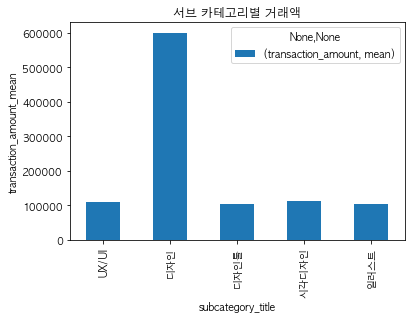

In [74]:
mean_ta_design_df = design_df.groupby('subcategory_title').agg(transaction_mean) 
mean_ta_design_df.plot(kind = 'bar' ) #시각화
plt.title("서브 카테고리별 거래액")
plt.xlabel("subcategory_title")
plt.ylabel("transaction_amount_mean") #기존에 Nan값이었던 디자인의 거래액이 가장 높음. 나머지는 비슷비슷

디자인 카테고리의 서브카테고리 별로 거래액 평균의 분포를 확인했습니다.

기존의 Nan인 디자인 서브카테고리의 평균 거래액이 높음을 확인했습니다.

##  '디자인' subcategory (기존의 Nan) 분석

In [75]:
sub_design_mask = design_df['subcategory_title'] == '디자인'
design_df[sub_design_mask]

id  customer_id  course_id     type      state  \
105055  1358339     668028.0        NaN  PAYMENT  COMPLETED   
28008   1359501     279518.0        NaN  PAYMENT  COMPLETED   
30529   1356395     382725.0        NaN  PAYMENT  COMPLETED   
93034   1360305     611620.0        NaN   REFUND  COMPLETED   
93033   1356745     611620.0        NaN  PAYMENT  COMPLETED   
26929   1359861     271988.0        NaN  PAYMENT  COMPLETED   
100002  1363264     642002.0        NaN   REFUND  COMPLETED   
71379   1364956     545804.0        NaN  PAYMENT  COMPLETED   
9861    1360973      55069.0        NaN   REFUND  COMPLETED   

                               course_title category_title format  \
105055     프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스)            디자인    올인원   
28008   프로모션 : 게임 디자인 맥북 air 패스(9월 현물 프리패스)            디자인    올인원   
30529      프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스)            디자인    올인원   
93034      프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스)            디자인    올인원   
93033      프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스)            디자인    올인원   
26929      프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스)            디자인    올인원   
100002     프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스)            디자인    올인원   
71379      프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스)            디자인    올인원   
9861       프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스)            디자인    올인원   

               completed_at  transaction_amount coupon_title  \
105055  2021-09-22 10:50:48             1800000          NaN   
28008   2021-09-22 21:54:03             1400000          NaN   
30529   2021-09-20 18:56:54             1800000          NaN   
93034   2021-09-23 10:31:01            -1800000          NaN   
93033   2021-09-20 23:45:52             1800000          NaN   
26929   2021-09-22 23:53:03             1400000          NaN   
100002  2021-09-24 10:57:42            -1400000          NaN   
71379   2021-09-25 13:25:49             1800000          NaN   
9861    2021-09-23 14:52:48            -1400000          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
105055                     NaN   1800000.0         295200.0  INICIS   CARD   
28008                      NaN   1400000.0         251600.0  INICIS   CARD   
30529                      NaN   1800000.0         295200.0   NAVER   CARD   
93034                      NaN   1800000.0         295200.0  INICIS   CARD   
93033                      NaN   1800000.0         295200.0  INICIS   CARD   
26929                      NaN   1400000.0         251600.0  INICIS   CARD   
100002                     NaN   1400000.0         251600.0  INICIS   CARD   
71379                      NaN   1800000.0         295200.0  INICIS   CARD   
9861                       NaN   1400000.0         251600.0  INICIS   CARD   

       subcategory_title marketing_start_at  
105055               디자인                NaN  
28008                디자인                NaN  
30529                디자인                NaN  
93034                디자인                NaN  
93033                디자인                NaN  
26929                디자인                NaN  
100002               디자인                NaN  
71379                디자인                NaN  
9861                 디자인                NaN

 ### course_title이 모두 '프로모션 9월 현물 프리패스' 이 프리패스에는 맥북 가격이 반영되있 거래액이 높다고 결론을 내릴 수 있습니다. 

## subcategory 'UX/UI' 환불율 분석

In [76]:
design = refund_data('디자인') 

디자인 카테고리 인스턴스 호출

In [77]:
design.sub_category('UX/UI') 

id  customer_id  course_id     type      state  \
76417  1145951     559669.0   205187.0  PAYMENT  COMPLETED   
76706  1140424     560293.0   203523.0  PAYMENT  COMPLETED   
22371  1006677     155172.0   203523.0  PAYMENT  COMPLETED   
74580  1205518     553541.0   204068.0  PAYMENT  COMPLETED   
20960   985703     142646.0   203523.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
71955  1153801     546847.0   205187.0  PAYMENT  COMPLETED   
11646  1153813      68008.0   205187.0  PAYMENT  COMPLETED   
72689  1113342     547960.0   203523.0  PAYMENT  COMPLETED   
83946  1180298     578618.0   203523.0  PAYMENT  COMPLETED   
72668  1113205     547932.0   203523.0  PAYMENT  COMPLETED   

                                            course_title category_title  \
76417  올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube ...            디자인   
76706                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
22371                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
74580                         올인원 패키지 : 마디아의 UX/UI 포트폴리오            디자인   
20960                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
...                                                  ...            ...   
71955  올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube ...            디자인   
11646  올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube ...            디자인   
72689                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
83946                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
72668                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   

      format         completed_at  transaction_amount  \
76417    올인원  2021-06-16 21:48:28               99000   
76706    올인원  2021-06-13 23:15:16              169000   
22371    올인원  2021-04-12 14:48:53              157700   
74580    올인원  2021-07-09 11:03:12               28000   
20960    올인원  2021-04-01 17:22:26              166000   
...      ...                  ...                 ...   
71955    올인원  2021-06-20 22:44:36               99000   
11646    올인원  2021-06-20 22:46:59               99000   
72689    올인원  2021-05-31 22:48:55              138000   
83946    올인원  2021-06-30 18:09:41              169000   
72668    올인원  2021-05-31 22:34:57              138000   

                   coupon_title  coupon_discount_amount  sale_price  \
76417                       NaN                     NaN     99000.0   
76706                       NaN                     NaN    169000.0   
22371   ?즉시할인 쿠폰 코드 : april5% ?                  8300.0    166000.0   
74580           6월 반값특가 프로모션 쿠폰                 75000.0    103000.0   
20960                       NaN                     NaN    166000.0   
...                         ...                     ...         ...   
71955                       NaN                     NaN     99000.0   
11646                       NaN                     NaN     99000.0   
72689  [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰                 30000.0    168000.0   
83946                       NaN                     NaN    169000.0   
72668  [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰                 30000.0    168000.0   

       tax_free_amount      pg method subcategory_title  marketing_start_at  
76417          99000.0  INICIS   CARD             UX/UI  2021-06-09 0:00:00  
76706         169000.0  INICIS   CARD             UX/UI  2020-12-18 0:00:00  
22371         166000.0  INICIS   CARD             UX/UI  2020-12-18 0:00:00  
74580         103000.0   KAKAO  POINT             UX/UI  2021-03-11 0:00:00  
20960         166000.0     NaN   CARD             UX/UI  2020-12-18 0:00:00  
...                ...     ...    ...               ...                 ...  
71955          99000.0   KAKAO   CARD             UX/UI  2021-06-09 0:00:00  
11646          99000.0  INICIS   CARD             UX/UI  2021-06-09 0:00:00  
72689         168000.0  INICIS   CARD             UX/UI  2020-12-18 0:00:00  
83946         169000.0  INICIS   CARD           

subcategory가 UX/UI 것들만 출력하는 메소드 호출

In [78]:
design.refund('UX/UI')

id  customer_id  course_id    type      state  \
103593  1339769     659251.0   205187.0  REFUND  COMPLETED   
83147   1199584     576844.0   203523.0  REFUND  COMPLETED   
20836   1101021     141467.0   204068.0  REFUND  COMPLETED   
104107  1360472     661728.0   203523.0  REFUND  COMPLETED   
20593    995899     138675.0   204068.0  REFUND  COMPLETED   
...         ...          ...        ...     ...        ...   
103091  1335433     655999.0   204068.0  REFUND  COMPLETED   
72291   1114654     547367.0   203523.0  REFUND  COMPLETED   
6355    1171561      34842.0   204068.0  REFUND  COMPLETED   
84142   1186240     578952.0   205187.0  REFUND  COMPLETED   
72732   1115441     548013.0   204068.0  REFUND  COMPLETED   

                                             course_title category_title  \
103593  올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube ...            디자인   
83147                         초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
20836                          올인원 패키지 : 마디아의 UX/UI 포트폴리오            디자인   
104107                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
20593                          올인원 패키지 : 마디아의 UX/UI 포트폴리오            디자인   
...                                                   ...            ...   
103091                         올인원 패키지 : 마디아의 UX/UI 포트폴리오            디자인   
72291                         초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
6355                           올인원 패키지 : 마디아의 UX/UI 포트폴리오            디자인   
84142   올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube ...            디자인   
72732                          올인원 패키지 : 마디아의 UX/UI 포트폴리오            디자인   

       format         completed_at  transaction_amount coupon_title  \
103593    올인원  2021-09-10 15:25:17             -210000          NaN   
83147     올인원  2021-07-07 11:23:02             -169000          NaN   
20836     올인원  2021-05-27 10:17:06             -101000          NaN   
104107    올인원  2021-09-23 11:40:40             -156000          NaN   
20593     올인원  2021-04-07 10:47:40             -100000          NaN   
...       ...                  ...                 ...          ...   
103091    올인원  2021-09-08 10:06:05             -133000          NaN   
72291     올인원  2021-06-01 11:02:33             -138000          NaN   
6355      올인원  2021-06-28 13:37:58              -59708          NaN   
84142     올인원  2021-07-01 15:42:32              -99000          NaN   
72732     올인원  2021-06-01 18:31:01              -81000          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
103593                     NaN    210000.0         210000.0  INICIS   CARD   
83147                      NaN    169000.0         169000.0  INICIS   CARD   
20836                      NaN    101000.0         101000.0  INICIS   CARD   
104107                     NaN    176000.0         176000.0   PAYCO   CARD   
20593                      NaN    100000.0         100000.0     NaN   CARD   
...                        ...         ...              ...     ...    ...   
103091                     NaN    143000.0         143000.0  INICIS   CARD   
72291                      NaN    168000.0         168000.0   KAKAO   CARD   
6355                       NaN    102000.0         102000.0  INICIS   CARD   
84142                      NaN     99000.0          99000.0   NAVER   CARD   
72732                      NaN    101000.0         101000.0  INICIS   CARD   

       subcategory_title  marketing_start_at  
103593             UX/UI  2021-06-09 0:00:00  
83147              UX/UI  2020-12-18 0:00:00  
20836              UX/UI  2021-03-11 0:00:00  
104107             UX/UI  2020-12-18 0:00:00  
20593              UX/UI  2021-03-11 0:00:00  
...                  ...                 ...  
103091             UX/UI  2021-03-11 0:00:00  
72291              UX/UI  2020-12-18 0:00:00  
6355               UX/UI  2021-03-11 0:00:00  
84142              UX/UI  2021-06-09 0:00:00  
72732              UX/UI  2021-03-11 0:00:00  



UX/UI 중에서 환불인 자료 출력하는 메소드 호출

In [79]:
design.pair_refund('UX/UI')

id  customer_id  course_id     type      state  \
2278    1045473      14507.0   202566.0  PAYMENT  COMPLETED   
3323    1146778      19870.0   205187.0  PAYMENT  COMPLETED   
5400    1184097      29942.0   203100.0  PAYMENT  COMPLETED   
5398    1184062      29942.0   202725.0  PAYMENT  COMPLETED   
5748    1044394      31353.0   203523.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
103592  1339720     659251.0   205187.0  PAYMENT  COMPLETED   
103594  1339783     659251.0   205187.0  PAYMENT  COMPLETED   
104010  1344354     661218.0   203776.0  PAYMENT  COMPLETED   
104106  1350822     661728.0   203523.0  PAYMENT  COMPLETED   
104243  1346676     662544.0   203523.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
2278                    올인원 패키지 : 스케치&피그마를 활용한 모바일 UI 디자인            디자인   
3323    올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube ...            디자인   
5400            올인원 패키지 : 성공적인 UX를 위한 유저 리서치 by 카카오페이 리서처            디자인   
5398                      올인원 패키지 : Data Driven UX Design            디자인   
5748                          초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
...                                                   ...            ...   
103592  올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube ...            디자인   
103594  올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube ...            디자인   
104010                         올인원 패키지 : UX/UI 디자인 (2020)            디자인   
104106                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   
104243                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인            디자인   

       format         completed_at  transaction_amount  \
2278      올인원  2021-04-30 22:15:19              102000   
3323      올인원  2021-06-17 12:18:57               99000   
5400      올인원  2021-06-30 23:34:54              164000   
5398      올인원  2021-06-30 23:33:23              182000   
5748      올인원  2021-04-30 19:12:52              166000   
...       ...                  ...                 ...   
103592    올인원  2021-09-10 15:14:53              210000   
103594    올인원  2021-09-10 15:31:16              190000   
104010    올인원  2021-09-13 12:49:06              177000   
104106    올인원  2021-09-16 23:01:21              156000   
104243    올인원  2021-09-14 22:02:38              156000   

                    coupon_title  coupon_discount_amount  sale_price  \
2278    [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    122000.0   
3323                         NaN                     NaN     99000.0   
5400                         NaN                     NaN    164000.0   
5398                         NaN                     NaN    182000.0   
5748                         NaN                     NaN    166000.0   
...                          ...                     ...         ...   
103592                       NaN                     NaN    210000.0   
103594   [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    210000.0   
104010   [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    197000.0   
104106   [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    176000.0   
104243   [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    176000.0   

        tax_free_amount      pg method subcategory_title  marketing_start_at  
2278           122000.0  INICIS  VBANK             UX/UI  2020-05-04 0:00:00  
3323            99000.0  INICIS   CARD             UX/UI  2021-06-09 0:00:00  
5400           164000.0  INICIS   CARD             UX/UI  2020-09-29 0:00:00  
5398           182000.0  INICIS   CARD             UX/UI  2020-06-22 0:00:00  
5748           166000.0  INICIS   CARD             UX/UI  2020-12-18 0:00:00  
...                 ...     ...    ...               ...                 ...  
103592         210000.0  INICIS   CARD             UX/UI  2021-06-09 0:00:00  
103594         210000.0  INICIS   CARD             UX/UI  2021-06-09 0:00:00  
104010         197000.0   PAYCO   CARD             UX/UI  2020-12-04 0

PAYMENT & REFUND pair로 존재하는 자료 출력하는 메소드 호출

In [80]:
design.refund_ratio('UX/UI')

5.42

### UX/UI의 환불율은 5.42%입니다.

## subcategory '디자인툴' 환불율 분석

In [81]:
design.sub_category('디자인툴') 

id  customer_id  course_id     type      state  \
21918   1036618     151513.0   204286.0  PAYMENT  COMPLETED   
47678   1077411     490629.0   203787.0  PAYMENT  COMPLETED   
23949   1076848     169036.0   203787.0  PAYMENT  COMPLETED   
21838   1326005     150783.0   203328.0  PAYMENT  COMPLETED   
49353    990366     493683.0   203787.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
18434   1280624     121355.0   205440.0  PAYMENT  COMPLETED   
72680   1113440     547942.0   203328.0  PAYMENT  COMPLETED   
72695   1114174     547976.0   203787.0  PAYMENT  COMPLETED   
102060  1343080     650667.0   203787.0  PAYMENT  COMPLETED   
67980   1089821     538048.0   203787.0  PAYMENT  COMPLETED   

                       course_title category_title format  \
21918    초격차 패키지 : 한번에 끝내는 3D 디자인 툴            디자인    올인원   
47678       초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
23949       초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
21838   올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵            디자인    올인원   
49353       초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
...                             ...            ...    ...   
18434     초격차 패키지 : 한 번에 끝내는 포토샵 활용            디자인    올인원   
72680   올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵            디자인    올인원   
72695       초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
102060      초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
67980       초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   

               completed_at  transaction_amount              coupon_title  \
21918   2021-04-28 18:00:07              219000                       NaN   
47678   2021-05-17 10:09:42              144000  [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰   
23949   2021-05-16 23:32:18              174000                       NaN   
21838    2021-09-03 0:39:54              103000                       NaN   
49353   2021-04-04 10:22:39              142000  [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰   
...                     ...                 ...                       ...   
18434   2021-08-12 12:06:35              149500                       NaN   
72680   2021-05-31 22:56:41               81600  [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰   
72695   2021-05-31 23:53:40              154000  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
102060  2021-09-12 18:55:37              179000   [미래투자금] 온라인 강의 2만원 할인쿠폰   
67980   2021-05-22 18:46:29              144000  [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
21918                      NaN    219000.0         219000.0  INICIS   CARD   
47678                  30000.0    174000.0         174000.0  INICIS   CARD   
23949                      NaN    174000.0         174000.0   KAKAO   CARD   
21838                      NaN    103000.0         103000.0  INICIS   CARD   
49353                  30000.0    172000.0         172000.0     NaN   CARD   
...                        ...         ...              ...     ...    ...   
18434                      NaN    149500.0         149500.0  INICIS  TRANS   
72680                  10000.0     91600.0          91600.0  INICIS   CARD   
72695                  20000.0    174000.0         174000.0  INICIS   CARD   
102060                 20000.0    199000.0         199000.0  INICIS   CARD   
67980                  30000.0    174000.0         174000.0   KAKAO  POINT   

       subcategory_title   marketing_start_at  
21918               디자인툴   2021-04-23 0:00:00  
47678               디자인툴  2020-12-24 11:00:00  
23949               디자인툴  2020-12-24 11:00:00  
21838               디자인툴   2020-10-23 0:00:00  
49353               디자인툴  2020-12-24 11:00:00  
...                  ...                  ...  
18434               디자인툴   2021-06-25 0:00:00  
72680               디자인툴   2020-10-23 0:00:00  
72695               디자인툴  2020-12-24 11:00:00  
102060              디자인툴  2020-12-24 11:00:00  
67980               디자인툴  2020-12-24 11:00:00  

[2035 rows x 18 columns]

In [82]:
design.refund('디자인툴')

id  customer_id  course_id    type      state  \
44191   994315     483333.0   203787.0  REFUND  COMPLETED   
92104  1281195     608087.0   204207.0  REFUND  COMPLETED   
98096  1292581     633773.0   202523.0  REFUND  COMPLETED   
75116  1197736     555082.0   203787.0  REFUND  COMPLETED   
5183   1120756      28709.0   203787.0  REFUND  COMPLETED   
...        ...          ...        ...     ...        ...   
90043  1229283     600648.0   204207.0  REFUND  COMPLETED   
54730  1035311     506930.0   203787.0  REFUND  COMPLETED   
72640  1116268     547906.0   204286.0  REFUND  COMPLETED   
65822  1080544     531790.0   203787.0  REFUND  COMPLETED   
18422  1273494     121285.0   203787.0  REFUND  COMPLETED   

                         course_title category_title format  \
44191         초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
92104  초격차 패키지 : 확실하게 끝내는 포토샵&일러스트레이터            디자인    올인원   
98096       올인원 패키지 : 사진 촬영 및 라이트룸 보정            디자인    올인원   
75116         초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
5183          초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
...                               ...            ...    ...   
90043  초격차 패키지 : 확실하게 끝내는 포토샵&일러스트레이터            디자인    올인원   
54730         초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
72640      초격차 패키지 : 한번에 끝내는 3D 디자인 툴            디자인    올인원   
65822         초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   
18422         초격차 패키지 : 한번에 끝내는 디자인 툴            디자인    올인원   

              completed_at  transaction_amount coupon_title  \
44191  2021-04-06 11:31:45             -172000          NaN   
92104  2021-08-12 15:48:44             -100500          NaN   
98096  2021-08-17 15:37:27             -108000          NaN   
75116  2021-07-06 16:20:34             -178000          NaN   
5183   2021-06-04 17:14:59             -174000          NaN   
...                    ...                 ...          ...   
90043  2021-07-20 15:07:11             -100000          NaN   
54730  2021-04-28 10:40:01             -142000          NaN   
72640  2021-06-02 10:28:42             -219000          NaN   
65822  2021-05-18 15:40:56             -144000          NaN   
18422  2021-08-09 13:43:37             -180000          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
44191                     NaN    172000.0         172000.0     NaN  VBANK   
92104                     NaN    120500.0         120500.0   NAVER   CARD   
98096                     NaN    128000.0         128000.0  INICIS  VBANK   
75116                     NaN    178000.0         178000.0  INICIS   CARD   
5183                      NaN    174000.0         174000.0  INICIS   CARD   
...                       ...         ...              ...     ...    ...   
90043                     NaN    120000.0         120000.0  INICIS   CARD   
54730                     NaN    172000.0         172000.0  INICIS  VBANK   
72640                     NaN    219000.0         219000.0  INICIS   CARD   
65822                     NaN    174000.0         174000.0  INICIS   CARD   
18422                     NaN    180000.0         180000.0   NAVER  TRANS   

      subcategory_title   marketing_start_at  
44191              디자인툴  2020-12-24 11:00:00  
92104              디자인툴   2021-04-29 0:00:00  
98096              디자인툴   2020-04-17 0:00:00  
75116              디자인툴  2020-12-24 11:00:00  
5183               디자인툴  2020-12-24 11:00:00  
...                 ...                  ...  
90043              디자인툴   2021-04-29 0:00:00  
54730              디자인툴  2020-12-24 11:00:00  
72640              디자인툴   2021-04-23 0:00:00  
65822              디자인툴  2020-12-24 11:00:00  
18422              디자인툴  2020-12-24 11:00:00  

[133 rows x 18 columns]

In [83]:
design.pair_refund('디자인툴')

id  customer_id  course_id     type      state  \
8544    1074100      46957.0   204286.0  PAYMENT  COMPLETED   
9810    1133233      54717.0   202523.0  PAYMENT  COMPLETED   
9809    1133229      54717.0   203328.0  PAYMENT  COMPLETED   
9806    1075622      54717.0   203328.0  PAYMENT  COMPLETED   
9804    1075614      54717.0   202523.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
101732  1318209     649591.0   204286.0  PAYMENT  COMPLETED   
102439  1324882     652398.0   203328.0  PAYMENT  COMPLETED   
102511  1325402     652816.0   205819.0  PAYMENT  COMPLETED   
103440  1337510     658169.0   204286.0  PAYMENT  COMPLETED   
104728  1352902     665446.0   204207.0  PAYMENT  COMPLETED   

                          course_title category_title format  \
8544        초격차 패키지 : 한번에 끝내는 3D 디자인 툴            디자인    올인원   
9810         올인원 패키지 : 사진 촬영 및 라이트룸 보정            디자인    올인원   
9809       올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵            디자인    올인원   
9806       올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵            디자인    올인원   
9804         올인원 패키지 : 사진 촬영 및 라이트룸 보정            디자인    올인원   
...                                ...            ...    ...   
101732      초격차 패키지 : 한번에 끝내는 3D 디자인 툴            디자인    올인원   
102439     올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵            디자인    올인원   
102511   초격차 패키지 : 한 번에 끝내는 일러스트레이터 활용            디자인    올인원   
103440      초격차 패키지 : 한번에 끝내는 3D 디자인 툴            디자인    올인원   
104728  초격차 패키지 : 확실하게 끝내는 포토샵&일러스트레이터            디자인    올인원   

               completed_at  transaction_amount               coupon_title  \
8544    2021-05-15 22:54:57              219000                        NaN   
9810    2021-06-10 22:45:36               15000             5월 페이백 프로모션 쿠폰   
9809    2021-06-10 22:43:57                   0             5월 페이백 프로모션 쿠폰   
9806    2021-05-16 18:40:00               91600                        NaN   
9804    2021-05-16 18:35:43              123500                        NaN   
...                     ...                 ...                        ...   
101732  2021-08-31 13:55:48              192000  [WELCOME] 온라인 강의 3만원 할인쿠폰   
102439  2021-09-02 12:36:23               93000    [미래투자금] 온라인 강의 1만원 할인쿠폰   
102511  2021-09-02 17:36:32              139000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
103440  2021-09-09 14:02:14              212000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
104728  2021-09-17 19:50:39              125500                        NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg  \
8544                       NaN    219000.0         219000.0  INICIS   
9810                  110000.0    125000.0         125000.0  INICIS   
9809                  100000.0     93600.0          93600.0     NaN   
9806                       NaN     91600.0          91600.0  INICIS   
9804                       NaN    123500.0         123500.0  INICIS   
...                        ...         ...              ...     ...   
101732                 30000.0    222000.0         222000.0  INICIS   
102439                 10000.0    103000.0         103000.0  INICIS   
102511                 20000.0    159000.0         159000.0   KAKAO   
103440                 20000.0    232000.0         232000.0   KAKAO   
104728                     NaN    125500.0         125500.0   KAKAO   

           method subcategory_title  marketing_start_at  
8544         CARD              디자인툴  2021-04-23 0:00:00  
9810         CARD              디자인툴  2020-04-17 0:00:00  
9809    PROMOTION              디자인툴  2020-10-23 0:00:00  
9806         CARD              디자인툴  2020-10-23 0:00:00  
9804         CARD              디자인툴  2020-04-17 0:00:00  
...           ...               ...                 ...  
101732       CARD              디자인툴  2021-04-23 0:00:00  
102439       CARD              디자인툴  2020-10-23 0:00:00  
102511      POINT              디자인툴  2021-08-09 0:00:00  
103440      POINT              디자인툴  2021-04-23 0:00:00  
104728      POINT              디자인툴  2021-04-29 0:00:00  



In [84]:
design.refund_ratio('디자인툴')

4.76

### 디자인툴 환불율은 4.76% 입니다.

## subcategory '시각디자인' 환불율 분석 

In [85]:
design.sub_category('시각디자인')

id  customer_id  course_id     type      state  \
97935   1335526     633411.0   204013.0  PAYMENT  COMPLETED   
103760  1342068     660113.0   206511.0  PAYMENT  COMPLETED   
49133   1295188     493346.0   202418.0  PAYMENT  COMPLETED   
23995    974436     169234.0   204013.0  PAYMENT  COMPLETED   
76419   1139731     559687.0   204013.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
11320   1290699      65665.0   206023.0  PAYMENT  COMPLETED   
103204  1334142     656636.0   202418.0  PAYMENT  COMPLETED   
9964    1045782      55881.0   202418.0  PAYMENT  COMPLETED   
103016  1330968     655642.0   206023.0  PAYMENT  COMPLETED   
18413   1113239     121275.0   204013.0  PAYMENT  COMPLETED   

                                       course_title category_title format  \
97935                       올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원   
103760                   올인원 패키지 : 시선을 사로잡는 브랜드 디자인            디자인    올인원   
49133                       올인원 패키지 : 타이포그래피와 편집디자인            디자인    올인원   
23995                       올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원   
76419                       올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원   
...                                             ...            ...    ...   
11320   올인원 패키지 : 디자인의 차이를 만드는 서체 활용법 by 산돌 서체 디자이너            디자인    올인원   
103204                      올인원 패키지 : 타이포그래피와 편집디자인            디자인    올인원   
9964                        올인원 패키지 : 타이포그래피와 편집디자인            디자인    올인원   
103016  올인원 패키지 : 디자인의 차이를 만드는 서체 활용법 by 산돌 서체 디자이너            디자인    올인원   
18413                       올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원   

               completed_at  transaction_amount              coupon_title  \
97935   2021-09-08 11:05:07               45000            8월 1+1 프로모션 쿠폰   
103760  2021-09-11 22:01:35              140000   [미래투자금] 온라인 강의 2만원 할인쿠폰   
49133   2021-08-18 20:55:37              130000                       NaN   
23995   2021-03-29 18:19:30              159000             [럭키룰렛] 올인원패키지   
76419   2021-06-13 18:13:57              172000                       NaN   
...                     ...                 ...                       ...   
11320   2021-08-16 21:45:14              104300  [시크릿쿠폰] 산돌 런칭기념 30% 할인쿠폰   
103204  2021-09-07 15:26:45              125000   [미래투자금] 온라인 강의 1만원 할인쿠폰   
9964    2021-04-30 22:41:23               12000         4월 1+1 페이백 이벤트 쿠폰   
103016  2021-09-06 14:04:24              139000   [미래투자금] 온라인 강의 2만원 할인쿠폰   
18413   2021-05-31 22:38:28              171000                       NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
97935                 139000.0    184000.0         184000.0  INICIS   CARD   
103760                 20000.0    160000.0         160000.0  INICIS   CARD   
49133                      NaN    130000.0         130000.0  INICIS   CARD   
23995                  10000.0    169000.0         169000.0     NaN   CARD   
76419                      NaN    172000.0         172000.0   PAYCO   CARD   
...                        ...         ...              ...     ...    ...   
11320                  44700.0    149000.0         149000.0  INICIS   CARD   
103204                 10000.0    135000.0         135000.0   NAVER   CARD   
9964                  110000.0    122000.0         122000.0  INICIS   CARD   
103016                 20000.0    159000.0         159000.0  INICIS   CARD   
18413                      NaN    171000.0         171000.0  INICIS   CARD   

       subcategory_title  marketing_start_at  
97935              시각디자인  2021-03-16 0:00:00  
103760             시각디자인  2021-08-16 0:00:00  
49133              시각디자인  2020-03-18 0:00:00  
23995              시각디자인  2021-03-16 0:00:00  
76419              시각디자인  2021-03-16 0:00:00  
...                  ...                 ...  
11320              시각디자인  2021-08-09 0:00:00  
103204             시각디자인  2020-03-18 0:00:00  
9964               시각디자인  2020-03-18 0:00:00  

In [86]:
design.refund('시각디자인')

id  customer_id  course_id    type      state  \
44272    987002     483482.0   204013.0  REFUND  COMPLETED   
77045   1157441     561058.0   204013.0  REFUND  COMPLETED   
49765   1008390     494170.0   204013.0  REFUND  COMPLETED   
92188   1243078     608293.0   204013.0  REFUND  COMPLETED   
92195   1360732     608310.0   206023.0  REFUND  COMPLETED   
45565    993016     486086.0   202418.0  REFUND  COMPLETED   
46078    993436     486985.0   204013.0  REFUND  COMPLETED   
45933    997938     486825.0   204013.0  REFUND  COMPLETED   
46606    994378     488145.0   204013.0  REFUND  COMPLETED   
45339    998379     485705.0   204013.0  REFUND  COMPLETED   
29034   1281030     287593.0   204013.0  REFUND  COMPLETED   
36378   1273575     443538.0   204013.0  REFUND  COMPLETED   
36789   1244865     447282.0   204013.0  REFUND  COMPLETED   
104897  1360783     666751.0   204013.0  REFUND  COMPLETED   
36635   1020809     445871.0   204013.0  REFUND  COMPLETED   
80943   1291990     571815.0   204013.0  REFUND  COMPLETED   
34624   1266251     427728.0   202418.0  REFUND  COMPLETED   
94875   1266760     619437.0   204013.0  REFUND  COMPLETED   
41455    993125     477967.0   204013.0  REFUND  COMPLETED   
41115    994194     476282.0   204013.0  REFUND  COMPLETED   
43526   1020977     482151.0   202418.0  REFUND  COMPLETED   
42537   1326324     480376.0   206511.0  REFUND  COMPLETED   
38095    974458     458228.0   202418.0  REFUND  COMPLETED   
37951   1244678     457500.0   204013.0  REFUND  COMPLETED   
39905    980094     468300.0   202418.0  REFUND  COMPLETED   
7516     980021      40919.0   204013.0  REFUND  COMPLETED   
86964   1212044     590099.0   204013.0  REFUND  COMPLETED   
56727   1062024     512393.0   204013.0  REFUND  COMPLETED   
16387   1295859     104795.0   204013.0  REFUND  COMPLETED   
99983   1303921     641843.0   206511.0  REFUND  COMPLETED   
55433   1052132     508526.0   204013.0  REFUND  COMPLETED   
99546   1330847     639900.0   204013.0  REFUND  COMPLETED   
64861   1077826     530248.0   204013.0  REFUND  COMPLETED   
7263    1234796      40104.0   202418.0  REFUND  COMPLETED   
60884   1101069     522432.0   204013.0  REFUND  COMPLETED   
87498   1212277     592002.0   204013.0  REFUND  COMPLETED   
69827   1116657     542522.0   204013.0  REFUND  COMPLETED   
62113   1064416     524517.0   204013.0  REFUND  COMPLETED   
100757  1315548     645598.0   204013.0  REFUND  COMPLETED   
85062   1197645     582006.0   204013.0  REFUND  COMPLETED   
69885   1114866     542622.0   204013.0  REFUND  COMPLETED   
102647  1330360     653611.0   204013.0  REFUND  COMPLETED   
70372   1115232     543693.0   204013.0  REFUND  COMPLETED   
12929    985417      77382.0   204013.0  REFUND  COMPLETED   
102252  1330460     651356.0   204013.0  REFUND  COMPLETED   
70280   1194908     543373.0   204013.0  REFUND  COMPLETED   
73166   1237444     549392.0   204013.0  REFUND  COMPLETED   
66229   1084052     532964.0   204013.0  REFUND  COMPLETED   
10215   1114877      57108.0   204013.0  REFUND  COMPLETED   
72815   1114685     548088.0   202418.0  REFUND  COMPLETED   
101547  1363576     648937.0   204013.0  REFUND  COMPLETED   
51209   1302412     497619.0   206511.0  REFUND  COMPLETED   
51178   1011390     497559.0   204013.0  REFUND  COMPLETED   
18223   1013053     119884.0   204013.0  REFUND  COMPLETED   
54351   1033223     505829.0   204013.0  REFUND  COMPLETED   
53505   1225752     503364.0   204013.0  REFUND  COMPLETED   
67738   1115230     537359.0   204013.0  REFUND  COMPLETED   
99367   1298831     639076.0   206511.0  REFUND  COMPLETED   

                                       course_title category_title format  \
44272                       올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원   
77045                       올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원   
49765                       올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원   
92188                       올인원 패키지 : 완전정복 시각디

In [87]:
design.pair_refund('시각디자인')

id  customer_id  course_id     type      state  \
7262    1168934      40104.0   202418.0  PAYMENT  COMPLETED   
10214   1111398      57108.0   204013.0  PAYMENT  COMPLETED   
16386   1293359     104795.0   204013.0  PAYMENT  COMPLETED   
29033   1280932     287593.0   204013.0  PAYMENT  COMPLETED   
34622   1262331     427728.0   202418.0  PAYMENT  COMPLETED   
36374   1270728     443538.0   204013.0  PAYMENT  COMPLETED   
36636   1020861     445871.0   204013.0  PAYMENT  COMPLETED   
38094    972447     458228.0   202418.0  PAYMENT  COMPLETED   
41114    971579     476282.0   204013.0  PAYMENT  COMPLETED   
41451    991992     477967.0   204013.0  PAYMENT  COMPLETED   
41460    995019     477967.0   204013.0  PAYMENT  COMPLETED   
41457    993426     477967.0   204013.0  PAYMENT  COMPLETED   
41447    974705     477967.0   204013.0  PAYMENT  COMPLETED   
43529   1021036     482151.0   204013.0  PAYMENT  COMPLETED   
45932    991391     486825.0   204013.0  PAYMENT  COMPLETED   
46077    991958     486985.0   202418.0  PAYMENT  COMPLETED   
46076    991941     486985.0   204013.0  PAYMENT  COMPLETED   
46605    994138     488145.0   204013.0  PAYMENT  COMPLETED   
49764   1005763     494170.0   204013.0  PAYMENT  COMPLETED   
51177   1011307     497559.0   204013.0  PAYMENT  COMPLETED   
56726   1043582     512393.0   204013.0  PAYMENT  COMPLETED   
64862   1191971     530248.0   204013.0  PAYMENT  COMPLETED   
64860   1074234     530248.0   204013.0  PAYMENT  COMPLETED   
66228   1081933     532964.0   204013.0  PAYMENT  COMPLETED   
69883   1109645     542622.0   204013.0  PAYMENT  COMPLETED   
70278   1171131     543373.0   204013.0  PAYMENT  COMPLETED   
72814   1114216     548088.0   202418.0  PAYMENT  COMPLETED   
77044   1142089     561058.0   204013.0  PAYMENT  COMPLETED   
80942   1289884     571815.0   204013.0  PAYMENT  COMPLETED   
86961   1208459     590099.0   204013.0  PAYMENT  COMPLETED   
92187   1241128     608293.0   204013.0  PAYMENT  COMPLETED   
92194   1343439     608310.0   206511.0  PAYMENT  COMPLETED   
94874   1260423     619437.0   204013.0  PAYMENT  COMPLETED   
99366   1298767     639076.0   206511.0  PAYMENT  COMPLETED   
99982   1303142     641843.0   206511.0  PAYMENT  COMPLETED   
100758  1315554     645598.0   204013.0  PAYMENT  COMPLETED   
101546  1316118     648937.0   204013.0  PAYMENT  COMPLETED   
102251  1328628     651356.0   204013.0  PAYMENT  COMPLETED   

                      course_title category_title format         completed_at  \
7262       올인원 패키지 : 타이포그래피와 편집디자인            디자인    올인원  2021-06-27 12:36:05   
10214      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-05-31 17:54:59   
16386      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-08-17 21:35:06   
29033      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-08-12 14:33:47   
34622      올인원 패키지 : 타이포그래피와 편집디자인            디자인    올인원  2021-08-03 13:05:59   
36374      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-08-07 23:10:35   
36636      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-04-21 13:59:48   
38094      올인원 패키지 : 타이포그래피와 편집디자인            디자인    올인원   2021-03-29 9:50:08   
41114      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-03-28 22:12:00   
41451      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-04-04 23:15:35   
41460      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-04-06 18:34:48   
41457      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-04-05 17:24:46   
41447      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-03-29 19:22:58   
43529      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-04-21 15:43:59   
45932      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-04-04 21:10:00   
46077      올인원 패키지 : 타이포그래피와 편집디자인            디자인    올인원  2021-04-04 23:11:29   
46076      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원  2021-04-04 23:08:43   
46605      올인원 패키지 : 완전정복 시각디자인 기초            디자인    올인원   2021-04-06 8:33:33   
49764      올인원 패

In [88]:
design.refund_ratio('시각디자인')

3.85

### 시각디자인툴 환불율은 3.85% 입니다.

## subcategory '일러스트' 환불율 분석 

In [89]:
design.sub_category('일러스트')

id  customer_id  course_id     type      state  \
104145  1346692     661971.0   205625.0  PAYMENT  COMPLETED   
3706    1265393      21214.0   204871.0  PAYMENT  COMPLETED   
97959   1330284     633465.0   206181.0  PAYMENT  COMPLETED   
92055   1240624     607955.0   204871.0  PAYMENT  COMPLETED   
98079   1288567     633738.0   204871.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
6413    1307919      35251.0   204871.0  PAYMENT  COMPLETED   
103012  1330793     655615.0   206111.0  PAYMENT  COMPLETED   
103169  1333809     656479.0   204871.0  PAYMENT  COMPLETED   
86469   1203260     587757.0   205625.0  PAYMENT  COMPLETED   
71961   1111143     546861.0   204871.0  PAYMENT  COMPLETED   

                           course_title category_title format  \
104145     초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
3706    올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
97959     올인원 패키지 : 리마의 로맨스판타지 웹소설 일러스트            디자인    올인원   
92055   올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
98079   올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
...                                 ...            ...    ...   
6413    올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
103012   올인원 패키지 : 박담 작가와 함께 남자 캐릭터 드로잉            디자인    올인원   
103169  올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
86469      초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
71961   올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   

               completed_at  transaction_amount               coupon_title  \
104145  2021-09-14 22:09:15              159000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
3706    2021-08-04 20:11:46              154000                        NaN   
97959   2021-09-06 11:04:15               60000             8월 1+1 프로모션 쿠폰   
92055   2021-07-25 14:16:09              129000  [WELCOME] 온라인 강의 2만원 할인쿠폰   
98079   2021-08-15 23:41:19              154000                        NaN   
...                     ...                 ...                        ...   
6413    2021-08-26 14:14:53              154000                        NaN   
103012  2021-09-06 13:17:46              169000                        NaN   
103169  2021-09-07 12:42:48              149000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
86469    2021-07-08 9:23:30              168000                        NaN   
71961   2021-05-31 17:05:15              119000   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
104145                 20000.0    179000.0         179000.0  INICIS   CARD   
3706                       NaN    154000.0         154000.0   KAKAO  POINT   
97959                 124000.0    184000.0         184000.0  INICIS   CARD   
92055                  20000.0    149000.0         149000.0   NAVER  POINT   
98079                      NaN    154000.0         154000.0  INICIS  TRANS   
...                        ...         ...              ...     ...    ...   
6413                       NaN    154000.0         154000.0  INICIS  VBANK   
103012                     NaN    169000.0         169000.0   KAKAO  POINT   
103169                 20000.0    169000.0         169000.0   PAYCO  POINT   
86469                      NaN    168000.0         168000.0   NAVER   CARD   
71961                  20000.0    139000.0         139000.0   KAKAO  POINT   

       subcategory_title  marketing_start_at  
104145              일러스트  2021-06-29 0:00:00  
3706                일러스트  2021-05-25 0:00:00  
97959               일러스트  2021-08-30 0:00:00  
92055               일러스트  2021-05-25 0:00:00  
98079               일러스트  2021-05-25 0:00:00  
...                  ...                 ...  
6413                일러스트  2021-05-25 0:00:00  
103012              일러스트  2021-07-26 0:00:00  
103169              일러스트  2021-05-25 0:00:00  
86469               일러스트  2021-06-29 0:00:00  
71961               일러스트  2021-05-25 0:00:00  

[1701 rows x 18 columns]

In [90]:
design.refund('일러스트')

id  customer_id  course_id    type      state  \
92045  1243005     607926.0   204871.0  REFUND  COMPLETED   
91069  1283309     604274.0   205625.0  REFUND  COMPLETED   
91079  1268291     604322.0   204871.0  REFUND  COMPLETED   
3735   1228642      21355.0   205625.0  REFUND  COMPLETED   
92237  1249048     608425.0   205625.0  REFUND  COMPLETED   
...        ...          ...        ...     ...        ...   
90100  1229847     600802.0   204871.0  REFUND  COMPLETED   
54083  1024621     505106.0   203989.0  REFUND  COMPLETED   
72316  1111694     547391.0   204871.0  REFUND  COMPLETED   
53263  1352790     502751.0   206181.0  REFUND  COMPLETED   
86470  1212004     587757.0   205625.0  REFUND  COMPLETED   

                             course_title category_title format  \
92045     올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
91069        초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
91079     올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
3735         초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
92237        초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
...                                   ...            ...    ...   
90100     올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
54083  올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰            디자인    올인원   
72316     올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   
53263       올인원 패키지 : 리마의 로맨스판타지 웹소설 일러스트            디자인    올인원   
86470        초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   

              completed_at  transaction_amount coupon_title  \
92045  2021-07-26 13:50:09             -129000          NaN   
91069  2021-08-13 12:02:07             -168000          NaN   
91079  2021-08-06 11:46:43             -124000          NaN   
3735   2021-07-20 11:29:31             -168000          NaN   
92237  2021-07-29 11:11:29             -138000          NaN   
...                    ...                 ...          ...   
90100  2021-07-20 17:51:06             -129000          NaN   
54083  2021-04-23 14:25:45              -81000          NaN   
72316  2021-05-31 18:30:34             -119000          NaN   
53263  2021-09-17 18:44:07             -184000          NaN   
86470  2021-07-12 15:31:13             -168000          NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
92045                     NaN    149000.0         149000.0   KAKAO  POINT   
91069                     NaN    168000.0         168000.0   KAKAO  POINT   
91079                     NaN    154000.0         154000.0  INICIS   CARD   
3735                      NaN    168000.0         168000.0   PAYCO   CARD   
92237                     NaN    168000.0         168000.0   KAKAO   CARD   
...                       ...         ...              ...     ...    ...   
90100                     NaN    149000.0         149000.0  INICIS   CARD   
54083                     NaN     91000.0          91000.0  INICIS   CARD   
72316                     NaN    139000.0         139000.0   KAKAO  POINT   
53263                     NaN    184000.0         184000.0   PAYCO   CARD   
86470                     NaN    168000.0         168000.0   NAVER   CARD   

      subcategory_title  marketing_start_at  
92045              일러스트  2021-05-25 0:00:00  
91069              일러스트  2021-06-29 0:00:00  
91079              일러스트  2021-05-25 0:00:00  
3735               일러스트  2021-06-29 0:00:00  
92237              일러스트  2021-06-29 0:00:00  
...                 ...                 ...  
90100              일러스트  2021-05-25 0:00:00  
54083              일러스트  2021-02-19 0:00:00  
72316              일러스트  2021-05-25 0:00:00  
53263              일러스트  2021-08-30 0:00:00  
86470              일러스트  2021-06-29 0:00:00  

[153 rows x 18 columns]

In [91]:
design.pair_refund('일러스트')

id  customer_id  course_id     type      state  \
3208    1273545      19324.0   205625.0  PAYMENT  COMPLETED   
3734    1215549      21355.0   205625.0  PAYMENT  COMPLETED   
5249    1005679      29024.0   203989.0  PAYMENT  COMPLETED   
7935    1223552      43646.0   205625.0  PAYMENT  COMPLETED   
8795    1274525      48098.0   205625.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
102575  1326269     653303.0   206181.0  PAYMENT  COMPLETED   
102782  1328095     654417.0   206181.0  PAYMENT  COMPLETED   
103410  1355348     658035.0   205625.0  PAYMENT  COMPLETED   
104053  1344943     661460.0   206111.0  PAYMENT  COMPLETED   
104993  1356916     667500.0   204871.0  PAYMENT  COMPLETED   

                              course_title category_title format  \
3208          초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
3734          초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
5249    올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰            디자인    올인원   
7935          초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
8795          초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
...                                    ...            ...    ...   
102575       올인원 패키지 : 리마의 로맨스판타지 웹소설 일러스트            디자인    올인원   
102782       올인원 패키지 : 리마의 로맨스판타지 웹소설 일러스트            디자인    올인원   
103410        초격차 패키지 : 세상의 모든 감성 아이패드 드로잉            디자인    올인원   
104053      올인원 패키지 : 박담 작가와 함께 남자 캐릭터 드로잉            디자인    올인원   
104993     올인원 패키지 : star741의 캐주얼 일러스트 드로잉            디자인    올인원   

               completed_at  transaction_amount             coupon_title  \
3208    2021-08-09 14:01:24              177000                      NaN   
3734     2021-07-14 9:06:23              168000                      NaN   
5249    2021-04-11 23:30:05               91000                      NaN   
7935    2021-07-18 13:26:55              168000                      NaN   
8795    2021-08-09 19:56:15                4000      7월 100% 페이백 프로모션 쿠폰   
...                     ...                 ...                      ...   
102575   2021-09-03 9:50:59              159000  [미래투자금] 온라인 강의 2만원 할인쿠폰   
102782  2021-09-04 19:06:17              159000  [미래투자금] 온라인 강의 2만원 할인쿠폰   
103410  2021-09-19 20:54:45              159000  [미래투자금] 온라인 강의 2만원 할인쿠폰   
104053  2021-09-13 19:02:28              149000  [미래투자금] 온라인 강의 2만원 할인쿠폰   
104993   2021-09-21 4:13:13              169000                      NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
3208                       NaN    177000.0         177000.0   KAKAO   CARD   
3734                       NaN    168000.0         168000.0   PAYCO   CARD   
5249                       NaN     91000.0          91000.0  INICIS   CARD   
7935                       NaN    168000.0         168000.0   NAVER   CARD   
8795                  173000.0    177000.0         177000.0   NAVER   CARD   
...                        ...         ...              ...     ...    ...   
102575                 20000.0    179000.0         179000.0  INICIS   CARD   
102782                 20000.0    179000.0         179000.0   NAVER   CARD   
103410                 20000.0    179000.0         179000.0  INICIS   CARD   
104053                 20000.0    169000.0         169000.0  INICIS   CARD   
104993                     NaN    169000.0         169000.0  INICIS   CARD   

       subcategory_title  marketing_start_at  
3208                일러스트  2021-06-29 0:00:00  
3734                일러스트  2021-06-29 0:00:00  
5249                일러스트  2021-02-19 0:00:00  
7935                일러스트  2021-06-29 0:00:00  
8795                일러스트  2021-06-29 0:00:00  
...                  ...                 ...  
102575              일러스트  2021-08-30 0:00:00  
102782              일러스트  2021-08-30 0:00:00  
103410              일러스트  2021-06-29 0:00:00  
104053              일러스트  2021-07-26 0:00:00  
104993              일러스트  2021-05-25 0:00:00  

[96 rows x 18 columns]

In [92]:
design.refund_ratio('일러스트')

5.84

### 일러스트 환불율은 5.84 입니다.

# 마케팅 category 분석

In [93]:
marketing = refund_data('마케팅') 

마케팅 카테고리 인스턴스 호출

In [94]:
cond_marketing = trimmed_df['category_title'] == '마케팅' #마케팅 카테고리의 서브카테고리를 살펴 봅시다.
trimmed_df[cond_marketing]['subcategory_title'].unique() #서브카테고리 value들 살펴봄 

array(['디지털마케팅', '글쓰기/카피라이팅', 'SNS마케팅', nan, '데이터마케팅'], dtype=object)

Nan값들을 기타 프로모션으로 바꾸겠습니다.

## subcategory '기타프로모션' 분석

In [95]:
marketing_df = trimmed_df[cond_marketing] 
null_delete_condition_data_marketing = marketing_df['subcategory_title'].isna() #nan값 확인하는 조건
marketing_df.loc[null_delete_condition_data_marketing , 'subcategory_title'] = '기타프로모션' 

Nan값을 가지는 서브카테고리를 모두 '기타프로모션' 으로 변경하였습니다.

In [96]:
etc_marketing_cond = marketing_df['subcategory_title'] == '기타프로모션'
etc_marketing_df = marketing_df[etc_marketing_cond]
etc_marketing_df

id  customer_id  course_id     type      state  \
32277   991427     402171.0   203996.0  PAYMENT  COMPLETED   
94853  1260185     619365.0        NaN  PAYMENT  COMPLETED   
62169  1119772     524588.0   203996.0  PAYMENT  COMPLETED   
86120  1210977     586199.0        NaN  PAYMENT  COMPLETED   
63056  1140240     526331.0        NaN  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
416     992105       2702.0   203996.0  PAYMENT  COMPLETED   
3884   1006496      22273.0   203996.0  PAYMENT  COMPLETED   
95769  1269090     624364.0        NaN  PAYMENT  COMPLETED   
95780  1270877     624448.0        NaN  PAYMENT  COMPLETED   
27945  1118050     279158.0   203996.0   REFUND  COMPLETED   

                                            course_title category_title  \
32277                                 매주)디지털 마케팅 온라인 완주반            마케팅   
94853    프로모션 : MZ세대를 잡아라! SNS 마케팅 트렌드 평생 PASS (8월 프리패스)            마케팅   
62169                                 매주)디지털 마케팅 온라인 완주반            마케팅   
86120         프로모션 : 풀스택 마케터를 위한 마케팅 BEST PASS (7월 프리패스)            마케팅   
63056   프로모션 : 2+2 MZ세대를 잡아라! SNS 마케팅 트렌드 PASS (6월 프리패스)            마케팅   
...                                                  ...            ...   
416                                   매주)디지털 마케팅 온라인 완주반            마케팅   
3884                                  매주)디지털 마케팅 온라인 완주반            마케팅   
95769  프로모션 : 지금은 마테크가 대세! 매출을 일으키는 마케팅 평생 PASS (8월 프...            마케팅   
95780           프로모션 : 풀스택 마케터를 위한 마케팅 평생 PASS (8월 프리패스)            마케팅   
27945                                 매주)디지털 마케팅 온라인 완주반            마케팅   

        format         completed_at  transaction_amount  \
32277  온라인 완주반  2021-04-04 21:18:55              483200   
94853      올인원  2021-08-02 14:50:35              330000   
62169  온라인 완주반   2021-06-04 7:31:48              583000   
86120      올인원  2021-07-11 23:24:16              299000   
63056      올인원  2021-06-13 22:21:47              220000   
...        ...                  ...                 ...   
416    온라인 완주반  2021-04-04 23:33:47              483200   
3884   온라인 완주반  2021-04-12 13:26:17              468800   
95769      올인원  2021-08-06 17:51:49              330000   
95780      올인원   2021-08-08 1:57:44              330000   
27945  온라인 완주반  2021-06-03 10:31:57             -580000   

                 coupon_title  coupon_discount_amount  sale_price  \
32277  [20% 할인] 완주반 1주년 기념 쿠폰                120800.0    604000.0   
94853                     NaN                     NaN    330000.0   
62169                     NaN                     NaN    583000.0   
86120                     NaN                     NaN    299000.0   
63056                     NaN                     NaN    220000.0   
...                       ...                     ...         ...   
416    [20% 할인] 완주반 1주년 기념 쿠폰                120800.0    604000.0   
3884   [20% 할인] 완주반 1주년 기념 쿠폰                117200.0    586000.0   
95769                     NaN                     NaN    330000.0   
95780                     NaN                     NaN    330000.0   
27945                     NaN                     NaN    580000.0   

       tax_free_amount      pg method subcategory_title  marketing_start_at  
32277         604000.0     NaN   CARD            기타프로모션  2021-01-06 0:00:00  
94853         330000.0  INICIS   CARD            기타프로모션                 NaN  
62169         583000.0  INICIS   CARD            기타프로모션  2021-01-06 0:00:00  
86120         299000.0  INICIS   CARD            기타프로모션                 NaN  
63056         220000.0  INICIS   CARD            기타프로모션                 NaN  
...                ...     ...    ...               ...                 ...  
416           604000.0     NaN   CARD            기타프로모션  2021-01-06 0:00:00  
3884          586000.0  INICIS   CARD            기타프로모션  2021-01-06 0:00:00  
95769         330000.0  INICIS   CARD            기타프로모션                 NaN  
95780         330000.0   KAKAO  POINT           

기타프로모션인 자료 데이터프레임으로 출력

### 기타프로모션 중 온라인완주반의 환급율 분석

In [97]:
online_complete_etc_marketing_cond = etc_marketing_df['format'] == '온라인 완주반'
online_complete_etc_marketing_df = etc_marketing_df[online_complete_etc_marketing_cond]
online_complete_etc_marketing_df

id  customer_id  course_id     type      state  \
32277   991427     402171.0   203996.0  PAYMENT  COMPLETED   
62169  1119772     524588.0   203996.0  PAYMENT  COMPLETED   
34302  1081445     424755.0   203996.0  PAYMENT  COMPLETED   
65158  1077547     530730.0   203996.0   REFUND  COMPLETED   
65157  1075135     530730.0   203996.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
30892  1013048     387066.0   203996.0   REFUND  COMPLETED   
30891  1012985     387066.0   203996.0  PAYMENT  COMPLETED   
416     992105       2702.0   203996.0  PAYMENT  COMPLETED   
3884   1006496      22273.0   203996.0  PAYMENT  COMPLETED   
27945  1118050     279158.0   203996.0   REFUND  COMPLETED   

             course_title category_title   format         completed_at  \
32277  매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-04-04 21:18:55   
62169  매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반   2021-06-04 7:31:48   
34302  매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-05-18 23:47:18   
65158  매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-05-17 11:11:16   
65157  매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-05-16 15:17:44   
...                   ...            ...      ...                  ...   
30892  매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-04-16 13:13:48   
30891  매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-04-16 12:34:28   
416    매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-04-04 23:33:47   
3884   매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-04-12 13:26:17   
27945  매주)디지털 마케팅 온라인 완주반            마케팅  온라인 완주반  2021-06-03 10:31:57   

       transaction_amount              coupon_title  coupon_discount_amount  \
32277              483200    [20% 할인] 완주반 1주년 기념 쿠폰                120800.0   
62169              583000                       NaN                     NaN   
34302              592000                       NaN                     NaN   
65158             -530100                       NaN                     NaN   
65157              530100  [웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰                 58900.0   
...                   ...                       ...                     ...   
30892             -589000                       NaN                     NaN   
30891              589000                       NaN                     NaN   
416                483200    [20% 할인] 완주반 1주년 기념 쿠폰                120800.0   
3884               468800    [20% 할인] 완주반 1주년 기념 쿠폰                117200.0   
27945             -580000                       NaN                     NaN   

       sale_price  tax_free_amount      pg method subcategory_title  \
32277    604000.0         604000.0     NaN   CARD            기타프로모션   
62169    583000.0         583000.0  INICIS   CARD            기타프로모션   
34302    592000.0         592000.0  INICIS   CARD            기타프로모션   
65158    589000.0         589000.0  INICIS   CARD            기타프로모션   
65157    589000.0         589000.0  INICIS   CARD            기타프로모션   
...           ...              ...     ...    ...               ...   
30892    589000.0         589000.0  INICIS   CARD            기타프로모션   
30891    589000.0         589000.0  INICIS   CARD            기타프로모션   
416      604000.0         604000.0     NaN   CARD            기타프로모션   
3884     586000.0         586000.0  INICIS   CARD            기타프로모션   
27945    580000.0         580000.0  INICIS   CARD            기타프로모션   

       marketing_start_at  
32277  2021-01-06 0:00:00  
62169  2021-01-06 0:00:00  
34302  2021-01-06 0:00:00  
65158  2021-01-06 0:00:00  
65157  2021-01-06 0:00:00  
...                   ...  
30892  2021-01-06 0:00:00  
30891  2021-01-06 0:00:00  
416    2021-01-06 0:00:00  
3884   2021-01-06 0:00:00  
27945  2021-01-06 0:00:00  

[228 rows x 18 columns]

In [98]:
online_complete_refund_cond = online_complete_etc_marketing_df['transaction_amount'] < 0
len(online_complete_etc_marketing_df[online_complete_refund_cond])

51

환급건수는 51건 입니다.

In [99]:
round((len(online_complete_etc_marketing_df[online_complete_refund_cond]) / len(online_complete_etc_marketing_df) * 100) , 2)

22.37

#### (insight)마케팅 온라인 완주반의 환급율은 22.37입니다.

In [100]:
marketing_df['subcategory_title'].unique()

array(['디지털마케팅', '글쓰기/카피라이팅', 'SNS마케팅', '기타프로모션', '데이터마케팅'], dtype=object)

서브카테고리의 종류 확인

In [101]:
Marketing = refund_data('마케팅') 

마케팅 인스턴스 호출

## subcategory '디지털마케팅' 환급율 분석

In [102]:
Marketing.sub_category('디지털마케팅')

id  customer_id  course_id     type      state  \
62939  1125770     526122.0   202883.0  PAYMENT  COMPLETED   
95363  1268301     621976.0   202284.0   REFUND  COMPLETED   
37596  1305780     455317.0   205761.0   REFUND  COMPLETED   
81384  1167060     572950.0   202883.0  PAYMENT  COMPLETED   
31774  1240947     396858.0   202663.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
15799  1029431      99032.0   202883.0  PAYMENT  COMPLETED   
23327  1068120     163348.0   202883.0  PAYMENT  COMPLETED   
27074  1039067     273223.0   202663.0  PAYMENT  COMPLETED   
23738  1022793     167073.0   202883.0  PAYMENT  COMPLETED   
30508  1129886     382604.0   202883.0  PAYMENT  COMPLETED   

                      course_title category_title format         completed_at  \
62939   올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원  2021-06-07 16:47:47   
95363  올인원 패키지 : 검색 최적화(SEO) 운영/전략            마케팅    올인원  2021-08-06 11:48:37   
37596   초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅    올인원  2021-08-25 10:32:12   
81384   올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원  2021-06-26 13:29:06   
31774    올인원 패키지 : 소비자 리서치와 보고서 작성            마케팅    올인원  2021-07-25 17:32:10   
...                            ...            ...    ...                  ...   
15799   올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원  2021-04-26 10:24:56   
23327   올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   2021-05-13 8:01:37   
27074    올인원 패키지 : 소비자 리서치와 보고서 작성            마케팅    올인원  2021-04-29 14:44:20   
23738   올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원  2021-04-22 15:59:42   
30508   올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원  2021-06-09 15:49:52   

       transaction_amount                coupon_title  coupon_discount_amount  \
62939                   0              5월 페이백 프로모션 쿠폰                144000.0   
95363             -114000                         NaN                     NaN   
37596             -228000                         NaN                     NaN   
81384              129000  [일주일한정] 플러스 친구 1만원 즉시할인 쿠폰                 10000.0   
31774              115500                         NaN                     NaN   
...                   ...                         ...                     ...   
15799               26500           4월 1+1 페이백 이벤트 쿠폰                110000.0   
23327              138500                         NaN                     NaN   
27074              114000                         NaN                     NaN   
23738              129675     ?즉시할인 쿠폰 코드 : sawol5% ?                  6825.0   
30508               39000              5월 페이백 프로모션 쿠폰                100000.0   

       sale_price  tax_free_amount      pg     method subcategory_title  \
62939    139000.0         139000.0     NaN  PROMOTION            디지털마케팅   
95363    134000.0         134000.0   PAYCO      POINT            디지털마케팅   
37596    228000.0         228000.0  INICIS       CARD            디지털마케팅   
81384    139000.0         139000.0   NAVER      POINT            디지털마케팅   
31774    115500.0         115500.0  INICIS      VBANK            디지털마케팅   
...           ...              ...     ...        ...               ...   
15799    136500.0         136500.0  INICIS       CARD            디지털마케팅   
23327    138500.0         138500.0   KAKAO      POINT            디지털마케팅   
27074    114000.0         114000.0  INICIS       CARD            디지털마케팅   
23738    136500.0         136500.0  INICIS       CARD            디지털마케팅   
30508    139000.0         139000.0  INICIS       CARD            디지털마케팅   

        marketing_start_at  
62939                  NaN  
95363   2020-02-26 0:00:00  
37596   2021-08-17 0:00:00  
81384                  NaN  
31774  2020-04-24 19:00:00  
...                    ...  
15799                  NaN  
23327                  NaN  
27074  2020-04-24 19:00:00  
23738                  NaN  
30508                  NaN  

[904 rows x 18 columns]

In [103]:
Marketing.refund('디지털마케팅')

id  customer_id  course_id    type      state  \
95363   1268301     621976.0   202284.0  REFUND  COMPLETED   
37596   1305780     455317.0   205761.0  REFUND  COMPLETED   
79557   1156527     567784.0   202883.0  REFUND  COMPLETED   
34077   1326374     421720.0   205761.0  REFUND  COMPLETED   
93716   1252219     614937.0   202883.0  REFUND  COMPLETED   
67218   1099133     535873.0   202284.0  REFUND  COMPLETED   
79518   1161988     567633.0   202883.0  REFUND  COMPLETED   
65778   1083639     531696.0   202883.0  REFUND  COMPLETED   
66268   1080598     533015.0   202883.0  REFUND  COMPLETED   
33398   1326356     413459.0   205761.0  REFUND  COMPLETED   
33114    974476     410166.0   202883.0  REFUND  COMPLETED   
75947   1141806     558002.0   202883.0  REFUND  COMPLETED   
53176   1054870     502477.0   202883.0  REFUND  COMPLETED   
90244   1231352     601242.0   202883.0  REFUND  COMPLETED   
54674   1077444     506767.0   202883.0  REFUND  COMPLETED   
82827   1194809     576170.0   202883.0  REFUND  COMPLETED   
71914   1125123     546776.0   202883.0  REFUND  COMPLETED   
48734   1062224     492671.0   202883.0  REFUND  COMPLETED   
90947   1264925     603715.0   202883.0  REFUND  COMPLETED   
91103   1264924     604413.0   202883.0  REFUND  COMPLETED   
90880   1294410     603516.0   202883.0  REFUND  COMPLETED   
52367   1054906     500424.0   202883.0  REFUND  COMPLETED   
52859   1041496     501567.0   202883.0  REFUND  COMPLETED   
88166   1260566     594446.0   202883.0  REFUND  COMPLETED   
88110   1231887     594208.0   202883.0  REFUND  COMPLETED   
38046    987642     457918.0   202883.0  REFUND  COMPLETED   
38916    988063     462191.0   202663.0  REFUND  COMPLETED   
69453   1115270     541597.0   202883.0  REFUND  COMPLETED   
92462   1344274     609080.0   205761.0  REFUND  COMPLETED   
43173    984829     481528.0   202883.0  REFUND  COMPLETED   
71336   1109744     545748.0   202883.0  REFUND  COMPLETED   
41518    977529     478091.0   202883.0  REFUND  COMPLETED   
77973   1304125     563571.0   205761.0  REFUND  COMPLETED   
26549   1097020     268897.0   202284.0  REFUND  COMPLETED   
24629   1079787     174529.0   202284.0  REFUND  COMPLETED   
24649   1114648     174671.0   202883.0  REFUND  COMPLETED   
25852   1086670     214941.0   202883.0  REFUND  COMPLETED   
2961    1333626      18278.0   202284.0  REFUND  COMPLETED   
98692   1326653     635962.0   205761.0  REFUND  COMPLETED   
96164   1275830     626288.0   202883.0  REFUND  COMPLETED   
96169   1284751     626304.0   202883.0  REFUND  COMPLETED   
27805   1012867     277847.0   202883.0  REFUND  COMPLETED   
97785   1297976     632974.0   202663.0  REFUND  COMPLETED   
22654   1344517     157921.0   205761.0  REFUND  COMPLETED   
23009   1159378     160801.0   202284.0  REFUND  COMPLETED   
21429   1363255     147017.0   205761.0  REFUND  COMPLETED   
103101  1363558     656066.0   205761.0  REFUND  COMPLETED   
17823   1347279     116790.0   202284.0  REFUND  COMPLETED   
1892    1292445      12811.0   202284.0  REFUND  COMPLETED   
101118  1360856     647344.0   205761.0  REFUND  COMPLETED   
102571  1326379     653282.0   205761.0  REFUND  COMPLETED   
22345   1266242     154974.0   202663.0  REFUND  COMPLETED   
27989    985080     279483.0   202883.0  REFUND  COMPLETED   
103498  1339046     658564.0   205761.0  REFUND  COMPLETED   

                       course_title category_title format  \
95363   올인원 패키지 : 검색 최적화(SEO) 운영/전략            마케팅    올인원   
37596    초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅    올인원   
79557    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
34077    초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅    올인원   
93716    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
67218   올인원 패키지 : 검색 최적화(SEO) 운영/전략            마케팅    올인원   
79518    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
65778    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
66268    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅   

In [104]:
Marketing.pair_refund('디지털마케팅')

id  customer_id  course_id     type      state  \
17822   1322268     116790.0   202284.0  PAYMENT  COMPLETED   
21428   1331157     147017.0   205761.0  PAYMENT  COMPLETED   
22344   1223417     154974.0   202663.0  PAYMENT  COMPLETED   
22651   1292771     157921.0   205761.0  PAYMENT  COMPLETED   
23008   1159301     160801.0   202883.0  PAYMENT  COMPLETED   
24628   1079062     174529.0   202284.0  PAYMENT  COMPLETED   
24648   1113448     174671.0   202883.0  PAYMENT  COMPLETED   
25851   1086231     214941.0   202883.0  PAYMENT  COMPLETED   
27997   1031873     279483.0   202883.0  PAYMENT  COMPLETED   
33397   1298105     413459.0   205761.0  PAYMENT  COMPLETED   
33399   1332587     413459.0   205761.0  PAYMENT  COMPLETED   
38048    987669     457918.0   202883.0  PAYMENT  COMPLETED   
38042    976226     457918.0   202883.0  PAYMENT  COMPLETED   
41516    972810     478091.0   202883.0  PAYMENT  COMPLETED   
43172    982109     481528.0   202883.0  PAYMENT  COMPLETED   
48733   1062109     492671.0   202883.0  PAYMENT  COMPLETED   
52858   1039933     501567.0   202883.0  PAYMENT  COMPLETED   
53175   1052643     502477.0   202883.0  PAYMENT  COMPLETED   
65777   1077490     531696.0   202883.0  PAYMENT  COMPLETED   
67217   1099112     535873.0   202284.0  PAYMENT  COMPLETED   
71338   1194282     545748.0   202883.0  PAYMENT  COMPLETED   
71913   1109719     546776.0   202883.0  PAYMENT  COMPLETED   
75944   1141321     558002.0   202883.0  PAYMENT  COMPLETED   
75938   1135372     558002.0   202883.0  PAYMENT  COMPLETED   
77972   1299188     563571.0   205761.0  PAYMENT  COMPLETED   
88111   1233473     594208.0   202883.0  PAYMENT  COMPLETED   
88109   1224694     594208.0   202883.0  PAYMENT  COMPLETED   
88167   1304997     594446.0   202284.0  PAYMENT  COMPLETED   
88165   1260488     594446.0   202883.0  PAYMENT  COMPLETED   
90879   1287640     603516.0   202883.0  PAYMENT  COMPLETED   
92461   1307708     609080.0   205761.0  PAYMENT  COMPLETED   
96163   1271884     626288.0   202883.0  PAYMENT  COMPLETED   
98691   1318555     635962.0   205761.0  PAYMENT  COMPLETED   
103100  1336565     656066.0   205761.0  PAYMENT  COMPLETED   

                       course_title category_title format  \
17822   올인원 패키지 : 검색 최적화(SEO) 운영/전략            마케팅    올인원   
21428    초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅    올인원   
22344     올인원 패키지 : 소비자 리서치와 보고서 작성            마케팅    올인원   
22651    초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅    올인원   
23008    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
24628   올인원 패키지 : 검색 최적화(SEO) 운영/전략            마케팅    올인원   
24648    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
25851    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
27997    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
33397    초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅    올인원   
33399    초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅    올인원   
38048    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
38042    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
41516    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
43172    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
48733    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
52858    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
53175    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
65777    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
67217   올인원 패키지 : 검색 최적화(SEO) 운영/전략            마케팅    올인원   
71338    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
71913    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
75944    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
75938    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
77972    초격차 패키지 : 한 번에 끝내는 디지털 마케팅            마케팅    올인원   
88111    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
88109    올인원 패키지 : 디지털 마케팅 MAX 2020            마케팅    올인원   
88167   올인원 패키지 : 검색 최적화(SEO) 운영/전략            마케팅    올인원   
88165    올인원 패키지 : 디지털 마케팅 MAX 2020   

In [105]:
Marketing.refund_ratio('디지털마케팅')

3.85

### 디지털마케팅의 환급율은 3.85%입니다.

## subcategory '글쓰기/카피라이팅' 환급율 분석

In [106]:
Marketing.sub_category('글쓰기/카피라이팅')

id  customer_id  course_id     type      state  \
87472   1222761     591920.0   204670.0  PAYMENT  COMPLETED   
64965   1074490     530417.0   203180.0  PAYMENT  COMPLETED   
81976   1199626     574196.0   204670.0   REFUND  COMPLETED   
86814   1207294     589530.0   204670.0  PAYMENT  COMPLETED   
82028   1169576     574306.0   204670.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
8389     975210      46193.0   204325.0  PAYMENT  COMPLETED   
103001  1344218     655541.0   204670.0  PAYMENT  COMPLETED   
23351   1336116     163818.0   204670.0  PAYMENT  COMPLETED   
103491  1338093     658523.0   204670.0  PAYMENT  COMPLETED   
100028  1304682     642130.0   204670.0  PAYMENT  COMPLETED   

                                  course_title category_title format  \
87472   The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
64965   The RED : 지브리 스튜디오 제작국장에게 듣는 스토리텔링 기획법            마케팅    RED   
81976   The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
86814   The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
82028   The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
...                                        ...            ...    ...   
8389                 THE RED : 광고인 박웅현과 크리에이티브            마케팅    RED   
103001  The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
23351   The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
103491  The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
100028  The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   

               completed_at  transaction_amount coupon_title  \
87472   2021-07-17 19:19:25              149000          NaN   
64965    2021-05-16 8:10:47              127500          NaN   
81976   2021-07-07 11:32:50             -149000          NaN   
86814   2021-07-09 19:32:42              149000          NaN   
82028   2021-06-27 18:32:22              140000          NaN   
...                     ...                 ...          ...   
8389    2021-03-29 22:12:08               59000          NaN   
103001  2021-09-13 11:14:19              171000          NaN   
23351   2021-09-08 16:11:30              171000          NaN   
103491  2021-09-09 19:36:49              171000          NaN   
100028  2021-08-24 16:49:51              170000          NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
87472                      NaN    149000.0         149000.0  INICIS   CARD   
64965                      NaN    127500.0         127500.0   KAKAO   CARD   
81976                      NaN    149000.0         149000.0   PAYCO   CARD   
86814                      NaN    149000.0         149000.0  INICIS   CARD   
82028                      NaN    140000.0         140000.0  INICIS   CARD   
...                        ...         ...              ...     ...    ...   
8389                       NaN     59000.0          59000.0     NaN  VBANK   
103001                     NaN    171000.0         171000.0  INICIS   CARD   
23351                      NaN    171000.0         171000.0   NAVER   CARD   
103491                     NaN    171000.0         171000.0  INICIS   CARD   
100028                     NaN    170000.0         170000.0  INICIS   CARD   

       subcategory_title   marketing_start_at  
87472          글쓰기/카피라이팅  2021-06-18 17:00:00  
64965          글쓰기/카피라이팅   2020-11-04 0:00:00  
81976          글쓰기/카피라이팅  2021-06-18 17:00:00  
86814          글쓰기/카피라이팅  2021-06-18 17:00:00  
82028          글쓰기/카피라이팅  2021-06-18 17:00:00  
...                  ...                  ...  
8389           글쓰기/카피라이팅   2021-03-19 0:00:00  
103001         글쓰기/카피라이팅  2021-06-18 17:00:00  
23351          글쓰기/카피라이팅  2021-06-18 17:00:00  
103491         글쓰기/카피라이팅  2021-06-18 17:00:00  
100028         글쓰기/카피라이팅  2021-06-18 17:00:00  

[1801 rows x 18 columns]

In [107]:
Marketing.pair_refund('글쓰기/카피라이팅')

id  customer_id  course_id     type      state  \
5916    1151231      32092.0   204670.0  PAYMENT  COMPLETED   
13770    984040      83335.0   204325.0  PAYMENT  COMPLETED   
18438   1213102     121409.0   204670.0  PAYMENT  COMPLETED   
20531   1324013     138095.0   204670.0  PAYMENT  COMPLETED   
21558   1022452     148190.0   204366.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
100807  1310120     645836.0   204670.0  PAYMENT  COMPLETED   
100870  1310943     646211.0   204670.0  PAYMENT  COMPLETED   
100929  1311564     646516.0   204670.0  PAYMENT  COMPLETED   
104516  1349578     664074.0   204366.0  PAYMENT  COMPLETED   
105337  1363676     670215.0   204670.0  PAYMENT  COMPLETED   

                                  course_title category_title format  \
5916    The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
13770                THE RED : 광고인 박웅현과 크리에이티브            마케팅    RED   
18438   The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
20531   The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
21558       올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱            마케팅    올인원   
...                                        ...            ...    ...   
100807  The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
100870  The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
100929  The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   
104516      올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱            마케팅    올인원   
105337  The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법            마케팅    RED   

               completed_at  transaction_amount              coupon_title  \
5916    2021-06-19 15:51:39              140000                       NaN   
13770   2021-03-31 23:53:43               59000                       NaN   
18438    2021-07-13 2:09:06              149000                       NaN   
20531   2021-09-01 17:56:29              171000                       NaN   
21558   2021-04-22 11:48:39               89000  [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰   
...                     ...                 ...                       ...   
100807  2021-08-27 14:55:01              170000                       NaN   
100870  2021-08-27 22:07:04              170000                       NaN   
100929  2021-08-28 13:48:02              170000                       NaN   
104516  2021-09-16 13:58:48              105000                       NaN   
105337  2021-09-24 14:23:57              171000                       NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
5916                       NaN    140000.0         140000.0  INICIS   CARD   
13770                      NaN     59000.0          59000.0     NaN   CARD   
18438                      NaN    149000.0         149000.0   KAKAO   CARD   
20531                      NaN    171000.0         171000.0  INICIS   CARD   
21558                  10000.0     99000.0          99000.0  INICIS   CARD   
...                        ...         ...              ...     ...    ...   
100807                     NaN    170000.0         170000.0   NAVER  POINT   
100870                     NaN    170000.0         170000.0   PAYCO  POINT   
100929                     NaN    170000.0         170000.0   PAYCO   CARD   
104516                     NaN    105000.0         105000.0  INICIS   CARD   
105337                     NaN    171000.0         171000.0   NAVER  TRANS   

       subcategory_title   marketing_start_at  
5916           글쓰기/카피라이팅  2021-06-18 17:00:00  
13770          글쓰기/카피라이팅   2021-03-19 0:00:00  
18438          글쓰기/카피라이팅  2021-06-18 17:00:00  
20531          글쓰기/카피라이팅  2021-06-18 17:00:00  
21558          글쓰기/카피라이팅   2021-04-16 0:00:00  
...                  ...                  ...  
100807         글쓰기/카피라이팅  2021-06-18 17:00:00  
100870         글쓰기/카피라이팅  2021-06-18 17:00:00  
100929         글쓰기/카피라이팅  2021-06-18 17:00:00  
104516         글쓰기/카피라이팅   2021-04-16 0:00:00  
1

In [108]:
Marketing.refund_ratio('글쓰기/카피라이팅')

3.73

### 글쓰기/카피라이팅의 환급율은 3.73%입니다.

## subcategory 'SNS마케팅' 환급율 분석

In [109]:
Marketing.sub_category('SNS마케팅')

id  customer_id  course_id     type      state  \
81963   1189095     574143.0   203015.0   REFUND  COMPLETED   
62130   1129245     524533.0   201798.0  PAYMENT  COMPLETED   
93813   1252995     615323.0   203015.0  PAYMENT  COMPLETED   
87501   1213422     592007.0   201798.0  PAYMENT  COMPLETED   
93821   1252422     615362.0   205570.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
95842   1280886     624778.0   203015.0   REFUND  COMPLETED   
103033  1333593     655718.0   203015.0  PAYMENT  COMPLETED   
105280  1362470     669759.0   205570.0  PAYMENT  COMPLETED   
30809   1335025     385692.0   205570.0  PAYMENT  COMPLETED   
3133    1196760      19052.0   202868.0  PAYMENT  COMPLETED   

                            course_title category_title format  \
81963   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
62130                 올인원 패키지 : 브랜딩 2020            마케팅    올인원   
93813   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
87501                 올인원 패키지 : 브랜딩 2020            마케팅    올인원   
93821      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
...                                  ...            ...    ...   
95842   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
103033  올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
105280     초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
30809      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
3133       올인원 패키지 : 해외소싱으로 온라인 커머스 정복하기            마케팅    올인원   

               completed_at  transaction_amount               coupon_title  \
81963   2021-07-02 14:04:37              -84769                        NaN   
62130    2021-06-09 9:41:48               14000             5월 페이백 프로모션 쿠폰   
93813   2021-07-30 17:03:52              138000                        NaN   
87501   2021-07-13 10:58:07              165900                        NaN   
93821   2021-07-30 14:52:37              125000  [WELCOME] 온라인 강의 2만원 할인쿠폰   
...                     ...                 ...                        ...   
95842   2021-08-12 14:11:18             -148000                        NaN   
103033  2021-09-07 10:47:43              158000                        NaN   
105280  2021-09-23 23:14:35              139000    [미래투자금] 온라인 강의 2만원 할인쿠폰   
30809   2021-09-07 23:23:45               30000             8월 1+1 프로모션 쿠폰   
3133     2021-07-06 9:35:24              161000                        NaN   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
81963                      NaN    113000.0         113000.0   NAVER  POINT   
62130                 151000.0    165000.0         165000.0   KAKAO  POINT   
93813                      NaN    138000.0         138000.0  INICIS   CARD   
87501                      NaN    165900.0         165900.0  INICIS   CARD   
93821                  20000.0    145000.0         145000.0   KAKAO   CARD   
...                        ...         ...              ...     ...    ...   
95842                      NaN    148000.0         148000.0   NAVER   CARD   
103033                     NaN    158000.0         158000.0  INICIS   CARD   
105280                 20000.0    159000.0         159000.0   KAKAO  POINT   
30809                 129000.0    159000.0         159000.0  INICIS   CARD   
3133                       NaN    161000.0         161000.0   NAVER  POINT   

       subcategory_title   marketing_start_at  
81963             SNS마케팅   2020-07-09 0:00:00  
62130             SNS마케팅   2019-11-11 0:00:00  
93813             SNS마케팅   2020-07-09 0:00:00  
87501             SNS마케팅   2019-11-11 0:00:00  
93821             SNS마케팅  2021-07-26 11:00:00  
...                  ...                  ...  
95842             SNS마케팅   2020-07-09 0:00:00  
103033            SNS마케팅   2020-07-09 0:00:00  
105280            SNS마케팅  2021-07-26 11:00:00  
30809             SNS마케팅  2021-07-26 11:00:00  
3133              SNS마케팅   2020-08-06 0:00:00  

[705 rows x 

In [110]:
Marketing.pair_refund('SNS마케팅')

id  customer_id  course_id     type      state  \
17783   1005081     116435.0   202785.0  PAYMENT  COMPLETED   
18663   1341222     123041.0   205570.0  PAYMENT  COMPLETED   
18657   1131119     123041.0   201798.0  PAYMENT  COMPLETED   
20379   1232109     136955.0   202785.0  PAYMENT  COMPLETED   
26266   1150275     237870.0   201798.0  PAYMENT  COMPLETED   
33491   1322428     414187.0   202785.0  PAYMENT  COMPLETED   
34767    996397     428521.0   203015.0  PAYMENT  COMPLETED   
34769   1000332     428521.0   203015.0  PAYMENT  COMPLETED   
35484   1290681     434293.0   205570.0  PAYMENT  COMPLETED   
52116   1044487     499894.0   203015.0  PAYMENT  COMPLETED   
57913    988885     515059.0   201798.0  PAYMENT  COMPLETED   
58825   1070392     517264.0   202785.0  PAYMENT  COMPLETED   
71672   1108455     546310.0   203015.0  PAYMENT  COMPLETED   
77363   1143771     561865.0   201798.0  PAYMENT  COMPLETED   
80205   1159142     569695.0   202785.0  PAYMENT  COMPLETED   
81043   1361345     572079.0   201798.0  PAYMENT  COMPLETED   
90948   1280855     603715.0   203015.0  PAYMENT  COMPLETED   
91106   1242837     604415.0   203015.0  PAYMENT  COMPLETED   
91111   1280857     604415.0   203015.0  PAYMENT  COMPLETED   
93777   1252044     615198.0   205570.0  PAYMENT  COMPLETED   
94398   1256831     617597.0   205570.0  PAYMENT  COMPLETED   
95417   1266633     622207.0   201892.0  PAYMENT  COMPLETED   
95838   1279888     624778.0   203015.0  PAYMENT  COMPLETED   
95837   1279876     624778.0   205570.0  PAYMENT  COMPLETED   
95839   1279918     624778.0   203015.0  PAYMENT  COMPLETED   
95955   1270327     625244.0   205570.0  PAYMENT  COMPLETED   
99011   1295646     637456.0   205570.0  PAYMENT  COMPLETED   
100875  1311066     646240.0   205570.0  PAYMENT  COMPLETED   

                            course_title category_title format  \
17783     올인원 패키지 : 인스타를 성장시킨 50명의 성공방정식            마케팅    올인원   
18663      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
18657                 올인원 패키지 : 브랜딩 2020            마케팅    올인원   
20379     올인원 패키지 : 인스타를 성장시킨 50명의 성공방정식            마케팅    올인원   
26266                 올인원 패키지 : 브랜딩 2020            마케팅    올인원   
33491     올인원 패키지 : 인스타를 성장시킨 50명의 성공방정식            마케팅    올인원   
34767   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
34769   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
35484      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
52116   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
57913                 올인원 패키지 : 브랜딩 2020            마케팅    올인원   
58825     올인원 패키지 : 인스타를 성장시킨 50명의 성공방정식            마케팅    올인원   
71672   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
77363                 올인원 패키지 : 브랜딩 2020            마케팅    올인원   
80205     올인원 패키지 : 인스타를 성장시킨 50명의 성공방정식            마케팅    올인원   
81043                 올인원 패키지 : 브랜딩 2020            마케팅    올인원   
90948   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
91106   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
91111   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
93777      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
94398      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
95417             올인원 패키지 : 동영상 마케팅 2020            마케팅    올인원   
95838   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
95837      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
95839   올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020            마케팅    올인원   
95955      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
99011      초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   
100875     초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기            마케팅    올인원   

               completed_at  transaction_amount               coupon_title  \
17783   2021-04-11 21:48:41               70500              [럭키룰렛] 올인원패키지   
18663   2021-09-10 23:59:51               41000             8월 1+1 프로모션 쿠폰   
18657    2021-06-10 9:18:00         

In [111]:
Marketing.refund_ratio('SNS마케팅')

4.11

### SNS마케팅의 환급율은 4.11%입니다.

## subcategory '데이터마케팅' 환급율 분석

In [112]:
Marketing.sub_category('데이터마케팅')

id  customer_id  course_id     type      state  \
87785   1220883     593075.0   204342.0  PAYMENT  COMPLETED   
93613   1250797     614472.0   203940.0  PAYMENT  COMPLETED   
67074   1084796     535354.0   201547.0  PAYMENT  COMPLETED   
68165   1090627     538464.0   204342.0  PAYMENT  COMPLETED   
62193   1125984     524623.0   204342.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
26857    975205     271320.0   201547.0  PAYMENT  COMPLETED   
102999  1330372     655523.0   204342.0  PAYMENT  COMPLETED   
27072   1039050     273223.0   201547.0  PAYMENT  COMPLETED   
15815   1131073      99032.0   204342.0  PAYMENT  COMPLETED   
18169   1163084     119508.0   203940.0  PAYMENT  COMPLETED   

                           course_title category_title format  \
87785   올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
93613           올인원 패키지 : 데이터 기반 마케팅 21            마케팅    올인원   
67074                올인원 패키지 : 구글 애널리틱스            마케팅    올인원   
68165   올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
62193   올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
...                                 ...            ...    ...   
26857                올인원 패키지 : 구글 애널리틱스            마케팅    올인원   
102999  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
27072                올인원 패키지 : 구글 애널리틱스            마케팅    올인원   
15815   올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
18169           올인원 패키지 : 데이터 기반 마케팅 21            마케팅    올인원   

               completed_at  transaction_amount                coupon_title  \
87785   2021-07-16 15:25:53              129000                         NaN   
93613   2021-07-29 23:38:35              128000   [WELCOME] 온라인 강의 3만원 할인쿠폰   
67074   2021-05-20 16:26:25               92500    [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
68165    2021-05-23 7:32:26               80000    [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   
62193   2021-06-07 18:24:58               45500              5월 페이백 프로모션 쿠폰   
...                     ...                 ...                         ...   
26857   2021-03-29 22:07:21              108500                         NaN   
102999  2021-09-06 11:17:42              139000     [미래투자금] 온라인 강의 2만원 할인쿠폰   
27072   2021-04-29 14:41:04              110500                         NaN   
15815    2021-06-10 8:42:04                4000              5월 페이백 프로모션 쿠폰   
18169   2021-06-24 23:23:47              128500  [일주일한정] 플러스 친구 1만원 즉시할인 쿠폰   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
87785                      NaN    129000.0         129000.0  INICIS   CARD   
93613                  30000.0    158000.0         158000.0   NAVER   CARD   
67074                  20000.0    112500.0         112500.0  INICIS   CARD   
68165                  20000.0    100000.0         100000.0  INICIS   CARD   
62193                  73500.0    119000.0         119000.0   KAKAO   CARD   
...                        ...         ...              ...     ...    ...   
26857                      NaN    108500.0         108500.0     NaN   CARD   
102999                 20000.0    159000.0         159000.0  INICIS   CARD   
27072                      NaN    110500.0         110500.0  INICIS   CARD   
15815                 115000.0    119000.0         119000.0   KAKAO  POINT   
18169                  10000.0    138500.0         138500.0   KAKAO  POINT   

       subcategory_title  marketing_start_at  
87785             데이터마케팅  2021-04-02 0:00:00  
93613             데이터마케팅                 NaN  
67074             데이터마케팅                 NaN  
68165             데이터마케팅  2021-04-02 0:00:00  
62193             데이터마케팅  2021-04-02 0:00:00  
...                  ...                 ...  
26857             데이터마케팅                 NaN  
102999            데이터마케팅  2021-04-02 0:00:00  
27072             데이터마케팅                 NaN  
15815             데이터마케팅  2021-04-02 0:00:00  
18169             데이터마케팅                 NaN  

[1168 rows x 18 columns]

In [113]:
Marketing.pair_refund('데이터마케팅')

id  customer_id  course_id     type      state  \
4117   1183586      23262.0   204342.0  PAYMENT  COMPLETED   
9952   1283741      55766.0   203940.0  PAYMENT  COMPLETED   
15373  1008284      96615.0   204342.0  PAYMENT  COMPLETED   
15923  1119748      99990.0   204342.0  PAYMENT  COMPLETED   
15921  1002033      99990.0   204342.0  PAYMENT  COMPLETED   
23308  1181837     163230.0   201849.0  PAYMENT  COMPLETED   
24150  1329417     170327.0   201547.0  PAYMENT  COMPLETED   
29199  1197782     288662.0   203940.0  PAYMENT  COMPLETED   
30854  1268893     386549.0   204342.0  PAYMENT  COMPLETED   
30855  1307694     386549.0   204342.0  PAYMENT  COMPLETED   
32765  1142226     406894.0   201547.0  PAYMENT  COMPLETED   
37217  1240510     451464.0   204342.0  PAYMENT  COMPLETED   
39946   971145     468689.0   201547.0  PAYMENT  COMPLETED   
40600  1242212     472701.0   204342.0  PAYMENT  COMPLETED   
50836  1146964     496508.0   204342.0  PAYMENT  COMPLETED   
51906  1110813     499543.0   204342.0  PAYMENT  COMPLETED   
51942  1014905     499577.0   203940.0  PAYMENT  COMPLETED   
52220  1015857     500114.0   204342.0  PAYMENT  COMPLETED   
53174  1052602     502477.0   204342.0  PAYMENT  COMPLETED   
58116  1154410     515335.0   201849.0  PAYMENT  COMPLETED   
59535  1053663     519047.0   204342.0  PAYMENT  COMPLETED   
59537  1057260     519047.0   201547.0  PAYMENT  COMPLETED   
68261  1091062     538690.0   204342.0  PAYMENT  COMPLETED   
71923  1110135     546782.0   204342.0  PAYMENT  COMPLETED   
73884  1121973     551678.0   204342.0  PAYMENT  COMPLETED   
75203  1128487     555484.0   204342.0  PAYMENT  COMPLETED   
75202  1128467     555484.0   201547.0  PAYMENT  COMPLETED   
75940  1135379     558002.0   203940.0  PAYMENT  COMPLETED   
75946  1141334     558002.0   203940.0  PAYMENT  COMPLETED   
77427  1171401     562001.0   201849.0  PAYMENT  COMPLETED   
82814  1173713     576145.0   204342.0  PAYMENT  COMPLETED   
86551  1252971     588225.0   204342.0  PAYMENT  COMPLETED   
86687  1205439     588973.0   201547.0  PAYMENT  COMPLETED   
88711  1286622     596813.0   203940.0  PAYMENT  COMPLETED   
89428  1230257     599065.0   204342.0  PAYMENT  COMPLETED   
96553  1326296     627903.0   204342.0  PAYMENT  COMPLETED   
96590  1276064     628034.0   204342.0  PAYMENT  COMPLETED   
96624  1332512     628169.0   201849.0  PAYMENT  COMPLETED   
98587  1291862     635324.0   201547.0  PAYMENT  COMPLETED   

                          course_title category_title format  \
4117   올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
9952           올인원 패키지 : 데이터 기반 마케팅 21            마케팅    올인원   
15373  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
15923  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
15921  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
23308                올인원 패키지 : 그로스 마케팅            마케팅    올인원   
24150               올인원 패키지 : 구글 애널리틱스            마케팅    올인원   
29199          올인원 패키지 : 데이터 기반 마케팅 21            마케팅    올인원   
30854  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
30855  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
32765               올인원 패키지 : 구글 애널리틱스            마케팅    올인원   
37217  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
39946               올인원 패키지 : 구글 애널리틱스            마케팅    올인원   
40600  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
50836  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
51906  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
51942          올인원 패키지 : 데이터 기반 마케팅 21            마케팅    올인원   
52220  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
53174  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
58116                올인원 패키지 : 그로스 마케팅            마케팅    올인원   
59535  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인원   
59537               올인원 패키지 : 구글 애널리틱스            마케팅    올인원   
68261  올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기            마케팅    올인

In [114]:
Marketing.refund_ratio('데이터마케팅')

3.45

### 데이터마케팅의 환급율은 3.45%입니다.

# 프로그래밍 category 분석

In [115]:
cond_programming = trimmed_df['category_title'] == '프로그래밍' #프로그래밍 카테고리의 서브카테고리를 살펴 봅시다.
trimmed_df[cond_programming]['subcategory_title'].unique() #서브카테고리 value들 살펴봄 

array(['개발자 커리어', '게임', '모바일앱', nan, '프론트엔드 개발', '백엔드 개발', 'DevOps',
       '코딩 입문'], dtype=object)

카테고리 프로그래밍의 서브 카테고리를 확인했습니다.

In [116]:
programming_df = trimmed_df[cond_programming] 
null_delete_condition_data_programming = programming_df['subcategory_title'].isna() #nan값 확인하는 조건
programming_df[null_delete_condition_data_programming]

id  customer_id  course_id     type      state  \
92727   1261051     610277.0   206751.0  PAYMENT  COMPLETED   
92722   1266834     610258.0   206747.0  PAYMENT  COMPLETED   
85672   1195669     584467.0   205925.0  PAYMENT  COMPLETED   
96584   1276021     628028.0   206747.0  PAYMENT  COMPLETED   
104583  1358728     664553.0   207648.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
48709   1068045     492638.0   205237.0  PAYMENT  COMPLETED   
48689   1040454     492614.0   204722.0  PAYMENT  COMPLETED   
48674   1043445     492573.0   200543.0  PAYMENT  COMPLETED   
48647   1001804     492515.0   200328.0  PAYMENT  COMPLETED   
48711   1136117     492638.0   205715.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
92727   (B2B) K-Digital Credit Java & SpringBoot로 시작하는...          프로그래밍   
92722            (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_3기          프로그래밍   
85672       [런칭프로모션_무료클립제공]초격차 패키지 : 한 번에 끝내는 React의 모든 것          프로그래밍   
96584            (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_3기          프로그래밍   
104583           (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_6기          프로그래밍   
...                                                   ...            ...   
48709                       네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍   
48689                          밑바닥부터 배포까지 클론코딩 온라인 완주반 2기          프로그래밍   
48674                             올인원 패키지 : 프론트엔드 (React)          프로그래밍   
48647                                  올인원 패키지 : 파이썬 웹 개발          프로그래밍   
48711                       네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트          프로그래밍   

         format         completed_at  transaction_amount  \
92727       B2B  2021-08-02 20:25:44               40000   
92722       B2B  2021-08-05 16:09:00               20000   
85672       올인원  2021-07-05 18:18:48              189000   
96584       B2B  2021-08-10 12:49:58               20000   
104583      B2G  2021-09-22 15:57:01               20000   
...         ...                  ...                 ...   
48709        스쿨   2021-05-13 5:06:55                   0   
48689   온라인 완주반  2021-04-29 22:35:43              369000   
48674       올인원  2021-04-30 17:31:06               53500   
48647       올인원  2021-04-09 22:47:00              126000   
48711        스쿨  2021-06-11 18:08:38                   0   

                    coupon_title  coupon_discount_amount  sale_price  \
92727                        NaN                     NaN     40000.0   
92722                        NaN                     NaN     20000.0   
85672                        NaN                     NaN    189000.0   
96584                        NaN                     NaN     20000.0   
104583                       NaN                     NaN     20000.0   
...                          ...                     ...         ...   
48709                        NaN                     NaN         1.0   
48689   [웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰                 41000.0    410000.0   
48674          4월 1+1 페이백 이벤트 쿠폰                 89000.0    142500.0   
48647                        NaN                     NaN    126000.0   
48711                        NaN                     NaN         1.0   

        tax_free_amount      pg     method subcategory_title  \
92727           40000.0  INICIS       CARD               NaN   
92722           20000.0  INICIS       CARD               NaN   
85672          189000.0   NAVER       CARD               NaN   
96584           20000.0  INICIS       CARD               NaN   
104583          20000.0   NAVER       CARD               NaN   
...                 ...     ...        ...               ...   
48709               1.0     NaN  PROMOTION               NaN   
48689          410000.0   PAYCO      POINT               NaN   
48674          142500.0   KAKAO      POINT               NaN   
48647          126000.0  INICIS       CARD               NaN   
48711               1.0     NaN  PROMOTION           

서브 카테고리가 Nan인 자료들의 course_title을 살펴본 결과

B2B , 취업완성 스쿨 등 다양합니다. 따라서 기타프로모션으로 분류하겠습니다.

## subcategory '기타프로모션' 분석

In [117]:
programming_df.loc[null_delete_condition_data_programming , 'subcategory_title'] = '기타프로모션'
etc_programming_cond = programming_df['subcategory_title'] == '기타프로모션'
etc_programming_df = programming_df[etc_programming_cond]
etc_programming_df

id  customer_id  course_id     type      state  \
92727   1261051     610277.0   206751.0  PAYMENT  COMPLETED   
92722   1266834     610258.0   206747.0  PAYMENT  COMPLETED   
85672   1195669     584467.0   205925.0  PAYMENT  COMPLETED   
96584   1276021     628028.0   206747.0  PAYMENT  COMPLETED   
104583  1358728     664553.0   207648.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
48709   1068045     492638.0   205237.0  PAYMENT  COMPLETED   
48689   1040454     492614.0   204722.0  PAYMENT  COMPLETED   
48674   1043445     492573.0   200543.0  PAYMENT  COMPLETED   
48647   1001804     492515.0   200328.0  PAYMENT  COMPLETED   
48711   1136117     492638.0   205715.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
92727   (B2B) K-Digital Credit Java & SpringBoot로 시작하는...          프로그래밍   
92722            (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_3기          프로그래밍   
85672       [런칭프로모션_무료클립제공]초격차 패키지 : 한 번에 끝내는 React의 모든 것          프로그래밍   
96584            (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_3기          프로그래밍   
104583           (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_6기          프로그래밍   
...                                                   ...            ...   
48709                       네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트          프로그래밍   
48689                          밑바닥부터 배포까지 클론코딩 온라인 완주반 2기          프로그래밍   
48674                             올인원 패키지 : 프론트엔드 (React)          프로그래밍   
48647                                  올인원 패키지 : 파이썬 웹 개발          프로그래밍   
48711                       네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트          프로그래밍   

         format         completed_at  transaction_amount  \
92727       B2B  2021-08-02 20:25:44               40000   
92722       B2B  2021-08-05 16:09:00               20000   
85672       올인원  2021-07-05 18:18:48              189000   
96584       B2B  2021-08-10 12:49:58               20000   
104583      B2G  2021-09-22 15:57:01               20000   
...         ...                  ...                 ...   
48709        스쿨   2021-05-13 5:06:55                   0   
48689   온라인 완주반  2021-04-29 22:35:43              369000   
48674       올인원  2021-04-30 17:31:06               53500   
48647       올인원  2021-04-09 22:47:00              126000   
48711        스쿨  2021-06-11 18:08:38                   0   

                    coupon_title  coupon_discount_amount  sale_price  \
92727                        NaN                     NaN     40000.0   
92722                        NaN                     NaN     20000.0   
85672                        NaN                     NaN    189000.0   
96584                        NaN                     NaN     20000.0   
104583                       NaN                     NaN     20000.0   
...                          ...                     ...         ...   
48709                        NaN                     NaN         1.0   
48689   [웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰                 41000.0    410000.0   
48674          4월 1+1 페이백 이벤트 쿠폰                 89000.0    142500.0   
48647                        NaN                     NaN    126000.0   
48711                        NaN                     NaN         1.0   

        tax_free_amount      pg     method subcategory_title  \
92727           40000.0  INICIS       CARD            기타프로모션   
92722           20000.0  INICIS       CARD            기타프로모션   
85672          189000.0   NAVER       CARD            기타프로모션   
96584           20000.0  INICIS       CARD            기타프로모션   
104583          20000.0   NAVER       CARD            기타프로모션   
...                 ...     ...        ...               ...   
48709               1.0     NaN  PROMOTION            기타프로모션   
48689          410000.0   PAYCO      POINT            기타프로모션   
48674          142500.0   KAKAO      POINT            기타프로모션   
48647          126000.0  INICIS       CARD            기타프로모션   
48711               1.0     NaN  PROMOTION           

### 기타프로모션 중 온라인완주반의 환급율 분석

In [118]:
online_complete_etc_programming_cond = etc_programming_df['format'] == '온라인 완주반'
online_complete_etc_programming_df = etc_programming_df[online_complete_etc_programming_cond]
online_complete_etc_programming_df

id  customer_id  course_id     type      state  \
2      1049294         46.0   204449.0  PAYMENT  COMPLETED   
21524  1122968     147578.0   205090.0  PAYMENT  COMPLETED   
22091  1139095     152833.0   205090.0  PAYMENT  COMPLETED   
22132   989967     153029.0   204143.0  PAYMENT  COMPLETED   
22239  1125865     153802.0   205472.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
48492  1025585     492204.0   204449.0  PAYMENT  COMPLETED   
48626  1005562     492489.0   204266.0  PAYMENT  COMPLETED   
48627  1006615     492489.0   204266.0   REFUND  COMPLETED   
48744  1054330     492688.0   204866.0  PAYMENT  COMPLETED   
48689  1040454     492614.0   204722.0  PAYMENT  COMPLETED   

                      course_title category_title   format  \
2               코딩+알고리즘 온라인 완주반 6기          프로그래밍  온라인 완주반   
21524  매주) 컴퓨터 공학 전공자 따라잡기 온라인 완주반          프로그래밍  온라인 완주반   
22091  매주) 컴퓨터 공학 전공자 따라잡기 온라인 완주반          프로그래밍  온라인 완주반   
22132    코드 효율을 위한 리팩터링 온라인 완독반 1기          프로그래밍  온라인 완주반   
22239  클론코딩으로 앱 개발 입문하기 온라인 완주반 3기          프로그래밍  온라인 완주반   
...                            ...            ...      ...   
48492           코딩+알고리즘 온라인 완주반 6기          프로그래밍  온라인 완주반   
48626   컴퓨터 공학 전공자 따라잡기 온라인 완주반 3기          프로그래밍  온라인 완주반   
48627   컴퓨터 공학 전공자 따라잡기 온라인 완주반 3기          프로그래밍  온라인 완주반   
48744    코드 효율을 위한 리팩터링 온라인 완독반 2기          프로그래밍  온라인 완주반   
48689   밑바닥부터 배포까지 클론코딩 온라인 완주반 2기          프로그래밍  온라인 완주반   

              completed_at  transaction_amount               coupon_title  \
2      2021-05-02 20:28:11              540000                        NaN   
21524  2021-06-06 16:06:50              390000                        NaN   
22091  2021-06-13 12:01:16              340000  모든 완주반 無조건 5만원 할인 (~6/13)   
22132  2021-04-03 23:31:03              235000                        NaN   
22239  2021-06-07 17:44:50              350000  모든 완주반 無조건 5만원 할인 (~6/13)   
...                    ...                 ...                        ...   
48492  2021-04-23 21:15:52              424000  [20% 할인] 완주반 1주년 기념 연장 쿠폰   
48626  2021-04-11 23:12:12              336000     [20% 할인] 완주반 1주년 기념 쿠폰   
48627  2021-04-12 14:13:53             -336000                        NaN   
48744  2021-05-05 22:37:09              215000                        NaN   
48689  2021-04-29 22:35:43              369000   [웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰   

       coupon_discount_amount  sale_price  tax_free_amount      pg method  \
2                         NaN    540000.0         540000.0   KAKAO   CARD   
21524                     NaN    390000.0         390000.0  INICIS   CARD   
22091                 50000.0    390000.0         390000.0   PAYCO   CARD   
22132                     NaN    235000.0         235000.0     NaN   CARD   
22239                 50000.0    400000.0         400000.0  INICIS   CARD   
...                       ...         ...              ...     ...    ...   
48492                106000.0    530000.0         530000.0  INICIS   CARD   
48626                 84000.0    420000.0         420000.0  INICIS   CARD   
48627                     NaN    420000.0         420000.0  INICIS   CARD   
48744                     NaN    215000.0         215000.0  INICIS   CARD   
48689                 41000.0    410000.0         410000.0   PAYCO  POINT   

      subcategory_title   marketing_start_at  
2                기타프로모션   2021-03-29 0:00:00  
21524            기타프로모션   2021-04-26 0:00:00  
22091            기타프로모션   2021-04-26 0:00:00  
22132            기타프로모션  2021-02-10 18:00:00  
22239            기타프로모션   2021-05-31 0:00:00  
...                 ...                  ...  
48492            기타프로모션   2021-03-29 0:00:00  
48626            기타프로모션   2021-01-12 0:00:00  
48627            기타프로모션   2021-01-12 0:00:00  
48744            기타프로모션  2021-04-19 18:00:00  
48689            기타프로모션   2021-04-12 0:00:00  

[544 rows x 18 columns]

format이 온라인 완주반인 자료를 출력

In [119]:
online_complete_refund_cond = online_complete_etc_programming_df['transaction_amount'] < 0
len(online_complete_etc_programming_df[online_complete_refund_cond])

106

온라인 완주반의 환급 건수는 106건 입니다.

In [120]:
round((len(online_complete_etc_programming_df[online_complete_refund_cond]) / len(online_complete_etc_programming_df) * 100), 2)

19.49

#### (insight) 온라인 완주반의 환급율은 19.49%입니다.

In [121]:
Programming = refund_data('프로그래밍') 

## subcategory '개발자 커리어' 환불율 분석

In [122]:
Programming.sub_category('개발자 커리어')

id  customer_id  course_id     type      state  \
92768   1249403     610439.0   206060.0   REFUND  COMPLETED   
92734   1244476     610289.0   203657.0  PAYMENT  COMPLETED   
102019  1320867     650508.0   203934.0  PAYMENT  COMPLETED   
84427   1183482     579399.0   201582.0  PAYMENT  COMPLETED   
102025  1322158     650584.0   201435.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
48642   1032513     492511.0   201582.0  PAYMENT  COMPLETED   
48694   1033074     492622.0   202698.0  PAYMENT  COMPLETED   
48645   1030716     492513.0   201435.0  PAYMENT  COMPLETED   
48644   1002662     492513.0   201582.0  PAYMENT  COMPLETED   
53571   1021570     503551.0   201582.0  PAYMENT  COMPLETED   

                                            course_title category_title  \
92768           초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화          프로그래밍   
92734   The RED : 개발자로 살아남기 : 30년을 주도하는 9가지 필수 기술 by 박종천          프로그래밍   
102019                초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편          프로그래밍   
84427                             올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍   
102025                         올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍   
...                                                  ...            ...   
48642                             올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍   
48694                               합격 패스 : 데이터베이스와 SQLD          프로그래밍   
48645                          올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍   
48644                             올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍   
53571                             올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍   

       format         completed_at  transaction_amount  \
92768     올인원  2021-07-29 13:49:57             -199000   
92734     RED   2021-07-27 9:56:04                   0   
102019    올인원  2021-08-31 21:30:08              101000   
84427     올인원  2021-06-30 23:04:32              131500   
102025    올인원  2021-08-31 23:22:36              136500   
...       ...                  ...                 ...   
48642     올인원   2021-04-27 6:49:31                5000   
48694     올인원  2021-04-27 12:16:50               69000   
48645     올인원  2021-04-26 14:54:37                5000   
48644     올인원  2021-04-10 17:06:52              107500   
53571     올인원  2021-04-21 20:16:06              107500   

                    coupon_title  coupon_discount_amount  sale_price  \
92768                        NaN                     NaN    199000.0   
92734              RED 강의 참고용 쿠폰                131000.0    131000.0   
102019   [미래투자금] 온라인 강의 1만원 할인쿠폰                 10000.0    111000.0   
84427                        NaN                     NaN    131500.0   
102025   [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    156500.0   
...                          ...                     ...         ...   
48642          4월 1+1 페이백 이벤트 쿠폰                122500.0    127500.0   
48694   [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                 10000.0     79000.0   
48645          4월 1+1 페이백 이벤트 쿠폰                107500.0    112500.0   
48644   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    127500.0   
53571   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    127500.0   

        tax_free_amount      pg     method subcategory_title  \
92768          199000.0  INICIS       CARD           개발자 커리어   
92734          131000.0     NaN  PROMOTION           개발자 커리어   
102019         111000.0  INICIS       CARD           개발자 커리어   
84427          131500.0  INICIS       CARD           개발자 커리어   
102025         156500.0   KAKAO      POINT           개발자 커리어   
...                 ...     ...        ...               ...   
48642          127500.0  INICIS      VBANK           개발자 커리어   
48694           79000.0  INICIS       CARD           개발자 커리어   
48645          112500.0  INICIS       CARD           개발자 커리어   
48644          127500.0  INICIS       CARD           개발자 커리어   
53571          127500.0  INICIS      VBANK           개발자 커리어   

        marketing_start_

In [123]:
Programming.pair_refund('개발자 커리어')

id  customer_id  course_id     type      state  \
654     1212572       3889.0   203657.0  PAYMENT  COMPLETED   
850     1081164       5176.0   203657.0  PAYMENT  COMPLETED   
2291    1124371      14509.0   202613.0  PAYMENT  COMPLETED   
2661    1278556      15675.0   204897.0  PAYMENT  COMPLETED   
3927     999692      22534.0   201518.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
100166  1306769     642747.0   201435.0  PAYMENT  COMPLETED   
100255  1322561     643133.0   201582.0  PAYMENT  COMPLETED   
101323  1315481     648100.0   206060.0  PAYMENT  COMPLETED   
101642  1317015     649305.0   203934.0  PAYMENT  COMPLETED   
104786  1355225     666018.0   203934.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
654      The RED : 개발자로 살아남기 : 30년을 주도하는 9가지 필수 기술 by 박종천          프로그래밍   
850      The RED : 개발자로 살아남기 : 30년을 주도하는 9가지 필수 기술 by 박종천          프로그래밍   
2291                             올인원 패키지 : 네트워크와 보안 핵심 요약          프로그래밍   
2661    The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석...          프로그래밍   
3927                                 합격 패스 : 정보처리기사 필기&실기          프로그래밍   
...                                                   ...            ...   
100166                          올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍   
100255                             올인원 패키지 : 컴퓨터 공학 전공 필수          프로그래밍   
101323           초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화          프로그래밍   
101642                 초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편          프로그래밍   
104786                 초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편          프로그래밍   

       format         completed_at  transaction_amount  \
654       RED  2021-07-12 20:17:05              131000   
850       RED  2021-05-18 20:51:06              109000   
2291      올인원  2021-06-07 10:19:40                6500   
2661      RED  2021-08-11 13:45:57              231000   
3927      올인원  2021-04-08 23:45:46                9900   
...       ...                  ...                 ...   
100166    올인원  2021-08-25 20:19:48              136500   
100255    올인원  2021-08-31 23:49:01              131500   
101323    올인원  2021-08-30 17:18:38              181000   
101642    올인원   2021-08-31 3:08:37               91000   
104786    올인원  2021-09-19 19:20:05              121000   

                     coupon_title  coupon_discount_amount  sale_price  \
654                           NaN                     NaN    131000.0   
850                           NaN                     NaN    109000.0   
2291               5월 페이백 프로모션 쿠폰                 90000.0     96500.0   
2661                          NaN                     NaN    231000.0   
3927                          NaN                     NaN      9900.0   
...                           ...                     ...         ...   
100166  [WELCOME] 온라인 강의 2만원 할인쿠폰                 20000.0    156500.0   
100255  [WELCOME] 온라인 강의 3만원 할인쿠폰                 30000.0    161500.0   
101323  [WELCOME] 온라인 강의 2만원 할인쿠폰                 20000.0    201000.0   
101642  [WELCOME] 온라인 강의 2만원 할인쿠폰                 20000.0    111000.0   
104786    [미래투자금] 온라인 강의 1만원 할인쿠폰                 10000.0    131000.0   

        tax_free_amount      pg method subcategory_title  marketing_start_at  
654            131000.0   PAYCO  POINT           개발자 커리어  2021-05-12 0:00:00  
850            109000.0  INICIS   CARD           개발자 커리어  2021-05-12 0:00:00  
2291            96500.0   KAKAO   CARD           개발자 커리어  2020-05-08 0:00:00  
2661           231000.0   KAKAO  POINT           개발자 커리어  2021-07-09 0:00:00  
3927             9900.0  INICIS   CARD           개발자 커리어                 NaN  
...                 ...     ...    ...               ...                 ...  
100166         156500.0  INICIS   CARD           개발자 커리어                 NaN  
100255         161500.0  INICIS   CARD           개발자 커리어  2019-09-30 0:00:00  
101323         201000.0   NAVER   CARD           개발자 커리어  

In [124]:
Programming.refund_ratio('개발자 커리어')

4.23

### 개발자 커리어의 환불율은 4.23%입니다.

## subcategory '게임' 환불율 분석

In [125]:
Programming.sub_category('게임')

id  customer_id  course_id     type      state  \
96902  1333538     629357.0   206257.0  PAYMENT  COMPLETED   
93380  1294537     613270.0   202609.0  PAYMENT  COMPLETED   
85668  1234394     584453.0   202073.0  PAYMENT  COMPLETED   
96833  1278250     629132.0   206257.0  PAYMENT  COMPLETED   
85644  1194285     584309.0   202301.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
47747   997923     490767.0   202073.0  PAYMENT  COMPLETED   
47645  1119698     490566.0   202301.0  PAYMENT  COMPLETED   
47828  1033720     490899.0   202609.0  PAYMENT  COMPLETED   
48913  1044704     493009.0   202073.0  PAYMENT  COMPLETED   
48812  1002362     492850.0   202609.0  PAYMENT  COMPLETED   

                         course_title category_title format  \
96902       초격차 패키지 : 게임 개발자 취업의 모든 것          프로그래밍    올인원   
93380  올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작          프로그래밍    올인원   
85668     올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍    올인원   
96833       초격차 패키지 : 게임 개발자 취업의 모든 것          프로그래밍    올인원   
85644              올인원 패키지 : C++ 실력완성          프로그래밍    올인원   
...                               ...            ...    ...   
47747     올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍    올인원   
47645              올인원 패키지 : C++ 실력완성          프로그래밍    올인원   
47828  올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작          프로그래밍    올인원   
48913     올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍    올인원   
48812  올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작          프로그래밍    올인원   

              completed_at  transaction_amount               coupon_title  \
96902  2021-09-07 10:28:04              143000             8월 1+1 프로모션 쿠폰   
93380  2021-08-18 14:50:33              126500  [WELCOME] 온라인 강의 3만원 할인쿠폰   
85668  2021-07-22 12:09:50              135000                        NaN   
96833  2021-08-11 11:28:26              219000  [WELCOME] 온라인 강의 1만원 할인쿠폰   
85644   2021-07-05 9:08:38              135000                        NaN   
...                    ...                 ...                        ...   
47747  2021-04-08 11:19:30              113000                        NaN   
47645   2021-06-04 3:30:32              115000                        NaN   
47828  2021-04-27 16:36:07                   0          4월 1+1 페이백 이벤트 쿠폰   
48913  2021-04-30 20:17:48               21000          4월 1+1 페이백 이벤트 쿠폰   
48812  2021-04-10 13:07:15               95500   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   

       coupon_discount_amount  sale_price  tax_free_amount      pg     method  \
96902                126000.0    269000.0         269000.0  INICIS       CARD   
93380                 30000.0    156500.0         156500.0  INICIS       CARD   
85668                     NaN    135000.0         135000.0     NaN   TRANSFER   
96833                 10000.0    229000.0         229000.0  INICIS       CARD   
85644                     NaN    135000.0         135000.0   KAKAO      POINT   
...                       ...         ...              ...     ...        ...   
47747                     NaN    113000.0         113000.0  INICIS       CARD   
47645                     NaN    115000.0         115000.0  INICIS       CARD   
47828                120500.0    115500.0         115500.0     NaN  PROMOTION   
48913                 92000.0    113000.0         113000.0  INICIS       CARD   
48812                 20000.0    115500.0         115500.0  INICIS       CARD   

      subcategory_title  marketing_start_at  
96902                게임  2021-08-09 0:00:00  
93380                게임  2020-05-21 0:00:00  
85668                게임  2020-01-23 0:00:00  
96833                게임  2021-08-09 0:00:00  
85644                게임  2020-02-28 0:00:00  
...                 ...                 ...  
47747                게임  2020-01-23 0:00:00  
47645                게임  2020-02-28 0:00:00  
47828                게임  2020-05-21 0:00:00  
48913                게임  2020-01-23 0:00:00  
48812                게임  2020-05-21 0:00:00  

[907 rows x 18 columns]

In [126]:
Programming.pair_refund('게임')

id  customer_id  course_id     type      state  \
5073    1304354      28088.0   202516.0  PAYMENT  COMPLETED   
6031     995063      33023.0   202516.0  PAYMENT  COMPLETED   
6035    1218355      33023.0   202073.0  PAYMENT  COMPLETED   
6997    1181648      38488.0   205231.0  PAYMENT  COMPLETED   
8362    1123052      45997.0   202609.0  PAYMENT  COMPLETED   
9981    1146880      55928.0   205231.0  PAYMENT  COMPLETED   
11008   1044626      64068.0   202609.0  PAYMENT  COMPLETED   
11009   1044630      64068.0   202073.0  PAYMENT  COMPLETED   
12186   1270056      71800.0   205231.0  PAYMENT  COMPLETED   
12946   1178626      77502.0   202073.0  PAYMENT  COMPLETED   
18736   1077178     123708.0   202301.0  PAYMENT  COMPLETED   
26390   1144608     258410.0   202073.0  PAYMENT  COMPLETED   
30087   1014954     378910.0   202301.0  PAYMENT  COMPLETED   
33064   1170671     409639.0   205231.0  PAYMENT  COMPLETED   
37752    986165     456332.0   202609.0  PAYMENT  COMPLETED   
46341    993702     487451.0   202073.0  PAYMENT  COMPLETED   
49331   1090641     493657.0   202073.0  PAYMENT  COMPLETED   
58493   1048337     516197.0   202301.0  PAYMENT  COMPLETED   
60753   1128035     522205.0   202301.0  PAYMENT  COMPLETED   
60924   1230043     522458.0   202516.0  PAYMENT  COMPLETED   
62122   1199774     524526.0   202301.0  PAYMENT  COMPLETED   
72941   1114843     548510.0   202073.0  PAYMENT  COMPLETED   
80116   1158799     569510.0   202609.0  PAYMENT  COMPLETED   
84032   1181450     578798.0   202301.0  PAYMENT  COMPLETED   
89400   1277436     598987.0   202516.0  PAYMENT  COMPLETED   
89395   1229422     598987.0   202073.0  PAYMENT  COMPLETED   
89685   1227164     599710.0   202516.0  PAYMENT  COMPLETED   
91217   1262884     604936.0   202073.0  PAYMENT  COMPLETED   
91899   1343540     607488.0   202609.0  PAYMENT  COMPLETED   
92928   1245621     611221.0   202073.0  PAYMENT  COMPLETED   
95094   1262877     620446.0   202073.0  PAYMENT  COMPLETED   
95093   1262871     620446.0   202609.0  PAYMENT  COMPLETED   
96320   1273875     626886.0   202301.0  PAYMENT  COMPLETED   
97842   1291400     633162.0   202609.0  PAYMENT  COMPLETED   
99309   1298504     638825.0   202516.0  PAYMENT  COMPLETED   
100663  1308413     644950.0   202073.0  PAYMENT  COMPLETED   
102223  1322778     651117.0   202073.0  PAYMENT  COMPLETED   
102421  1324805     652277.0   202516.0  PAYMENT  COMPLETED   
102422  1324810     652277.0   202073.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
5073                               올인원 패키지 : 유니티 포트폴리오 완성          프로그래밍   
6031                               올인원 패키지 : 유니티 포트폴리오 완성          프로그래밍   
6035                          올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍   
6997    올인원 패키지 : C#으로 하는 인공지능 게임 제작 : 강화학습 에이전트를 사용한 ...          프로그래밍   
8362                       올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작          프로그래밍   
9981    올인원 패키지 : C#으로 하는 인공지능 게임 제작 : 강화학습 에이전트를 사용한 ...          프로그래밍   
11008                      올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작          프로그래밍   
11009                         올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍   
12186   올인원 패키지 : C#으로 하는 인공지능 게임 제작 : 강화학습 에이전트를 사용한 ...          프로그래밍   
12946                         올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍   
18736                                  올인원 패키지 : C++ 실력완성          프로그래밍   
26390                         올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍   
30087                                  올인원 패키지 : C++ 실력완성          프로그래밍   
33064   올인원 패키지 : C#으로 하는 인공지능 게임 제작 : 강화학습 에이전트를 사용한 ...          프로그래밍   
37752                      올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작          프로그래밍   
46341                         올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍   
49331                         올인원 패키지 : C#과 유니티로 배우는 게임개발          프로그래밍   
58493                                  올인원 패키지 : C++ 실력완성          프로그래밍   
60753                                  올인원 패키지 :

In [127]:
Programming.refund_ratio('게임')

4.36

### 게임의 환불율은 4.36%입니다.

## subcategory '모바일앱' 환불율 분석

In [128]:
Programming.sub_category('모바일앱')

id  customer_id  course_id     type      state  \
104558  1350450     664413.0   205949.0  PAYMENT  COMPLETED   
93373   1312462     613257.0   203942.0  PAYMENT  COMPLETED   
85501   1193180     583807.0   201997.0  PAYMENT  COMPLETED   
92631   1339045     609780.0   203942.0  PAYMENT  COMPLETED   
96950   1333778     629630.0   201998.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
48827   1230908     492863.0   205879.0  PAYMENT  COMPLETED   
49061   1003282     493251.0   203942.0  PAYMENT  COMPLETED   
49006   1249566     493184.0   203942.0   REFUND  COMPLETED   
49001   1030611     493183.0   201998.0  PAYMENT  COMPLETED   
48972   1035658     493117.0   201997.0  PAYMENT  COMPLETED   

                                            course_title category_title  \
104558       초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift          프로그래밍   
93373   초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin          프로그래밍   
85501                             올인원 패키지 : Android 앱 개발          프로그래밍   
92631   초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin          프로그래밍   
96950                                 올인원 패키지 : iOS 앱 개발          프로그래밍   
...                                                  ...            ...   
48827       올인원 패키지 : 누적 다운로드 120만+ 1인 개발자와 함께하는 앱 개발 입문          프로그래밍   
49061   초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin          프로그래밍   
49006   초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin          프로그래밍   
49001                                 올인원 패키지 : iOS 앱 개발          프로그래밍   
48972                             올인원 패키지 : Android 앱 개발          프로그래밍   

       format         completed_at  transaction_amount  \
104558    올인원  2021-09-16 20:20:59              151000   
93373     올인원   2021-08-29 5:06:38              122000   
85501     올인원  2021-07-04 20:02:22              132000   
92631     올인원  2021-09-10 10:30:15               47000   
96950     올인원  2021-09-07 12:25:23               46500   
...       ...                  ...                 ...   
48827     올인원   2021-07-21 0:35:23              139000   
49061     올인원   2021-04-11 0:39:54               90000   
49006     올인원  2021-07-29 14:54:06             -101000   
49001     올인원  2021-04-26 14:19:04               32000   
48972     올인원  2021-04-28 13:13:35               10000   

                     coupon_title  coupon_discount_amount  sale_price  \
104558    [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    171000.0   
93373   [WELCOME] 온라인 강의 3만원 할인쿠폰                 30000.0    152000.0   
85501                         NaN                     NaN    132000.0   
92631              8월 1+1 프로모션 쿠폰                125000.0    172000.0   
96950              8월 1+1 프로모션 쿠폰                128500.0    175000.0   
...                           ...                     ...         ...   
48827                         NaN                     NaN    139000.0   
49061    [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    110000.0   
49006                         NaN                     NaN    111000.0   
49001           4월 1+1 페이백 이벤트 쿠폰                 80000.0    112000.0   
48972           4월 1+1 페이백 이벤트 쿠폰                 90000.0    100000.0   

        tax_free_amount      pg method subcategory_title  marketing_start_at  
104558         171000.0   NAVER   CARD              모바일앱  2021-07-09 0:00:00  
93373          152000.0  INICIS   CARD              모바일앱  2021-02-25 0:00:00  
85501          132000.0   KAKAO  POINT              모바일앱  2020-01-04 0:00:00  
92631          172000.0   KAKAO   CARD              모바일앱  2021-02-25 0:00:00  
96950          175000.0   NAVER  TRANS              모바일앱  2020-01-14 0:00:00  
...                 ...     ...    ...               ...                 ...  
48827          139000.0   KAKAO  POINT              모바일앱  2021-07-02 0:00:00  
49061          110000.0  INICIS   CARD              모바일앱  2021-02-25 0:00:00  
49006          111000.0  INICIS   CARD              모바일앱  2021-02-25 0

In [129]:
Programming.pair_refund('모바일앱')

id  customer_id  course_id     type      state  \
1798     978083      12450.0   203942.0  PAYMENT  COMPLETED   
1801     979867      12450.0   203942.0  PAYMENT  COMPLETED   
3114    1194801      19009.0   205879.0  PAYMENT  COMPLETED   
3118    1226721      19009.0   205949.0  PAYMENT  COMPLETED   
6958    1062617      38195.0   201997.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
101837  1320740     649887.0   203942.0  PAYMENT  COMPLETED   
101839  1342659     649887.0   201998.0  PAYMENT  COMPLETED   
103286  1337534     657248.0   205949.0  PAYMENT  COMPLETED   
103287  1337977     657248.0   201998.0  PAYMENT  COMPLETED   
104259  1355463     662606.0   205433.0  PAYMENT  COMPLETED   

                                            course_title category_title  \
1798    초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin          프로그래밍   
1801    초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin          프로그래밍   
3114        올인원 패키지 : 누적 다운로드 120만+ 1인 개발자와 함께하는 앱 개발 입문          프로그래밍   
3118         초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift          프로그래밍   
6958                              올인원 패키지 : Android 앱 개발          프로그래밍   
...                                                  ...            ...   
101837  초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin          프로그래밍   
101839                                올인원 패키지 : iOS 앱 개발          프로그래밍   
103286       초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift          프로그래밍   
103287                                올인원 패키지 : iOS 앱 개발          프로그래밍   
104259   The RED : 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 by 이승민          프로그래밍   

       format         completed_at  transaction_amount  \
1798      올인원  2021-03-30 19:56:24              109000   
1801      올인원  2021-03-31 11:05:19              109000   
3114      올인원  2021-07-05 13:29:51              139000   
3118      올인원  2021-07-19 18:23:36              169000   
6958      올인원  2021-05-10 14:52:09               91000   
...       ...                  ...                 ...   
101837    올인원  2021-08-31 21:18:20              142000   
101839    올인원  2021-09-12 13:59:04              145000   
103286    올인원  2021-09-09 14:24:31              151000   
103287    올인원  2021-09-09 18:24:38              165000   
104259    RED  2021-09-19 21:52:18              189000   

                     coupon_title  coupon_discount_amount  sale_price  \
1798                          NaN                     NaN    109000.0   
1801                          NaN                     NaN    109000.0   
3114                          NaN                     NaN    139000.0   
3118                          NaN                     NaN    169000.0   
6958                [럭키룰렛] 올인원패키지                 10000.0    101000.0   
...                           ...                     ...         ...   
101837  [WELCOME] 온라인 강의 1만원 할인쿠폰                 10000.0    152000.0   
101839  [WELCOME] 온라인 강의 3만원 할인쿠폰                 30000.0    175000.0   
103286    [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    171000.0   
103287    [미래투자금] 온라인 강의 1만원 할인쿠폰                 10000.0    175000.0   
104259                        NaN                     NaN    189000.0   

        tax_free_amount      pg method subcategory_title  marketing_start_at  
1798           109000.0     NaN   CARD              모바일앱  2021-02-25 0:00:00  
1801           109000.0     NaN   CARD              모바일앱  2021-02-25 0:00:00  
3114           139000.0  INICIS   CARD              모바일앱  2021-07-02 0:00:00  
3118           169000.0  INICIS   CARD              모바일앱  2021-07-09 0:00:00  
6958           101000.0   PAYCO  POINT              모바일앱  2020-01-04 0:00:00  
...                 ...     ...    ...               ...                 ...  
101837         152000.0  INICIS   CARD              모바일앱  2021-02-25 0:00:00  
101839         175000.0  INICIS   CARD              모바일앱  2020-01-14 0:00:00  
103286         171000.0   NAVER   CARD              모바일앱  2021-07-09 0

In [130]:
Programming.refund_ratio('모바일앱')

6.19

### 모바일앱의 환불율은 6.19%입니다.

## subcategory '프론트엔드 개발' 환불율 분석

In [131]:
Programming.sub_category('프론트엔드 개발')

id  customer_id  course_id     type      state  \
92729  1245778     610278.0   203720.0  PAYMENT  COMPLETED   
96900  1279926     629357.0   203720.0  PAYMENT  COMPLETED   
96889  1295807     629347.0   203527.0  PAYMENT  COMPLETED   
85660  1242809     584424.0   203720.0  PAYMENT  COMPLETED   
96837  1310371     629150.0   203720.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
48720  1002045     492659.0   203720.0  PAYMENT  COMPLETED   
48687  1028885     492612.0   201790.0  PAYMENT  COMPLETED   
48685  1001964     492612.0   203720.0  PAYMENT  COMPLETED   
48672  1001960     492573.0   203527.0  PAYMENT  COMPLETED   
48651  1247918     492524.0   203720.0  PAYMENT  COMPLETED   

                                            course_title category_title  \
92729                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
96900                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
96889  올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & ...          프로그래밍   
85660                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
96837                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
...                                                  ...            ...   
48720                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
48687                             올인원 패키지 : Vue.js 압축 완성          프로그래밍   
48685                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
48672  올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & ...          프로그래밍   
48651                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   

      format         completed_at  transaction_amount  \
92729    올인원  2021-07-27 21:01:34              116000   
96900    올인원   2021-08-12 0:49:16              126000   
96889    올인원  2021-08-19 10:12:57              161000   
85660    올인원  2021-07-26 11:48:48              136000   
96837    올인원  2021-08-27 16:18:32              126000   
...      ...                  ...                 ...   
48720    올인원   2021-04-10 5:22:50               93000   
48687    올인원   2021-04-26 0:37:12               15000   
48685    올인원   2021-04-10 1:43:35               93000   
48672    올인원   2021-04-10 1:40:31               89000   
48651    올인원  2021-07-28 20:44:00              136000   

                    coupon_title  coupon_discount_amount  sale_price  \
92729  [WELCOME] 온라인 강의 2만원 할인쿠폰                 20000.0    136000.0   
96900  [WELCOME] 온라인 강의 3만원 할인쿠폰                 30000.0    156000.0   
96889                        NaN                     NaN    161000.0   
85660                        NaN                     NaN    136000.0   
96837  [WELCOME] 온라인 강의 3만원 할인쿠폰                 30000.0    156000.0   
...                          ...                     ...         ...   
48720   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    113000.0   
48687          4월 1+1 페이백 이벤트 쿠폰                 93000.0    108000.0   
48685   [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    113000.0   
48672   [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                 10000.0     99000.0   
48651                        NaN                     NaN    136000.0   

       tax_free_amount      pg method subcategory_title  marketing_start_at  
92729         136000.0  INICIS   CARD          프론트엔드 개발  2021-02-02 0:00:00  
96900         156000.0  INICIS  VBANK          프론트엔드 개발  2021-02-02 0:00:00  
96889         161000.0  INICIS   CARD          프론트엔드 개발  2021-04-07 0:00:00  
85660         136000.0   NAVER  TRANS          프론트엔드 개발  2021-02-02 0:00:00  
96837         156000.0   NAVER   CARD          프론트엔드 개발  2021-02-02 0:00:00  
...                ...     ...    ...               ...                 ...  
48720         113000.0  INICIS   CARD          프론트엔드 개발  2021-02-02 0:00:00  
48687         108000.0  INICIS   CARD          프론트엔드 개발  2020-03-02 0:00:00  
48685         113000.0  INICIS   CARD          프론트엔드 개발  2021-02-02 0:00:00  
48672          99000.0  INICIS   CAR

In [132]:
Programming.pair_refund('프론트엔드 개발')

id  customer_id  course_id     type      state  \
63      1045233        585.0   203720.0  PAYMENT  COMPLETED   
752     1026308       4514.0   203527.0  PAYMENT  COMPLETED   
2093    1054615      13639.0   203720.0  PAYMENT  COMPLETED   
2507    1288614      15235.0   206099.0  PAYMENT  COMPLETED   
2501    1224769      15235.0   205747.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
102316  1348162     651633.0   202919.0  PAYMENT  COMPLETED   
103487  1338097     658504.0   203720.0  PAYMENT  COMPLETED   
104320  1347562     662928.0   205747.0  PAYMENT  COMPLETED   
104980  1358214     667423.0   203720.0  PAYMENT  COMPLETED   
104979  1358207     667423.0   205747.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
63                            초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
752     올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & ...          프로그래밍   
2093                          초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
2507          The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술          프로그래밍   
2501                       초격차 패키지 : 한 번에 끝내는 React의 모든 것          프로그래밍   
...                                                   ...            ...   
102316                            The RED : 프론트엔드 개발자 김태곤          프로그래밍   
103487                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
104320                     초격차 패키지 : 한 번에 끝내는 React의 모든 것          프로그래밍   
104980                        초격차 패키지 : 한 번에 끝내는 프론트엔드 개발          프로그래밍   
104979                     초격차 패키지 : 한 번에 끝내는 React의 모든 것          프로그래밍   

       format         completed_at  transaction_amount  \
63        올인원  2021-04-30 21:41:11              113000   
752       올인원  2021-04-24 13:03:22               99000   
2093      올인원   2021-05-06 2:18:21              115000   
2507      RED  2021-08-15 23:57:36              159000   
2501      올인원  2021-07-18 23:58:28              189000   
...       ...                  ...                 ...   
102316    RED  2021-09-15 17:48:37              185000   
103487    올인원  2021-09-09 19:40:33              159000   
104320    올인원  2021-09-15 13:16:54              205000   
104980    올인원   2021-09-22 4:23:54              159000   
104979    올인원   2021-09-22 3:51:34              185000   

                   coupon_title  coupon_discount_amount  sale_price  \
63                          NaN                     NaN    113000.0   
752                         NaN                     NaN     99000.0   
2093                        NaN                     NaN    115000.0   
2507                        NaN                     NaN    159000.0   
2501                        NaN                     NaN    189000.0   
...                         ...                     ...         ...   
102316                      NaN                     NaN    185000.0   
103487  [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    179000.0   
104320                      NaN                     NaN    205000.0   
104980  [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    179000.0   
104979  [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    205000.0   

        tax_free_amount      pg method subcategory_title  marketing_start_at  
63             113000.0   PAYCO   CARD          프론트엔드 개발  2021-02-02 0:00:00  
752             99000.0  INICIS   CARD          프론트엔드 개발  2021-04-07 0:00:00  
2093           115000.0  INICIS   CARD          프론트엔드 개발  2021-02-02 0:00:00  
2507           159000.0   NAVER   CARD          프론트엔드 개발  2021-08-09 0:00:00  
2501           189000.0   KAKAO   CARD          프론트엔드 개발  2021-07-09 0:00:00  
...                 ...     ...    ...               ...                 ...  
102316         185000.0   NAVER   CARD          프론트엔드 개발  2020-09-11 0:00:00  
103487         179000.0  INICIS   CARD          프론트엔드 개발  2021-02-02 0:00:00  
104320         205000.0  INICIS   CARD          프론트엔드 개발  2021-07-09 0:00:00  
104

In [133]:
Programming.refund_ratio('프론트엔드 개발')

5.19

### 프론트엔드 개발의 환불율은 5.19%입니다.

## subcategory '백엔드 개발' 환불율 분석

In [134]:
Programming.sub_category('백엔드 개발')

id  customer_id  course_id     type      state  \
92721  1244843     610258.0   203525.0  PAYMENT  COMPLETED   
85667  1194624     584439.0   203525.0  PAYMENT  COMPLETED   
96880  1278639     629305.0   203525.0  PAYMENT  COMPLETED   
82257  1170699     574783.0   204631.0  PAYMENT  COMPLETED   
92741  1330577     610309.0   203935.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
48543  1078394     492320.0   204631.0  PAYMENT  COMPLETED   
48532  1001392     492277.0   203525.0  PAYMENT  COMPLETED   
48481  1106031     492154.0   203525.0  PAYMENT  COMPLETED   
48755  1080064     492713.0   204631.0  PAYMENT  COMPLETED   
48677  1230598     492583.0   203525.0  PAYMENT  COMPLETED   

                                 course_title category_title format  \
92721  초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터          프로그래밍    올인원   
85667  초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터          프로그래밍    올인원   
96880  초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터          프로그래밍    올인원   
82257      초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍          프로그래밍    올인원   
92741             초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발          프로그래밍    올인원   
...                                       ...            ...    ...   
48543      초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍          프로그래밍    올인원   
48532  초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터          프로그래밍    올인원   
48481  초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터          프로그래밍    올인원   
48755      초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍          프로그래밍    올인원   
48677  초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터          프로그래밍    올인원   

              completed_at  transaction_amount  \
92721  2021-07-27 13:14:02              114000   
85667  2021-07-05 11:54:22              134000   
96880  2021-08-11 14:20:35              124000   
82257   2021-06-28 5:20:35               95000   
92741  2021-09-06 12:22:19              159000   
...                    ...                 ...   
48543  2021-05-17 16:25:29                   0   
48532  2021-04-09 18:11:01               92000   
48481  2021-05-29 20:02:17               93500   
48755  2021-05-18 12:44:40               69000   
48677  2021-07-20 22:41:45              134000   

                            coupon_title  coupon_discount_amount  sale_price  \
92721          [WELCOME] 온라인 강의 2만원 할인쿠폰                 20000.0    134000.0   
85667                                NaN                     NaN    134000.0   
96880          [WELCOME] 온라인 강의 3만원 할인쿠폰                 30000.0    154000.0   
82257                                NaN                     NaN     95000.0   
92741          [WELCOME] 온라인 강의 2만원 할인쿠폰                 20000.0    179000.0   
...                                  ...                     ...         ...   
48543  [특별쿠폰] 올인원 패키지 : Node 웹 프로그래밍 구매자                 79000.0     79000.0   
48532           [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    112000.0   
48481           [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    113500.0   
48755           [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                 10000.0     79000.0   
48677                                NaN                     NaN    134000.0   

       tax_free_amount      pg     method subcategory_title  \
92721         134000.0  INICIS       CARD            백엔드 개발   
85667         134000.0   PAYCO       CARD            백엔드 개발   
96880         154000.0   NAVER      POINT            백엔드 개발   
82257          95000.0   NAVER      POINT            백엔드 개발   
92741         179000.0  INICIS       CARD            백엔드 개발   
...                ...     ...        ...               ...   
48543          79000.0     NaN  PROMOTION            백엔드 개발   
48532         112000.0  INICIS       CARD            백엔드 개발   
48481         113500.0  INICIS       CARD            백엔드 개발   
48755          79000.0  INICIS       CARD            백엔드 개발   
48677         134000.0   PAYCO       CARD            백엔드 개발   

       marketing_start_at  
92721  2021-02-01 0:00:00  
85667  2021-02-01 0:00:00  
96880  2021

In [135]:
Programming.pair_refund('백엔드 개발')

id  customer_id  course_id     type      state  \
657     1262443       3889.0   206212.0  PAYMENT  COMPLETED   
1071    1310967       6202.0   205143.0  PAYMENT  COMPLETED   
1069    1277182       6202.0   203935.0  PAYMENT  COMPLETED   
2342    1226486      14709.0   203935.0  PAYMENT  COMPLETED   
2466    1114514      15106.0   203935.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
103057  1334048     655829.0   203525.0  PAYMENT  COMPLETED   
104037  1344542     661339.0   207343.0  PAYMENT  COMPLETED   
104222  1346439     662453.0   207343.0  PAYMENT  COMPLETED   
104220  1346415     662453.0   207343.0  PAYMENT  COMPLETED   
104748  1353278     665624.0   207343.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
657     올인원 패키지 : 스프링러너의 스프링 아카데미 : Spring을 활용한 유연한 백엔...          프로그래밍   
1071    The RED : 백엔드 에센셜 : 대용량 서비스를 위한 아키텍처 with Redi...          프로그래밍   
1069                          초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발          프로그래밍   
2342                          초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발          프로그래밍   
2466                          초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발          프로그래밍   
...                                                   ...            ...   
103057             초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터          프로그래밍   
104037                    올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다          프로그래밍   
104222                    올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다          프로그래밍   
104220                    올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다          프로그래밍   
104748                    올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다          프로그래밍   

       format         completed_at  transaction_amount  \
657       올인원  2021-08-03 13:53:39              150000   
1071      RED  2021-08-27 22:24:01              219000   
1069      올인원  2021-08-10 21:08:33              159000   
2342      올인원  2021-07-19 17:16:27               97300   
2466      올인원   2021-06-01 9:36:43               69300   
...       ...                  ...                 ...   
103057    올인원  2021-09-07 15:13:52              179000   
104037    올인원  2021-09-13 14:49:31              199000   
104222    올인원  2021-09-14 18:51:01              159200   
104220    올인원  2021-09-14 18:38:22              179000   
104748    올인원   2021-09-18 0:23:03              159200   

                                             coupon_title  \
657                                                   NaN   
1071                                                  NaN   
1069                                                  NaN   
2342                    [특별쿠폰] 올인원 패키지 : 파이썬 웹 개발 구매자 재발급   
2466                        [특별쿠폰] 올인원 패키지 : 파이썬 웹 개발 구매자   
...                                                   ...   
103057                                                NaN   
104037                                                NaN   
104222  [특별할인] 스프링의 정석 : 남궁성과 끝까지 간다 커뮤니티 회원용 20% 할인 쿠...   
104220                            [미래투자금] 온라인 강의 2만원 할인쿠폰   
104748  [특별할인] 스프링의 정석 : 남궁성과 끝까지 간다 커뮤니티 회원용 20% 할인 쿠...   

        coupon_discount_amount  sale_price  tax_free_amount      pg method  \
657                        NaN    150000.0         150000.0   NAVER   CARD   
1071                       NaN    219000.0         219000.0  INICIS   CARD   
1069                       NaN    159000.0         159000.0  INICIS   CARD   
2342                   41700.0    139000.0         139000.0   PAYCO  POINT   
2466                   29700.0     99000.0          99000.0  INICIS   CARD   
...                        ...         ...              ...     ...    ...   
103057                     NaN    179000.0         179000.0  INICIS  VBANK   
104037                     NaN    199000.0         199000.0  INICIS   CARD   
104222                 39800.0    199000.0         199000.0   NAVER   CARD   
104220                 20000.0    199000.0         199000.0   NAVER   CARD   
104748                 39800.0    199000.0         1990

In [136]:
Programming.refund_ratio('백엔드 개발')

4.62

### 백엔드 개발의 환불율은 4.62%입니다.

## subcategory 'DevOps' 환불율 분석

In [137]:
Programming.sub_category('DevOps')

id  customer_id  course_id     type      state  \
92791   1244851     610507.0   201520.0  PAYMENT  COMPLETED   
102190  1322324     651028.0   206717.0  PAYMENT  COMPLETED   
93366   1248892     613226.0   202555.0  PAYMENT  COMPLETED   
92830   1245077     610632.0   204652.0  PAYMENT  COMPLETED   
92832   1248803     610632.0   206717.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
47855    998384     490950.0   202917.0  PAYMENT  COMPLETED   
48872   1334903     492936.0   206717.0  PAYMENT  COMPLETED   
48829   1272790     492863.0   206717.0  PAYMENT  COMPLETED   
48948   1002766     493054.0   203146.0  PAYMENT  COMPLETED   
48560   1017502     492334.0   202555.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
92791                     올인원 패키지 : AWS/Docker 클라우드 서버 구축          프로그래밍   
102190           초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
93366                                 올인원 패키지 : 리눅스 실전 정복          프로그래밍   
92830   The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...          프로그래밍   
92832            초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
...                                                   ...            ...   
47855                         The RED : 카카오페이지 기술전략이사 윤진석          프로그래밍   
48872            초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
48829            초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
48948                         The RED : 현실 세상의 TDD by 이규원          프로그래밍   
48560                                 올인원 패키지 : 리눅스 실전 정복          프로그래밍   

       format         completed_at  transaction_amount  \
92791     올인원  2021-07-27 13:21:06              112500   
102190    올인원  2021-08-31 23:35:05              138000   
93366     올인원  2021-07-29 10:02:02              122500   
92830     RED  2021-07-27 15:00:07              199000   
92832     올인원   2021-07-29 8:52:23              138000   
...       ...                  ...                 ...   
47855     RED  2021-04-08 14:32:27              153500   
48872     올인원  2021-09-07 22:38:01               57000   
48829     올인원  2021-08-09 10:33:02               19000   
48948     RED  2021-04-10 18:41:07              150000   
48560     올인원   2021-04-19 9:42:37              101500   

                     coupon_title  coupon_discount_amount  sale_price  \
92791   [WELCOME] 온라인 강의 2만원 할인쿠폰                 20000.0    132500.0   
102190    [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0    158000.0   
93366   [WELCOME] 온라인 강의 1만원 할인쿠폰                 10000.0    132500.0   
92830                         NaN                     NaN    199000.0   
92832   [WELCOME] 온라인 강의 2만원 할인쿠폰                 20000.0    158000.0   
...                           ...                     ...         ...   
47855                         NaN                     NaN    153500.0   
48872              8월 1+1 프로모션 쿠폰                111000.0    168000.0   
48829         7월 100% 페이백 프로모션 쿠폰                139000.0    158000.0   
48948                         NaN                     NaN    150000.0   
48560    [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0    121500.0   

        tax_free_amount      pg method subcategory_title  marketing_start_at  
92791          132500.0  INICIS  VBANK            DevOps                 NaN  
102190         158000.0  INICIS   CARD            DevOps  2021-07-28 0:00:00  
93366          132500.0  INICIS   CARD            DevOps  2020-03-23 0:00:00  
92830          199000.0  INICIS   CARD            DevOps  2021-06-29 0:00:00  
92832          158000.0   KAKAO  POINT            DevOps  2021-07-28 0:00:00  
...                 ...     ...    ...               ...                 ...  
47855          153500.0  INICIS   CARD            DevOps  2020-12-30 0:00:00  
48872          168000.0   KAKAO   CARD            DevOps  2021-07-28 0:00:00  
48829          158000.0   KAKAO  POINT            DevOps  

In [138]:
Programming.pair_refund('DevOps')

id  customer_id  course_id     type      state  \
658     1282865       3889.0   206717.0  PAYMENT  COMPLETED   
652     1203038       3889.0   204652.0  PAYMENT  COMPLETED   
2370    1342056      14807.0   204652.0  PAYMENT  COMPLETED   
2371    1342086      14807.0   203146.0  PAYMENT  COMPLETED   
6079    1274710      33210.0   206717.0  PAYMENT  COMPLETED   
6076    1126534      33210.0   202555.0  PAYMENT  COMPLETED   
6875    1284187      37824.0   206717.0  PAYMENT  COMPLETED   
6873    1259887      37824.0   206717.0  PAYMENT  COMPLETED   
8422    1336095      46360.0   204652.0  PAYMENT  COMPLETED   
9984    1146894      55928.0   202555.0  PAYMENT  COMPLETED   
10733   1291607      61482.0   206717.0  PAYMENT  COMPLETED   
11083   1294288      64350.0   206717.0  PAYMENT  COMPLETED   
14129   1008227      85533.0   201520.0  PAYMENT  COMPLETED   
14916   1274041      91815.0   206717.0  PAYMENT  COMPLETED   
16194   1054199     102835.0   201520.0  PAYMENT  COMPLETED   
18640   1234946     122937.0   202555.0  PAYMENT  COMPLETED   
18925   1305229     124949.0   201520.0  PAYMENT  COMPLETED   
29413   1064679     290360.0   201520.0  PAYMENT  COMPLETED   
29410   1060989     290360.0   201520.0  PAYMENT  COMPLETED   
32782   1079097     406994.0   202917.0  PAYMENT  COMPLETED   
34488   1257005     426504.0   204652.0  PAYMENT  COMPLETED   
34896   1261286     429437.0   206717.0  PAYMENT  COMPLETED   
36426   1324985     444024.0   206717.0  PAYMENT  COMPLETED   
36533   1289382     444775.0   201520.0  PAYMENT  COMPLETED   
36565   1303600     445224.0   206717.0  PAYMENT  COMPLETED   
42964    983088     481204.0   203146.0  PAYMENT  COMPLETED   
42962    978667     481204.0   203146.0  PAYMENT  COMPLETED   
43028    978909     481294.0   203146.0  PAYMENT  COMPLETED   
46286    992860     487384.0   203146.0  PAYMENT  COMPLETED   
46287   1322774     487384.0   204652.0  PAYMENT  COMPLETED   
58754   1333692     517070.0   202917.0  PAYMENT  COMPLETED   
64148   1074980     528961.0   203146.0  PAYMENT  COMPLETED   
70669   1143138     544366.0   201520.0  PAYMENT  COMPLETED   
70674   1285490     544366.0   206717.0  PAYMENT  COMPLETED   
72253   1111315     547302.0   201520.0  PAYMENT  COMPLETED   
72254   1111334     547302.0   201520.0  PAYMENT  COMPLETED   
72453   1112488     547721.0   201520.0  PAYMENT  COMPLETED   
77524   1184744     562210.0   204652.0  PAYMENT  COMPLETED   
79365   1154838     567197.0   203146.0  PAYMENT  COMPLETED   
83650   1320627     578091.0   201520.0  PAYMENT  COMPLETED   
83745   1180671     578294.0   204652.0  PAYMENT  COMPLETED   
87586   1212760     592325.0   205421.0  PAYMENT  COMPLETED   
87589   1260275     592325.0   205421.0  PAYMENT  COMPLETED   
88783   1242291     597052.0   205421.0  PAYMENT  COMPLETED   
91371   1285960     605495.0   205421.0  PAYMENT  COMPLETED   
98470   1311176     634944.0   202917.0  PAYMENT  COMPLETED   
102516  1325435     652830.0   201520.0  PAYMENT  COMPLETED   
103809  1342589     660427.0   206717.0  PAYMENT  COMPLETED   

                                             course_title category_title  \
658              초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
652     The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...          프로그래밍   
2370    The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...          프로그래밍   
2371                          The RED : 현실 세상의 TDD by 이규원          프로그래밍   
6079             초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
6076                                  올인원 패키지 : 리눅스 실전 정복          프로그래밍   
6875             초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
6873             초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
8422    The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...          프로그래밍   
9984                                  올인원 패키지 : 리눅스 실전 정복          프로그래밍   
10733            초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영          프로그래밍   
11083        

In [139]:
Programming.refund_ratio('DevOps')

3.81

### DevOps의 환불율은 3.81%입니다.

## subcategory '코딩 입문' 환불율 분석

In [140]:
Programming.sub_category('코딩 입문')

id  customer_id  course_id     type      state  \
96582   1275992     628015.0   202827.0  PAYMENT  COMPLETED   
96949   1288283     629630.0   202072.0  PAYMENT  COMPLETED   
82304   1174431     574900.0   202072.0  PAYMENT  COMPLETED   
96926   1333077     629528.0   202827.0  PAYMENT  COMPLETED   
102789  1328160     654455.0   202072.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
49929   1021569     494420.0   202072.0  PAYMENT  COMPLETED   
50051   1006825     494714.0   202072.0  PAYMENT  COMPLETED   
48154   1126917     491613.0   202827.0  PAYMENT  COMPLETED   
48002   1029993     491274.0   202827.0  PAYMENT  COMPLETED   
48813   1031942     492850.0   202072.0  PAYMENT  COMPLETED   

                    course_title category_title format         completed_at  \
96582   올인원 패키지 : 생존을 위한 IT 필수지식          프로그래밍    올인원  2021-08-10 12:37:02   
96949     올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원  2021-08-15 21:16:16   
82304     올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원  2021-06-29 13:18:53   
96926   올인원 패키지 : 생존을 위한 IT 필수지식          프로그래밍    올인원  2021-09-06 23:57:57   
102789    올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원  2021-09-04 20:33:46   
...                          ...            ...    ...                  ...   
49929     올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원  2021-04-21 20:13:04   
50051     올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원  2021-04-12 15:42:23   
48154   올인원 패키지 : 생존을 위한 IT 필수지식          프로그래밍    올인원   2021-06-08 2:04:27   
48002   올인원 패키지 : 생존을 위한 IT 필수지식          프로그래밍    올인원  2021-04-26 11:36:02   
48813     올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원  2021-04-26 22:18:06   

        transaction_amount               coupon_title  coupon_discount_amount  \
96582               120000  [WELCOME] 온라인 강의 1만원 할인쿠폰                 10000.0   
96949               128500  [WELCOME] 온라인 강의 3만원 할인쿠폰                 30000.0   
82304                98500                        NaN                     NaN   
96926                    0             8월 1+1 프로모션 쿠폰                158500.0   
102789              139000    [미래투자금] 온라인 강의 2만원 할인쿠폰                 20000.0   
...                    ...                        ...                     ...   
49929                87500   [웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                 10000.0   
50051                97500                        NaN                     NaN   
48154                 9000             5월 페이백 프로모션 쿠폰                101000.0   
48002                17000          4월 1+1 페이백 이벤트 쿠폰                 92000.0   
48813                 2000          4월 1+1 페이백 이벤트 쿠폰                 95500.0   

        sale_price  tax_free_amount      pg     method subcategory_title  \
96582     130000.0         130000.0  INICIS       CARD             코딩 입문   
96949     158500.0         158500.0   NAVER       CARD             코딩 입문   
82304      98500.0          98500.0   KAKAO      POINT             코딩 입문   
96926     150000.0         150000.0     NaN  PROMOTION             코딩 입문   
102789    159000.0         159000.0   KAKAO       CARD             코딩 입문   
...            ...              ...     ...        ...               ...   
49929      97500.0          97500.0  INICIS       CARD             코딩 입문   
50051      97500.0          97500.0  INICIS       CARD             코딩 입문   
48154     110000.0         110000.0  INICIS       CARD             코딩 입문   
48002     109000.0         109000.0  INICIS       CARD             코딩 입문   
48813      97500.0          97500.0  INICIS       CARD             코딩 입문   

        marketing_start_at  
96582   2020-07-07 0:00:00  
96949   2020-01-23 0:00:00  
82304   2020-01-23 0:00:00  
96926   2020-07-07 0:00:00  
102789  2020-01-23 0:00:00  
...                    ...  
49929   2020-01-23 0:00:00  
50051   2020-01-23 0:00:00  
48154   2020-07-07 0:00:00  
48002   2020-07-07 0:00:00  
48813   2020-01-23 0:00:00  

[448 rows x 18 columns]

In [141]:
Programming.pair_refund('코딩 입문')

id  customer_id  course_id     type      state  \
860     1306736       5176.0   206268.0  PAYMENT  COMPLETED   
4688    1028902      26239.0   202072.0  PAYMENT  COMPLETED   
4683     987658      26239.0   202072.0  PAYMENT  COMPLETED   
18614   1312972     122660.0   202827.0  PAYMENT  COMPLETED   
26993   1325843     272529.0   205687.0  PAYMENT  COMPLETED   
30943   1217798     387504.0   202072.0  PAYMENT  COMPLETED   
36536   1197169     444868.0   202827.0  PAYMENT  COMPLETED   
54860   1338829     507186.0   205687.0  PAYMENT  COMPLETED   
75313   1150169     555737.0   202072.0  PAYMENT  COMPLETED   
80936   1163788     571803.0   202072.0  PAYMENT  COMPLETED   
91224   1238407     604946.0   202072.0  PAYMENT  COMPLETED   
91901   1239898     607496.0   202072.0  PAYMENT  COMPLETED   
94257   1256010     617223.0   202072.0  PAYMENT  COMPLETED   
98900   1295937     636843.0   202827.0  PAYMENT  COMPLETED   
98898   1294658     636843.0   202827.0  PAYMENT  COMPLETED   
100579  1307875     644619.0   202072.0  PAYMENT  COMPLETED   
103086  1333803     655984.0   202072.0  PAYMENT  COMPLETED   
103703  1341569     659838.0   206268.0  PAYMENT  COMPLETED   

                              course_title category_title format  \
860     올인원 패키지 : 최성일의 코딩 초급자를 위한 웹 모션 디자인          프로그래밍    올인원   
4688                올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
4683                올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
18614             올인원 패키지 : 생존을 위한 IT 필수지식          프로그래밍    올인원   
26993        올인원 패키지 : 노잼봇과 함께 배우는 파이썬 유치원          프로그래밍    올인원   
30943               올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
36536             올인원 패키지 : 생존을 위한 IT 필수지식          프로그래밍    올인원   
54860        올인원 패키지 : 노잼봇과 함께 배우는 파이썬 유치원          프로그래밍    올인원   
75313               올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
80936               올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
91224               올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
91901               올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
94257               올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
98900             올인원 패키지 : 생존을 위한 IT 필수지식          프로그래밍    올인원   
98898             올인원 패키지 : 생존을 위한 IT 필수지식          프로그래밍    올인원   
100579              올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
103086              올인원 패키지 : 코딩 첫 걸음 프로젝트          프로그래밍    올인원   
103703  올인원 패키지 : 최성일의 코딩 초급자를 위한 웹 모션 디자인          프로그래밍    올인원   

               completed_at  transaction_amount  \
860     2021-08-25 20:11:19              104300   
4688     2021-04-26 0:46:24                   0   
4683    2021-04-02 15:29:43               97500   
18614   2021-08-29 16:06:37              130000   
26993   2021-09-02 22:52:08              119000   
30943   2021-07-15 10:06:14              128500   
36536   2021-07-06 13:12:33              120000   
54860    2021-09-10 6:50:27              119000   
75313   2021-06-18 19:52:20               98500   
80936    2021-06-25 9:40:47               88500   
91224    2021-07-24 1:10:24              128500   
91901    2021-07-25 2:08:14              108500   
94257   2021-07-31 15:31:20              118500   
98900   2021-08-19 11:22:21              110000   
98898   2021-08-18 15:33:07              120000   
100579  2021-08-26 13:45:15              128500   
103086  2021-09-07 12:48:08              139000   
103703  2021-09-11 12:44:46              159000   

                                coupon_title  coupon_discount_amount  \
860     [30%쿠폰] 코딩 몰라도 가능한 웹 모션 디자인 신규 강의 할인                 44700.0   
4688                       4월 1+1 페이백 이벤트 쿠폰                100000.0   
4683                                     NaN                     NaN   
18614                                    NaN                     NaN   
26993                                    NaN                     NaN   
30943                                    NaN                     NaN   
36536                                    NaN    

In [142]:
Programming.refund_ratio('코딩 입문')

4.13

### 코딩 입문의 환불율은 4.13%입니다.

# 업무 생산성 category 분석

In [143]:
cond_work_productivity = trimmed_df['category_title'] == '업무 생산성' 
trimmed_df[cond_work_productivity]['subcategory_title'].unique() #서브카테고리 value들 살펴봄 

array(['PPT/보고서', '엑셀/VBA', nan, '리더십', '업무자동화', '커뮤니케이션'], dtype=object)

카테고리 업무 생산성의 서브카테고리를 확인했습니다.

In [144]:
work_productivity_df = trimmed_df[cond_work_productivity] 
null_delete_condition_data_work_productivity = work_productivity_df['subcategory_title'].isna() #nan값 확인하는 조건
work_productivity_df[null_delete_condition_data_work_productivity]

id  customer_id  course_id     type      state  \
53760  1130632     504174.0   203686.0  PAYMENT  COMPLETED   
21094  1052527     144273.0   204737.0  PAYMENT  COMPLETED   
61145  1072266     522942.0   204775.0  PAYMENT  COMPLETED   
58095  1063907     515293.0   204775.0  PAYMENT  COMPLETED   
3796   1151641      21745.0   205314.0  PAYMENT  COMPLETED   
...        ...          ...        ...      ...        ...   
42150  1125748     479542.0   205308.0  PAYMENT  COMPLETED   
42148  1048471     479542.0   204773.0  PAYMENT  COMPLETED   
76980  1141674     560905.0   204737.0  PAYMENT  COMPLETED   
46596  1051396     488128.0   204774.0  PAYMENT  COMPLETED   
3447   1056536      20384.0   204775.0  PAYMENT  COMPLETED   

                course_title category_title   format         completed_at  \
53760    매주)엑셀+데이터분석 온라인 완주반         업무 생산성  온라인 완주반  2021-06-09 22:39:43   
21094        누워서 배우는 엑셀 10분컷         업무 생산성   하루10분컷  2021-05-04 18:20:35   
61145    입만 열면 인정받는 스피치 10분컷         업무 생산성   하루10분컷  2021-05-14 21:47:30   
58095    입만 열면 인정받는 스피치 10분컷         업무 생산성   하루10분컷   2021-05-11 0:45:46   
3796    일상을 담는 아이패드 드로잉 10분컷         업무 생산성   하루10분컷  2021-06-19 21:01:48   
...                      ...            ...      ...                  ...   
42150  팀원에게 인정받는 리더십 하루 10분컷         업무 생산성   하루10분컷  2021-06-07 16:47:08   
42148     이것만 배우면 끝 PPT 10분컷         업무 생산성   하루10분컷  2021-05-02 11:52:26   
76980        누워서 배우는 엑셀 10분컷         업무 생산성   하루10분컷  2021-06-14 17:13:32   
46596   기초 회화부터 비즈니스 영어 10분컷         업무 생산성   하루10분컷  2021-05-03 23:36:13   
3447     입만 열면 인정받는 스피치 10분컷         업무 생산성   하루10분컷   2021-05-07 0:38:03   

       transaction_amount                          coupon_title  \
53760              237000             모든 완주반 無조건 5만원 할인 (~6/13)   
21094               19900                                   NaN   
61145               18270             [10% 할인] 5/16 자정까지 사용 가능!   
58095               18270             [10% 할인] 5/16 자정까지 사용 가능!   
3796                23655  [플친 추가 기념] 하루 10분컷 5% 할인 쿠폰 (~ 6/30)   
...                   ...                                   ...   
42150                   0                      10분 컷 100% 할인 쿠폰   
42148               19500                                   NaN   
76980               24900                                   NaN   
46596               19900                                   NaN   
3447                19900                                   NaN   

       coupon_discount_amount  sale_price  tax_free_amount      pg     method  \
53760                 50000.0    287000.0         287000.0  INICIS       CARD   
21094                     NaN     19900.0          19900.0  INICIS       CARD   
61145                  2030.0     20300.0          20300.0   KAKAO      POINT   
58095                  2030.0     20300.0          20300.0  INICIS       CARD   
3796                   1245.0     24900.0          24900.0  INICIS       CARD   
...                       ...         ...              ...     ...        ...   
42150                 24900.0     24900.0          24900.0     NaN  PROMOTION   
42148                     NaN     19500.0          19500.0  INICIS       CARD   
76980                     NaN     24900.0          24900.0  INICIS       CARD   
46596                     NaN     19900.0          19900.0  INICIS       CARD   
3447                      NaN     19900.0          19900.0  INICIS       CARD   

      subcategory_title  marketing_start_at  
53760               NaN  2020-11-20 0:00:00  
21094               NaN  2021-04-28 0:00:00  
61145               NaN  2021-04-28 0:00:00  
58095               NaN  2021-04-28 0:00:00  
3796                NaN  2021-05-14 0:00:00  
...                 ...                 ...  
42150               NaN  2021-05-13 0:00:00  
42148               NaN  2021-04-28 0:00:00  
76980               NaN  2021-04-28 0:00:00  
46596               NaN  2021-04-28 0:00:00  
3447                NaN  2021-04-28 0:00:00  

[1769 rows 

In [145]:
work_productivity_nan_df = work_productivity_df[null_delete_condition_data_work_productivity]
work_productivity_nan_df['format'].unique()

array(['온라인 완주반', '하루10분컷', '올인원', 'B2B', 'B2B 온라인'], dtype=object)

서브 카테고리가 Nan인 자료들의 course_title을 살펴본 결과

format이 하루10분컷, B2B , 취업완성 스쿨 등 다양합니다. 하루10분컷이라는 새로운 format에 초점을 두고 분석하겠습니다

   ## subcategory가 Nan인 자료중 '하루10분컷' 분석

In [146]:
transaction_mean_and_count = {
    "transaction_amount" : [np.mean , np.sum],
    "format" : [df.value_counts]
}

work_productivity_nan_df.groupby('format').agg(transaction_mean_and_count)

transaction_amount                 format
                      mean       sum value_counts
format                                           
B2B           4.405100e+06  22025500            5
B2B 온라인       4.800000e+05    480000            1
온라인 완주반       1.850049e+05  34225900          185
올인원           2.536161e+05  53513000          211
하루10분컷        1.948094e+04  26630441         1367

In [147]:
ten_minute_value_counts_ratio = round(1367/sum([5,1,185,211,1367])*100 , 2)
ten_minute_transaction_amount_ratio = round(26630441/sum([22025500,480000,34225900,53513000,26630441]) * 100 , 2)
print('하루10분컷이 거래건수에서 차지하는 비율은 {0}%,거래액에서 차지하는 비율은 {1}%입니다.'.format(tem_minute_value_counts_ratio,ten_minute_transaction_amount_ratio))

NameError: name 'tem_minute_value_counts_ratio' is not defined

하루10분컷은 거래건수에 비해서 총 거래액은 낮습니다.

하루10분컷이 거래건수에서 차지하는 비율은 76.84%입니다.

하루10분컷이 거래액에서 차지하는 비율은 19.46%입니다.

### (insight)format 하루10분컷은 거래건수는 많지만, 주로 소액으로 결제됩니다.

In [ ]:
Work_productivity = refund_data('업무 생산성')

업무 생산성 인스턴스 호출

## subcategory 'PPT/보고서' 환불율 분석

In [ ]:
Work_productivity.sub_category('PPT/보고서')
Work_productivity.pair_refund('PPT/보고서')
Work_productivity.refund_ratio('PPT/보고서')

### PPT/보고서의 환불율은 4.01%입니다.

## subcategory '엑셀/VBA' 환불율 분석

In [ ]:
Work_productivity.sub_category('엑셀/VBA')
Work_productivity.pair_refund('엑셀/VBA')
Work_productivity.refund_ratio('엑셀/VBA')

### 엑셀/VBA의 환불율은 3.23%입니다.

## subcategory '리더십' 환불율 분석

In [ ]:
Work_productivity.sub_category('리더십')
Work_productivity.pair_refund('리더십')
Work_productivity.refund_ratio('리더십')

### 리더십의 환불율은 2.74%입니다.

## subcategory '업무자동화' 환불율 분석

In [ ]:
Work_productivity.sub_category('업무자동화')
Work_productivity.pair_refund('업무자동화')
Work_productivity.refund_ratio('업무자동화')

### 업무자동화의 환불율은 2.01%입니다.

## subcategory '커뮤니케이션'환불율 분석

In [ ]:
Work_productivity.sub_category('커뮤니케이션')
Work_productivity.pair_refund('커뮤니케이션')
Work_productivity.refund_ratio('커뮤니케이션')

### 커뮤니케이션의 환불율은 2.5%입니다.

# 영상/3D category 분석

In [ ]:
cond_video = trimmed_df['category_title'] == '영상/3D' 
trimmed_df[cond_video]['subcategory_title'].unique() #서브카테고리 value들 살펴봄 

In [ ]:
video_df = trimmed_df[cond_video] 
null_delete_condition_data_video = video_df['subcategory_title'].isna() #nan값 확인하는 조건
video_nan_df = video_df[null_delete_condition_data_video]
video_nan_df['format'].unique()

영상/3D의 서브카테고리가 Nan인 경우 format이 모두 올인원입니다.

따라서 subcategory_title을 올인원으로 변경하겠습니다. (Nan -> 올인원)

## subcategory '올인원' 분석

In [ ]:
video_df.loc[null_delete_condition_data_video , 'subcategory_title'] = '올인원'
video_nan_df

총 3건의 sub_category_title이 '올인원'으로 바뀌었습니다.

In [ ]:
transaction_mean_and_sum = {
    "transaction_amount" : [np.mean , np.sum]
}

video_df.groupby('subcategory_title').agg(transaction_mean_and_sum)

### 올인원이 거래 하나당 거래액은 가장 높습니다. 패키지라서 가격이 비싸기 때문입니다.

In [ ]:
Video = refund_data('영상/3D') 

영상/3D 인스턴스 호출

## subcategory '영상 편집' 환불율 분석

In [ ]:
Video.sub_category('영상 편집')
Video.pair_refund('영상 편집')
Video.refund_ratio('영상 편집')

### 영상 편집의 환불율은 4.71%입니다.

## subcategory '게임 그래픽' 환불율 분석

In [ ]:
Video.sub_category('게임 그래픽')
Video.pair_refund('게임 그래픽')
Video.refund_ratio('게임 그래픽')

### 게임 그래픽의 환불율은 6.72%입니다.

## subcategory '모션그래픽' 환불율 분석

In [ ]:
Video.sub_category('모션그래픽')
Video.pair_refund('모션그래픽')
Video.refund_ratio('모션그래픽')

###  모션그래픽의 환불율은 4.6%입니다.

## subcategory 'VFX' 환불율 분석

In [ ]:
Video.sub_category('VFX')
Video.pair_refund('VFX')
Video.refund_ratio('VFX')

###  VFX의 환불율은 6.4%입니다.

# 종합 환불율 정리

In [149]:
Result = pd.DataFrame({'sub_category_name' : ['데이터분석','데이터 엔지니어링','딥러닝/인공지능','머신러닝',
                                       'UX/UI','디자인툴','시각디자인','일러스트',
                                       '디지털마케팅','글쓰기/카피라이팅','SNS마케팅','데이터마케팅',
                                       '개발자 커리어','게임','모바일앱','프론트엔드 개발','백엔드 개발','DevOps','코딩 입문',
                                      'PPT/보고서','엑셀/VBA','리더십','업무자동화','커뮤니케이션',
                                       '영상 편집','게임 그래픽','모션그래픽','VFX'],
                    'refund_ratio' : [4.03, 3.78, 4.54, 4.07,
                                      5.42,4.76, 3.85, 5.84,
                                      3.85, 3.73,4.11, 3.45,
                                      4.23, 4.36, 6.19, 5.19, 4.62, 3.81, 4.13,
                                      4.01, 3.23, 2.74, 2.01, 2.5,
                                      4.71,6.72,4.6,6.4],
                    'category_name' : ['데이터사이언스','데이터사이언스','데이터사이언스','데이터사이언스',
                                      '디자인','디자인','디자인','디자인',
                                      '마케팅','마케팅','마케팅','마케팅',
                                      '프로그래밍','프로그래밍','프로그래밍','프로그래밍','프로그래밍','프로그래밍','프로그래밍',
                                      '업무 생산성','업무 생산성','업무 생산성','업무 생산성','업무 생산성',
                                      '영상/3D','영상/3D','영상/3D','영상/3D',]
                  
    })

Result

sub_category_name  refund_ratio category_name
0              데이터분석          4.03       데이터사이언스
1          데이터 엔지니어링          3.78       데이터사이언스
2           딥러닝/인공지능          4.54       데이터사이언스
3               머신러닝          4.07       데이터사이언스
4              UX/UI          5.42           디자인
5               디자인툴          4.76           디자인
6              시각디자인          3.85           디자인
7               일러스트          5.84           디자인
8             디지털마케팅          3.85           마케팅
9          글쓰기/카피라이팅          3.73           마케팅
10            SNS마케팅          4.11           마케팅
11            데이터마케팅          3.45           마케팅
12           개발자 커리어          4.23         프로그래밍
13                게임          4.36         프로그래밍
14              모바일앱          6.19         프로그래밍
15          프론트엔드 개발          5.19         프로그래밍
16            백엔드 개발          4.62         프로그래밍
17            DevOps          3.81         프로그래밍
18             코딩 입문          4.13         프로그래밍
19           PPT/보고서          4.01        업무 생산성
20            엑셀/VBA          3.23        업무 생산성
21               리더십          2.74        업무 생산성
22             업무자동화          2.01        업무 생산성
23            커뮤니케이션          2.50        업무 생산성
24             영상 편집          4.71         영상/3D
25            게임 그래픽          6.72         영상/3D
26             모션그래픽          4.60         영상/3D
27               VFX          6.40         영상/3D

결과 데이터프레임을 만들었습니다.

In [150]:
Result.groupby('category_name').mean()

refund_ratio
category_name              
데이터사이언스            4.105000
디자인                4.967500
마케팅                3.785000
업무 생산성             2.898000
영상/3D              5.607500
프로그래밍              4.647143

카테고리별 평균 환불율을 구했습니다.

Text(0, 0.5, '환불율')

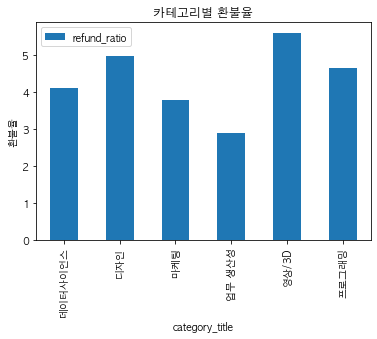

In [151]:
Result_Group = Result.groupby('category_name').mean()
Result_Group.plot(kind = 'bar' ) #시각화
plt.title("카테고리별 환불율")
plt.xlabel("category_title")
plt.ylabel("환불율") 

## (insight)영상/3D의 환불율이 가장 높습니다.